# Task 1: Acquire the Data

## Load Data

In [ ]:
import random
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Dropout
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import sklearn.metrics

from google.colab import drive
random.seed(551)
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_df=pd.read_csv('/content/drive/MyDrive/COMP551A3Data/sign_mnist_train.csv')
test_df=pd.read_csv('/content/drive/MyDrive/COMP551A3Data/sign_mnist_test.csv')

In [ ]:
train_df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27450,13,189,189,190,190,192,193,193,193,193,...,132,165,99,77,52,200,234,200,222,225
27451,23,151,154,157,158,160,161,163,164,166,...,198,198,198,198,198,196,195,195,195,194
27452,18,174,174,174,174,174,175,175,174,173,...,121,196,209,208,206,204,203,202,200,200
27453,17,177,181,184,185,187,189,190,191,191,...,119,56,27,58,102,79,47,64,87,93


In [ ]:
test_df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7167,1,135,119,108,102,105,99,61,103,121,...,108,112,116,114,118,180,184,176,167,163
7168,12,157,159,161,164,166,166,171,174,175,...,213,213,213,214,213,211,210,210,209,208
7169,2,190,191,190,191,190,190,192,192,191,...,216,215,213,214,214,213,210,211,209,208
7170,4,201,205,208,209,214,216,218,223,226,...,112,169,255,255,237,113,91,67,70,63


## Preprocessing Data

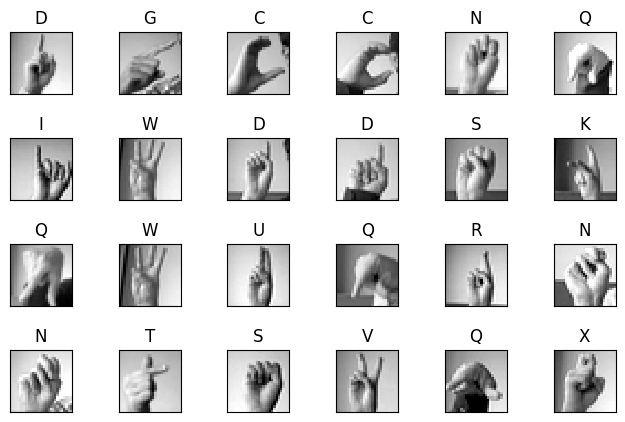

In [ ]:
#unormalized
X_train_unnor = train_df.drop(['label'],axis=1).values.reshape(-1,28,28,1)
#center and normalize
X_train_nor = (X_train_unnor-np.mean(X_train_unnor))/np.std(X_train_unnor)
y_train = train_df['label']

X_test_unnor = test_df.drop(['label'],axis=1).values.reshape(-1,28,28,1)
#center and normalize
X_test_nor = (X_test_unnor-np.mean(X_test_unnor))/np.std(X_test_unnor)
y_test = test_df['label']

#visualization of a few signs
alphabet="ABCDEFGHIJKLMNOPQRSTUVWXYZ"
fig = plt.figure()
for i in range(24):
  plt.subplot(4,6,i+1)
  plt.tight_layout()
  plt.imshow(X_train_unnor[i], cmap='gray', interpolation='none')
  plt.title("{}".format(alphabet[y_train[i]]))
  plt.xticks([])
  plt.yticks([])

In [ ]:
#Data flattening
features_num= X_train_nor.shape[1]*X_train_nor.shape[2]

#normalized data
X_train_N=X_train_nor.reshape(-1, features_num)
X_test_N=X_test_nor.reshape(-1, features_num)


#unormalized data
X_train_UN=X_train_unnor.reshape(-1, features_num)
X_test_UN=X_test_unnor.reshape(-1, features_num)

X_train_N.shape

(27455, 784)

In [ ]:
from sklearn import model_selection
from sklearn.preprocessing import LabelBinarizer
lb=LabelBinarizer()

X_test=X_test_N
y_test=y_test

#randomly split the original training dataset into training set and validation set
X_train_tr, X_train_va, y_train_tr, y_train_va = model_selection.train_test_split(X_train_N,y_train,test_size = 0.2, random_state=1, shuffle=True)

#target data

y_train_tr=np.eye(25)[y_train_tr]
y_test=np.eye(25)[y_test]
y_train_va=np.eye(25)[y_train_va]

In [ ]:
y_train

0         3
1         6
2         2
3         2
4        13
         ..
27450    13
27451    23
27452    18
27453    17
27454    23
Name: label, Length: 27455, dtype: int64

# Task 2: Implement an MLP to Classify Image Data


In [ ]:
import numpy as np
#%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.core.debugger import set_trace
import warnings
warnings.filterwarnings('ignore')

from typing import List
from tqdm import tqdm

## Layers

Neural Net Layer:

In [ ]:
class NeuralNetLayer:
    def __init__(self):
        self.gradient = None
        self.parameters = None

    def forward(self, x):
        raise NotImplementedError

    def backward(self, gradient):
        raise NotImplementedError

ReLU Layer:

In [ ]:
class ReLULayer(NeuralNetLayer):
    def __init__(self):
        super().__init__()

    def forward(self, x):
        self.gradient = np.where(x > 0, 1.0, 0.0)
        return np.maximum(0, x)

    def backward(self, gradient):
        assert self.gradient is not None, "Must call forward before backward"
        return gradient * self.gradient

LeakyReLU Layer:

In [ ]:
class LeakyReLULayer(NeuralNetLayer):
    def __init__(self, slope):
        super().__init__()
        self.slope = slope # For the negative part

    def forward(self, x):
        self.gradient = np.where(x > 0, 1.0, self.slope)
        #self.gradient = np.where(x > 0, 1.0, 0.0)
        return np.maximum(0, x) + self.slope * np.minimum(0,x)

    def backward(self, gradient):
        assert self.gradient is not None, "Must call forward before backward"
        return gradient * self.gradient

Linear Layer:

In [ ]:
class LinearLayer(NeuralNetLayer):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.ni = input_size
        self.no = output_size
        self.w = np.random.randn(output_size, input_size)*1e-7
        self.b = np.random.randn(output_size)
        self.cur_input = None
        self.parameters = [self.w, self.b]

    def forward(self, x):
        self.cur_input = x
        return (self.w[None, :, :] @ x[:, :, None]).squeeze() + self.b

    def backward(self, gradient):
        assert self.cur_input is not None, "Must call forward before backward"
        #dw = gradient.dot(self.cur_input)
        dw = gradient[:, :, None] @ self.cur_input[:, None, :]
        db = gradient
        self.gradient = [dw, db]
        return gradient.dot(self.w)

Sigmoid Layer:

In [ ]:
class Sigmoid(NeuralNetLayer):
    def __init__(self):
        super().__init__()
        #self.slope = slope
        self.sig=None

    def forward(self, x):
        self.gradient = np.where(x > 0, 1.0, 0)
        self.sig = 1/(1 + np.exp(-x))
        return 1/(1 + np.exp(-x))

    def backward(self, gradient):
        assert self.sig is not None, "Must call forward before backward"
        sigmoid_grad = self.sig*(1.0-self.sig)
        return gradient*sigmoid_grad


Softmax Output Layer:

In [ ]:
class SoftmaxOutputLayer(NeuralNetLayer):
    def __init__(self):
        super().__init__()
        self.cur_probs = None

    def forward(self, x):
        exps = np.exp(x)
        probs = exps / np.sum(exps, axis=-1)[:, None]
        self.cur_probs = probs
        if np.isnan(probs).any():
          print("softmax is nan")
        return probs

    def backward(self, target):
        assert self.cur_probs is not None, "Must call forward before backward"
        return self.cur_probs - target

## Functions for Later

In [ ]:
def ce(yhat, y, layers, alpha=0, l2=False):

  if l2:
    l2_norm = 0
    for layer in layers:
      if layer.parameters is not None:
        l2_norm += layer.w ** 2


    return -1 * np.sum(y * np.log(yhat + 1e-100))/len(y) + alpha * l2_norm

  else:
    '''
    #division by 0
        if s_pred.any(0):
          s_pred[s_pred==0]=1

        t = y_pred=y_pred/(s_pred+1e-5)
        if np.isnan(t).any():
          t[np.isnan(t)]=1'''
    return -1 * np.sum(y * np.log(yhat + 1e-100))/len(y)

def evaluate_acc(yhat, y): #they are one hot encoded
    yhat = np.argmax(yhat, axis=-1)
    y = np.argmax(y, axis=-1)
    return sklearn.metrics.accuracy_score(yhat, y)

def CE_vs_EPOCHS(train_losses, valid_losses, epochs_n,title):
  epochs_list=list(range(1, epochs_n+1))
  optimal_niter = min(range(len(valid_losses)), key=valid_losses.__getitem__)
  plt.plot(epochs_list, train_losses, color='red', label='training')
  plt.plot(epochs_list, valid_losses, color='blue', label='validation')
  plt.axvline(x=optimal_niter, label=f"minValCE iter{optimal_niter}")
  plt.xlabel("Epochs")
  plt.ylabel("CE Loss")
  plt.title(title)
  plt.legend(loc='best')


def ACCURACY_vs_EPOCHS(train_accuracy, valid_accuracy, test_accuracy,epochs_n,title):
  epochs_list=list(range(1, epochs_n+1))
  plt.plot(epochs_list, train_accuracy, color='red', label='training')
  plt.plot(epochs_list, valid_accuracy, color='blue', label='validation')
  plt.plot(epochs_list, test_accuracy, color='green', label='testing')
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy")
  plt.title(title)
  plt.legend(loc='best')
  print(" Train Accuracy: {}\n Valid Accuracy: {}\n Test Accuracy: {}".format(train_accuracy[-1],valid_accuracy[-1],test_accuracy[-1]))


## MLP Class

In [ ]:
import math
from copy import deepcopy
class MLP:
    def __init__(self, *args: List[NeuralNetLayer]):
        self.layers = args
        self.best = None

    def forward(self, x):
        for layer in self.layers:
            x = layer.forward(x)

        self.out = x
        return x

    def backward(self, target):
        for layer in self.layers[::-1]:
            target = layer.backward(target)

    def fit(self, optimizer, x_train, y_train, x_valid, y_valid, x_test, y_test, alpha=0, l2 = False, steps = 50, batch_size = 100):
        losses, losses_valid, acc_train, acc_valid, acc_test = [], [], [], [], []
        lowest_ce = math.inf

        for iteration in tqdm(range(steps)):
            batch_loss = []
            batch_accuracy = []
            for i in range(0, x_train.shape[0], batch_size):
                batch_x = x_train[i:i+batch_size]
                labels_y = y_train[i:i+batch_size]
                yhat = self.predict(batch_x)
                b_loss = ce(yhat, labels_y, self.layers, l2)
                b_accuracy = evaluate_acc(yhat, labels_y)
                self.backward(labels_y)
                optimizer.step()
                batch_loss.append(b_loss)
                batch_accuracy.append(b_accuracy)

            #training loss and accuracy
            loss = sum(batch_loss)/len(batch_loss)
            losses.append(loss)
            accuracy_train = sum(batch_accuracy)/len(batch_accuracy)
            acc_train.append(accuracy_train)

            #validation loss and accuracy
            predictions_valid = self.predict(x_valid)
            loss_valid = ce(predictions_valid, y_valid, self.layers, l2)
            losses_valid.append(loss_valid)
            accuracy_valid = evaluate_acc(predictions_valid, y_valid)
            acc_valid.append(accuracy_valid)

            #test accuracy
            predictions_test = self.predict(x_test)
            accuracy_test = evaluate_acc(predictions_test, y_test)
            acc_test.append(accuracy_test)

            if loss_valid < lowest_ce:
                lowest_ce = loss_valid
                self.best = deepcopy(self.layers)

            print("time {0}: train loss {1}, train acc {2}, valid loss {3}, valid acc {4}".format(iteration, loss, accuracy_train, loss_valid, accuracy_valid))
        return self, losses, losses_valid, acc_train, acc_valid, acc_test

    def predict(self, x_test, testing=False):
        if testing:
            for layer in self.best:
                x_test = layer.forward(x_test)
            return x_test
        return self.forward(x_test)

    def check_gradient(self, x, y):
        grads_w, grads_b = [], []
        for layer in self.layers:
            if not isinstance(layer, LinearLayer): #need layer.no and layer.ni
                continue
            eps_w = np.random.rand(layer.no, layer.ni) * 1e-19
            eps_b = np.random.rand(layer.no) * 1e-16

            #w - eps
            layer.w -= eps_w
            yhat = self.forward(x)
            ce1 = ce(y = y, yhat = yhat, layers = self.layers)

            #w + eps
            layer.w += 2*eps_w
            yhat = self.forward(x)
            ce2 = ce(y = y, yhat = yhat, layers = self.layers)
            layer.w -= eps_w #reset weights

            dw_num = (ce1 - ce2)/(2*eps_w) # approximated gradient
            dw_cal = layer.gradient[0].mean(axis=0)
            grad_diff = (dw_cal - dw_num)**2
            grad_diff = grad_diff/(dw_cal + dw_num)**2
            grads_w.append(eps_w.mean())
            grads_b.append(eps_b.mean())

        s = "Weight gradient difference: {}\n".format(grads_w)
        s += "Biases gradient difference: {}".format(grads_b)
        print(s)
        return grads_w, grads_b

#for Keras Neural Network



## Network Optimization

In [ ]:
class Optimizer:
    def __init__(self, net: MLP):
        self.net = net

    def step(self):
        for layer in self.net.layers[::-1]:
            if layer.parameters is not None:
                self.update(layer.parameters, layer.gradient)

    def update(self, params, gradient):
        raise NotImplementedError

class GradientDescentOptimizer(Optimizer):
    def __init__(self, net: MLP, lr: float):
        super().__init__(net)
        self.lr = lr

    def update(self, params, gradient):
        for (p, g) in zip(params, gradient):
          p -= self.lr * g.mean(axis=0)
          #p -= self.lr * g.mean()

# Task 3: Run the Experiments and Report

In [ ]:
HIDDEN_SIZE32 = 32
HIDDEN_SIZE64 = 64
HIDDEN_SIZE128 = 128
HIDDEN_SIZE256 = 256
BATCH_SIZE = 100


acc_train_layers = []
acc_test_layers = []

train_acc_layers = []
valid_test_acc_layers = []
test_acc_layers = []


## 3.1: Compare Three Models

The code below allows us to find the best MLP model for image classification. We have found that MLP with one hidden layer with 256 hidden units performs the best, with a test accuracy of 71.4%.

### MLP with No Hidden Layer

In [ ]:
mlp0 = MLP(LinearLayer(28**2, 25),
           SoftmaxOutputLayer()
)

opt0 = GradientDescentOptimizer(mlp0, lr=0.1)
mlp, losses_train, losses_valid, acc_train, acc_valid,acc_test = mlp0.fit(opt0, X_train_tr, y_train_tr, X_train_va, y_train_va,X_test,y_test, steps=6, batch_size=500)


#maybe remove
train_acc_layers.append(acc_train)
valid_test_acc_layers.append(acc_valid)

 17%|█▋        | 1/6 [00:04<00:24,  4.97s/it]

time 0: train loss 1.6360273907372973, train acc 0.5876923981191223, valid loss 1.0860238108873914, valid acc 0.7348388271717355


 33%|███▎      | 2/6 [00:10<00:22,  5.53s/it]

time 1: train loss 0.9227257462851334, train acc 0.7904627742946708, valid loss 0.8004438929924625, valid acc 0.8246221089054817


 50%|█████     | 3/6 [00:16<00:16,  5.40s/it]

time 2: train loss 0.7162297953902168, train acc 0.8484039968652035, valid loss 0.6540881650399722, valid acc 0.8668730650154799


 67%|██████▋   | 4/6 [00:20<00:10,  5.14s/it]

time 3: train loss 0.5968968838200758, train acc 0.8817119905956115, valid loss 0.5589870254621242, valid acc 0.8914587506829357


 83%|████████▎ | 5/6 [00:28<00:05,  5.96s/it]

time 4: train loss 0.5151347822274313, train acc 0.9039255485893414, valid loss 0.49009376792231985, valid acc 0.9107630668366418


100%|██████████| 6/6 [00:33<00:00,  5.62s/it]

time 5: train loss 0.45417193976408776, train acc 0.9226634012539182, valid loss 0.43693664234308277, valid acc 0.9236933163358223


In [ ]:
mlp.check_gradient(X_train_tr, y_train_tr)

Weight gradient difference: [5.0127259344545176e-20]
Biases gradient difference: [5.317639312122919e-17]


([5.0127259344545176e-20], [5.317639312122919e-17])

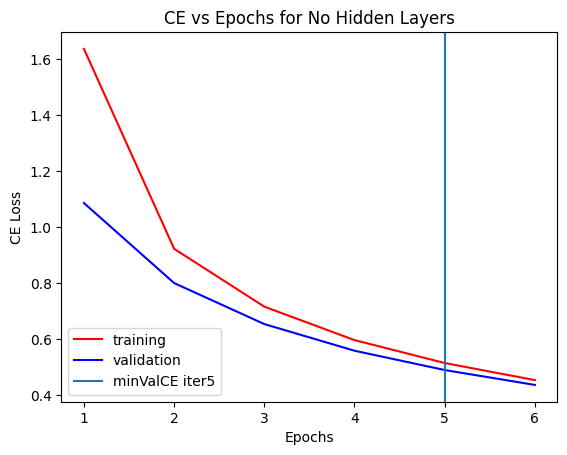

In [ ]:
CE_vs_EPOCHS(losses_train,losses_valid,epochs_n=6,title="CE vs Epochs for No Hidden Layers")

 Train Accuracy: 0.9226634012539182
 Valid Accuracy: 0.9236933163358223
 Test Accuracy: 0.6932515337423313


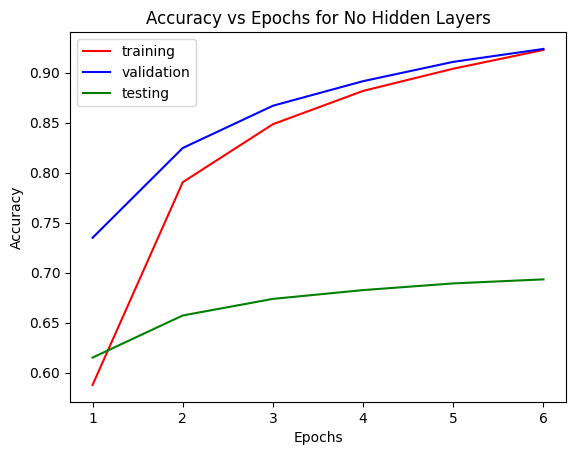

In [ ]:
ACCURACY_vs_EPOCHS(acc_train, acc_valid, acc_test,epochs_n=6,title="Accuracy vs Epochs for No Hidden Layers")

### MLP with One Hidden Layer

32 Hidden Units:

In [ ]:
mlp1 = MLP(
    LinearLayer(28**2, HIDDEN_SIZE32),
    ReLULayer(),
    LinearLayer(HIDDEN_SIZE32, 25),
    SoftmaxOutputLayer()
)
opt1 = GradientDescentOptimizer(mlp1, lr=0.1)

mlp, losses_train, losses_valid, acc_train, acc_valid, acc_test = mlp1.fit(opt1, X_train_tr, y_train_tr, X_train_va, y_train_va,X_test,y_test, steps=15, batch_size=500)

  7%|▋         | 1/15 [00:06<01:24,  6.07s/it]

time 0: train loss 3.1595201780138114, train acc 0.05801136363636364, valid loss 3.0400861341649947, valid acc 0.0653797122564196


 13%|█▎        | 2/15 [00:11<01:16,  5.87s/it]

time 1: train loss 2.993918972330149, train acc 0.07918299373040752, valid loss 2.957615408386554, valid acc 0.072846476051721


 20%|██        | 3/15 [00:18<01:15,  6.31s/it]

time 2: train loss 2.9180769807105706, train acc 0.08527742946708462, valid loss 2.882312587080772, valid acc 0.10362411218357312


 27%|██▋       | 4/15 [00:24<01:05,  5.94s/it]

time 3: train loss 2.798872797044273, train acc 0.12774725705329157, valid loss 2.696811934385547, valid acc 0.15461664541977782


 33%|███▎      | 5/15 [00:31<01:03,  6.38s/it]

time 4: train loss 2.497458351892983, train acc 0.2069028213166144, valid loss 2.2052305927735327, valid acc 0.30304134037515934


 40%|████      | 6/15 [00:36<00:54,  6.01s/it]

time 5: train loss 1.9860841466742023, train acc 0.3594780564263323, valid loss 1.7972115019330335, valid acc 0.4170460753961027


 47%|████▋     | 7/15 [00:42<00:49,  6.16s/it]

time 6: train loss 1.6860802922601537, train acc 0.4509580721003136, valid loss 1.5595136794128688, valid acc 0.4962666181023493


 53%|█████▎    | 8/15 [00:48<00:42,  6.08s/it]

time 7: train loss 1.451748415792566, train acc 0.5365188087774296, valid loss 1.3342937499461398, valid acc 0.5802221817519577


 60%|██████    | 9/15 [00:54<00:35,  5.89s/it]

time 8: train loss 1.2396932687008104, train acc 0.6107680250783699, valid loss 1.1532987708461777, valid acc 0.6412311054452741


 67%|██████▋   | 10/15 [01:01<00:31,  6.25s/it]

time 9: train loss 1.0711690736327744, train acc 0.6666394984326018, valid loss 1.0043941036026187, valid acc 0.6940448005827718


 73%|███████▎  | 11/15 [01:06<00:24,  6.01s/it]

time 10: train loss 0.9326644281336964, train acc 0.7199933385579936, valid loss 0.8778391476968783, valid acc 0.7424877071571663


 80%|████████  | 12/15 [01:14<00:19,  6.60s/it]

time 11: train loss 0.8157060443503785, train acc 0.7637597962382446, valid loss 0.7684160605478866, valid acc 0.777271899471863


 87%|████████▋ | 13/15 [01:20<00:12,  6.44s/it]

time 12: train loss 0.7156073168385528, train acc 0.7967253134796237, valid loss 0.6739206997334131, valid acc 0.8076853032234566


 93%|█████████▎| 14/15 [01:27<00:06,  6.46s/it]

time 13: train loss 0.6297149342527306, train acc 0.8241101097178685, valid loss 0.5919749846491345, valid acc 0.8364596612638864


100%|██████████| 15/15 [01:33<00:00,  6.21s/it]

time 14: train loss 0.5549044070268873, train acc 0.8482327586206894, valid loss 0.521571714404533, valid acc 0.8625022764523766


In [ ]:
mlp.check_gradient(X_train_tr, y_train_tr)

Weight gradient difference: [5.001407637729512e-20, 5.018129448623945e-20]
Biases gradient difference: [5.810135599971411e-17, 4.4180148095722945e-17]


([5.001407637729512e-20, 5.018129448623945e-20],
 [5.810135599971411e-17, 4.4180148095722945e-17])

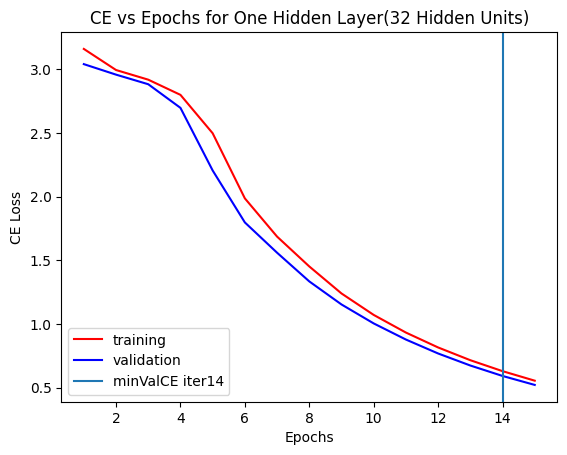

In [ ]:
CE_vs_EPOCHS(losses_train,losses_valid,epochs_n=15, title="CE vs Epochs for One Hidden Layer(32 Hidden Units)")

 Train Accuracy: 0.8482327586206894
 Valid Accuracy: 0.8625022764523766
 Test Accuracy: 0.6392916899051868


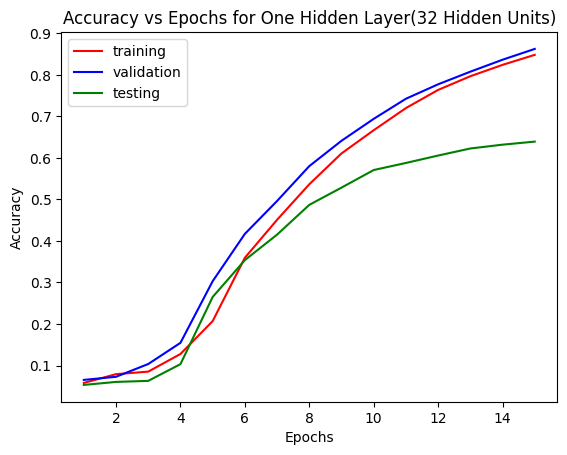

In [ ]:
ACCURACY_vs_EPOCHS(acc_train, acc_valid,acc_test, epochs_n=15,title="Accuracy vs Epochs for One Hidden Layer(32 Hidden Units)")

64 Hidden Units:

In [ ]:
mlp1 = MLP(
    LinearLayer(28**2, HIDDEN_SIZE64),
    ReLULayer(),
    LinearLayer(HIDDEN_SIZE64, 25),
    SoftmaxOutputLayer()
)
opt1 = GradientDescentOptimizer(mlp1, lr=0.1)

mlp, losses_train, losses_valid, acc_train, acc_valid, acc_test = mlp1.fit(opt1, X_train_tr, y_train_tr, X_train_va, y_train_va,X_test,y_test, steps=15, batch_size=500)

  7%|▋         | 1/15 [00:10<02:29, 10.69s/it]

time 0: train loss 3.1951102292888565, train acc 0.05179114420062698, valid loss 3.1198325001088105, valid acc 0.06629029320706611


 13%|█▎        | 2/15 [00:20<02:15, 10.45s/it]

time 1: train loss 3.094210000141784, train acc 0.06645219435736678, valid loss 3.0664686903923233, valid acc 0.08195228555818612


 20%|██        | 3/15 [00:30<02:01, 10.15s/it]

time 2: train loss 3.0207826408094802, train acc 0.09411716300940441, valid loss 2.894245030152605, valid acc 0.13476598069568385


 27%|██▋       | 4/15 [00:41<01:54, 10.36s/it]

time 3: train loss 2.6366774646721973, train acc 0.20380485893416928, valid loss 2.2785911128308456, valid acc 0.29302494991804773


 33%|███▎      | 5/15 [00:52<01:44, 10.48s/it]

time 4: train loss 1.986219429415172, train acc 0.38816379310344823, valid loss 1.7307055963803346, valid acc 0.4591149153159716


 40%|████      | 6/15 [01:02<01:32, 10.32s/it]

time 5: train loss 1.5513370926993482, train acc 0.5149204545454544, valid loss 1.3907851214212419, valid acc 0.5643780732107084


 47%|████▋     | 7/15 [01:12<01:21, 10.25s/it]

time 6: train loss 1.2587843583004568, train acc 0.6160791536050158, valid loss 1.1436521501020125, valid acc 0.6503369149517392


 53%|█████▎    | 8/15 [01:23<01:12, 10.42s/it]

time 7: train loss 1.0350170801847127, train acc 0.6942934952978056, valid loss 0.9505927711295955, valid acc 0.7199052995811328


 60%|██████    | 9/15 [01:33<01:02, 10.50s/it]

time 8: train loss 0.8616068701827904, train acc 0.7544968652037618, valid loss 0.7974187519955839, valid acc 0.7747222728100528


 67%|██████▋   | 10/15 [01:43<00:51, 10.26s/it]

time 9: train loss 0.7228604915119412, train acc 0.8034905956112854, valid loss 0.6724907351744366, valid acc 0.8177016936805682


 73%|███████▎  | 11/15 [01:54<00:41, 10.37s/it]

time 10: train loss 0.609027042276812, train acc 0.8437813479623825, valid loss 0.5686408512324719, valid acc 0.8521216536150064


 80%|████████  | 12/15 [02:04<00:31, 10.51s/it]

time 11: train loss 0.5139794665847283, train acc 0.8759181034482757, valid loss 0.4810517351683841, valid acc 0.8827171735567292


 87%|████████▋ | 13/15 [02:15<00:21, 10.54s/it]

time 12: train loss 0.43377273469555516, train acc 0.9033765673981192, valid loss 0.40664877022655477, valid acc 0.9100346020761245


 93%|█████████▎| 14/15 [02:24<00:10, 10.18s/it]

time 13: train loss 0.3657866387649317, train acc 0.9270446708463951, valid loss 0.34372610354135524, valid acc 0.9313421963212529


100%|██████████| 15/15 [02:35<00:00, 10.37s/it]

time 14: train loss 0.30850883035190274, train acc 0.9431148119122259, valid loss 0.2906065603800839, valid acc 0.9471863048625023


In [ ]:
gradient=mlp.check_gradient(X_train_tr, y_train_tr)

Weight gradient difference: [4.9720990004401595e-20, 5.01354457127557e-20]
Biases gradient difference: [4.9641249466640666e-17, 5.58136321587963e-17]


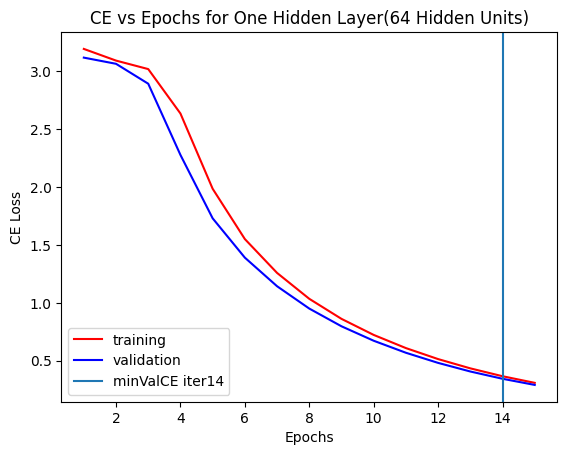

In [ ]:
CE_vs_EPOCHS(losses_train,losses_valid,epochs_n=15, title="CE vs Epochs for One Hidden Layer(64 Hidden Units)")

 Train Accuracy: 0.9431148119122259
 Valid Accuracy: 0.9471863048625023
 Test Accuracy: 0.6847462353597323


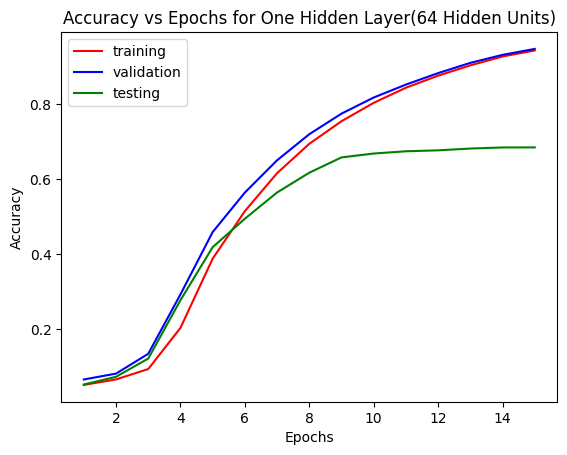

In [ ]:
ACCURACY_vs_EPOCHS(acc_train, acc_valid,acc_test, epochs_n=15,title="Accuracy vs Epochs for One Hidden Layer(64 Hidden Units)")

128 Hidden Units:

In [ ]:
mlp1 = MLP(
    LinearLayer(28**2, HIDDEN_SIZE128),
    ReLULayer(),
    LinearLayer(HIDDEN_SIZE128, 25),
    SoftmaxOutputLayer()
)
opt1 = GradientDescentOptimizer(mlp1, lr=0.1)

mlp, losses_train, losses_valid, acc_train, acc_valid, acc_test = mlp1.fit(opt1, X_train_tr, y_train_tr, X_train_va, y_train_va, X_test,y_test, steps=15, batch_size=500)

  7%|▋         | 1/15 [00:19<04:35, 19.69s/it]

time 0: train loss 3.1804186382471737, train acc 0.0683126959247649, valid loss 3.115548352524665, valid acc 0.07157166272081589


 13%|█▎        | 2/15 [00:39<04:15, 19.62s/it]

time 1: train loss 3.094991528418314, train acc 0.07337539184952979, valid loss 3.0783801901067593, valid acc 0.06264796940448006


 20%|██        | 3/15 [00:57<03:46, 18.89s/it]

time 2: train loss 2.9943697970472622, train acc 0.10968808777429469, valid loss 2.7352949982164576, valid acc 0.19213258058641414


 27%|██▋       | 4/15 [01:16<03:29, 19.00s/it]

time 3: train loss 2.480609421090903, train acc 0.23156739811912222, valid loss 2.1652063455842527, valid acc 0.3006738299034784


 33%|███▎      | 5/15 [01:34<03:06, 18.60s/it]

time 4: train loss 1.9288401771333186, train acc 0.37924804075235125, valid loss 1.677272988407756, valid acc 0.46348570387907484


 40%|████      | 6/15 [01:52<02:45, 18.39s/it]

time 5: train loss 1.5152556966879211, train acc 0.5242566614420063, valid loss 1.336994395465917, valid acc 0.5858677836459661


 47%|████▋     | 7/15 [02:12<02:30, 18.84s/it]

time 6: train loss 1.2202904585374712, train acc 0.6268906739811912, valid loss 1.1032410007883946, valid acc 0.655618284465489


 53%|█████▎    | 8/15 [02:30<02:09, 18.54s/it]

time 7: train loss 1.0075866689131465, train acc 0.6935521159874609, valid loss 0.9135535096673132, valid acc 0.7208158805317793


 60%|██████    | 9/15 [02:48<01:50, 18.44s/it]

time 8: train loss 0.8316398401147027, train acc 0.7548013322884013, valid loss 0.7530903477244675, valid acc 0.7745401566199235


 67%|██████▋   | 10/15 [03:07<01:33, 18.64s/it]

time 9: train loss 0.685551238232429, train acc 0.8069804075235109, valid loss 0.6224185072283608, valid acc 0.8246221089054817


 73%|███████▎  | 11/15 [03:25<01:14, 18.53s/it]

time 10: train loss 0.5661303802751121, train acc 0.8524110501567397, valid loss 0.5163565013603026, valid acc 0.8679657621562556


 80%|████████  | 12/15 [03:43<00:55, 18.35s/it]

time 11: train loss 0.46893636658320975, train acc 0.8875094043887145, valid loss 0.4299768150256051, valid acc 0.9022036059005646


 87%|████████▋ | 13/15 [04:04<00:38, 19.14s/it]

time 12: train loss 0.3894228996498338, train acc 0.9173663793103447, valid loss 0.3589485735282111, valid acc 0.928974685849572


 93%|█████████▎| 14/15 [04:22<00:18, 18.82s/it]

time 13: train loss 0.3240317256211471, train acc 0.9392476489028212, valid loss 0.30011736109406684, valid acc 0.9490074667637953


100%|██████████| 15/15 [04:40<00:00, 18.72s/it]

time 14: train loss 0.2703026851274037, train acc 0.9553072100313481, valid loss 0.2518381704770038, valid acc 0.9632125295938809


In [ ]:
gradient=mlp.check_gradient(X_train_tr, y_train_tr)

Weight gradient difference: [4.9899039108832345e-20, 5.001444194385801e-20]
Biases gradient difference: [4.6835187602089785e-17, 5.344044241784652e-17]


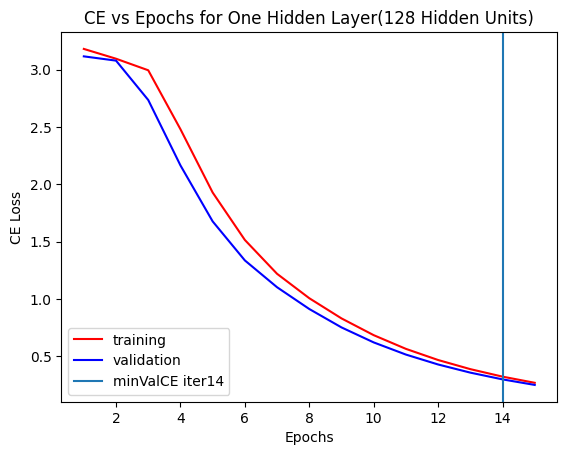

In [ ]:
CE_vs_EPOCHS(losses_train,losses_valid,epochs_n=15, title="CE vs Epochs for One Hidden Layer(128 Hidden Units)")

 Train Accuracy: 0.9553072100313481
 Valid Accuracy: 0.9632125295938809
 Test Accuracy: 0.6949247071946458


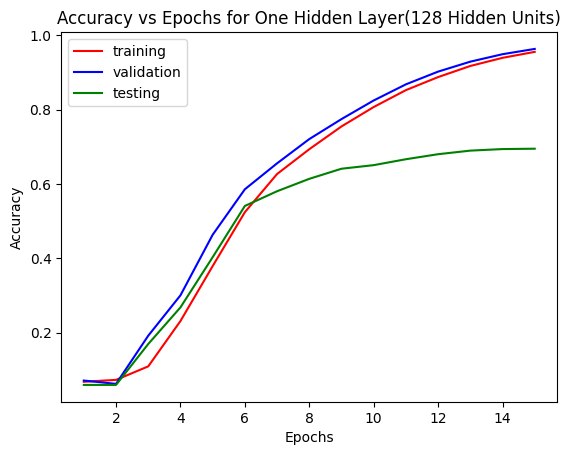

In [ ]:
ACCURACY_vs_EPOCHS(acc_train, acc_valid,acc_test, epochs_n=15,title="Accuracy vs Epochs for One Hidden Layer(128 Hidden Units)")

256 Hidden Units:

In [ ]:
mlp1 = MLP(
    LinearLayer(28**2, HIDDEN_SIZE256),
    ReLULayer(),
    LinearLayer(HIDDEN_SIZE256, 25),
    SoftmaxOutputLayer()
)
opt1 = GradientDescentOptimizer(mlp1, 0.1)

mlp, losses_train, losses_valid, acc_train, acc_valid, acc_test = mlp1.fit(opt1, X_train_tr, y_train_tr, X_train_va, y_train_va,X_test,y_test, steps=15, batch_size=500)

  7%|▋         | 1/15 [00:41<09:43, 41.71s/it]

time 0: train loss 3.1650616262387814, train acc 0.062210815047021945, valid loss 3.1114816410949278, valid acc 0.06629029320706611


 13%|█▎        | 2/15 [01:17<08:20, 38.48s/it]

time 1: train loss 3.095414451793486, train acc 0.0759416144200627, valid loss 3.0772512010379622, valid acc 0.06701875796758332


 20%|██        | 3/15 [01:53<07:23, 36.94s/it]

time 2: train loss 3.011726893207903, train acc 0.10105133228840125, valid loss 2.7601091873655683, valid acc 0.17301038062283736


 27%|██▋       | 4/15 [02:28<06:41, 36.54s/it]

time 3: train loss 2.4456023987144255, train acc 0.24159561128526652, valid loss 2.070241162011577, valid acc 0.33764341649972685


 33%|███▎      | 5/15 [03:06<06:08, 36.88s/it]

time 4: train loss 1.8598570745636325, train acc 0.40178291536050154, valid loss 1.627721951126208, valid acc 0.476233837188126


 40%|████      | 6/15 [03:41<05:25, 36.21s/it]

time 5: train loss 1.4839810194682104, train acc 0.5293789184952977, valid loss 1.3061535290659483, valid acc 0.5878710617373885


 47%|████▋     | 7/15 [04:17<04:49, 36.23s/it]

time 6: train loss 1.1859588721064476, train acc 0.6360235109717867, valid loss 1.0567409176880846, valid acc 0.6561646330358769


 53%|█████▎    | 8/15 [05:07<04:43, 40.46s/it]

time 7: train loss 0.9641679355931493, train acc 0.7083914576802509, valid loss 0.8707786201539808, valid acc 0.7341103624112184


 60%|██████    | 9/15 [05:43<03:54, 39.05s/it]

time 8: train loss 0.7946632061498061, train acc 0.7681442006269594, valid loss 0.7199087889964794, valid acc 0.7923875432525952


 67%|██████▋   | 10/15 [06:19<03:10, 38.10s/it]

time 9: train loss 0.6560129796124099, train acc 0.8218652037617559, valid loss 0.5952975181206746, valid acc 0.8353669641231105


 73%|███████▎  | 11/15 [06:54<02:29, 37.40s/it]

time 10: train loss 0.5416500771602849, train acc 0.8586837774294674, valid loss 0.4929278525409042, valid acc 0.8690584592970315


 80%|████████  | 12/15 [07:29<01:49, 36.60s/it]

time 11: train loss 0.447489930156551, train acc 0.8925023510971785, valid loss 0.40892711691862726, valid acc 0.903660535421599


 87%|████████▋ | 13/15 [08:05<01:12, 36.42s/it]

time 12: train loss 0.36997050448499763, train acc 0.9215305642633229, valid loss 0.3399977535281707, valid acc 0.9258787106173739


 93%|█████████▎| 14/15 [08:41<00:36, 36.20s/it]

time 13: train loss 0.30652328809908086, train acc 0.9414678683385582, valid loss 0.28361732963445907, valid acc 0.9453651429612092


100%|██████████| 15/15 [09:16<00:00, 37.09s/it]

time 14: train loss 0.25471467527491903, train acc 0.9567198275862071, valid loss 0.23730624800966693, valid acc 0.9613913676925878


In [ ]:
gradient=mlp.check_gradient(X_train_tr, y_train_tr)

Weight gradient difference: [4.997744720272176e-20, 4.996721660690675e-20]
Biases gradient difference: [4.6643929661190194e-17, 5.683247908360438e-17]


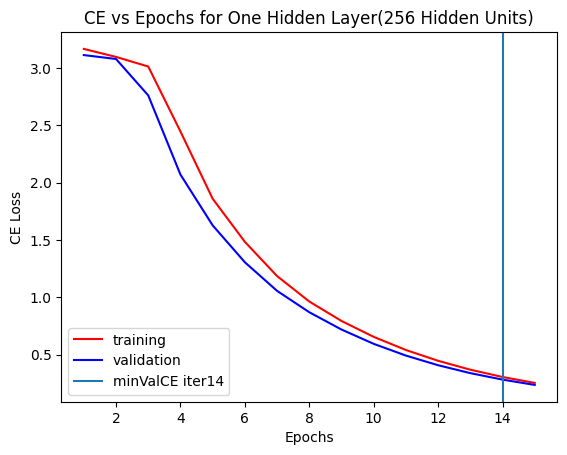

In [ ]:
CE_vs_EPOCHS(losses_train,losses_valid,epochs_n=15, title="CE vs Epochs for One Hidden Layer(256 Hidden Units)")

 Train Accuracy: 0.9567198275862071
 Valid Accuracy: 0.9613913676925878
 Test Accuracy: 0.714026770775237


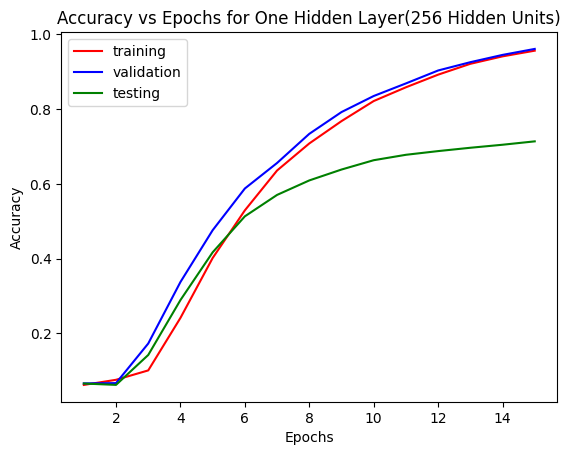

In [ ]:
ACCURACY_vs_EPOCHS(acc_train, acc_valid,acc_test, epochs_n=15,title="Accuracy vs Epochs for One Hidden Layer(256 Hidden Units)")

### MLP with Two Hidden Layers

32 Hidden Units:

In [ ]:
mlp2 = MLP(
    LinearLayer(28*28, HIDDEN_SIZE32),
    ReLULayer(),
    LinearLayer(HIDDEN_SIZE32, HIDDEN_SIZE32),
    ReLULayer(),
    LinearLayer(HIDDEN_SIZE32, 25),
    SoftmaxOutputLayer()
)

opt2 = GradientDescentOptimizer(mlp2, lr=0.1)
mlp, losses_train, losses_valid, acc_train, acc_valid, acc_test = mlp2.fit(opt2, X_train_tr, y_train_tr, X_train_va, y_train_va,X_test,y_test, steps=60, batch_size=500)

  2%|▏         | 1/60 [00:07<07:07,  7.24s/it]

time 0: train loss 3.2566445471933636, train acc 0.04873158307210034, valid loss 3.1572531143718474, valid acc 0.0586414132216354


  3%|▎         | 2/60 [00:12<06:01,  6.23s/it]

time 1: train loss 3.138147873118886, train acc 0.05251802507836993, valid loss 3.1147460653394208, valid acc 0.04898925514478237


  5%|▌         | 3/60 [00:19<06:12,  6.53s/it]

time 2: train loss 3.0970791946347545, train acc 0.06271747648902823, valid loss 3.0788838230512314, valid acc 0.0661081770169368


  7%|▋         | 4/60 [00:25<05:49,  6.24s/it]

time 3: train loss 3.0648057338480656, train acc 0.06755681818181819, valid loss 3.0513753014025253, valid acc 0.061008923693316335


  8%|▊         | 5/60 [00:31<05:35,  6.10s/it]

time 4: train loss 3.039319182482895, train acc 0.07062695924764892, valid loss 3.028516563317849, valid acc 0.06519759606629029


 10%|█         | 6/60 [00:37<05:39,  6.28s/it]

time 5: train loss 3.0177672390767842, train acc 0.07158150470219436, valid loss 3.0086566075285903, valid acc 0.07066108177016937


 12%|█▏        | 7/60 [00:43<05:17,  6.00s/it]

time 6: train loss 2.9992011104929386, train acc 0.07308855799373042, valid loss 2.9910251334626885, valid acc 0.07230012748133309


 13%|█▎        | 8/60 [00:50<05:26,  6.28s/it]

time 7: train loss 2.982843231177473, train acc 0.07563401253918495, valid loss 2.9754046604373667, valid acc 0.07430340557275542


 15%|█▌        | 9/60 [00:55<05:06,  6.01s/it]

time 8: train loss 2.9682308937764788, train acc 0.07599059561128527, valid loss 2.96144468408376, valid acc 0.07484975414314332


 17%|█▋        | 10/60 [01:02<05:10,  6.20s/it]

time 9: train loss 2.9550440410853067, train acc 0.07575626959247647, valid loss 2.9490629963600465, valid acc 0.07648879985430705


 18%|█▊        | 11/60 [01:08<04:59,  6.11s/it]

time 10: train loss 2.943035909377994, train acc 0.0771653605015674, valid loss 2.937749550391156, valid acc 0.07594245128391915


 20%|██        | 12/60 [01:13<04:43,  5.91s/it]

time 11: train loss 2.931862411364517, train acc 0.07852899686520376, valid loss 2.9272540462132057, valid acc 0.07612456747404844


 22%|██▏       | 13/60 [01:21<05:03,  6.45s/it]

time 12: train loss 2.921408211879496, train acc 0.07984012539184954, valid loss 2.9183624876435244, valid acc 0.07703514842469496


 23%|██▎       | 14/60 [01:27<04:51,  6.35s/it]

time 13: train loss 2.9114033406435853, train acc 0.08056739811912227, valid loss 2.9096994986112032, valid acc 0.07703514842469496


 25%|██▌       | 15/60 [01:35<05:07,  6.84s/it]

time 14: train loss 2.9020441294396493, train acc 0.08056387147335423, valid loss 2.901743396937133, valid acc 0.07667091604443635


 27%|██▋       | 16/60 [01:40<04:42,  6.42s/it]

time 15: train loss 2.892988454052481, train acc 0.08129114420062694, valid loss 2.894226391641011, valid acc 0.07612456747404844


 28%|██▊       | 17/60 [01:48<04:45,  6.64s/it]

time 16: train loss 2.8837820077605385, train acc 0.08243456112852664, valid loss 2.885611759601445, valid acc 0.07521398652340193


 30%|███       | 18/60 [01:53<04:24,  6.29s/it]

time 17: train loss 2.8749021123417884, train acc 0.08402547021943572, valid loss 2.878208150872308, valid acc 0.07667091604443635


 32%|███▏      | 19/60 [01:59<04:14,  6.21s/it]

time 18: train loss 2.8659887475534145, train acc 0.08607797805642635, valid loss 2.8724526345949273, valid acc 0.07667091604443635


 33%|███▎      | 20/60 [02:06<04:11,  6.30s/it]

time 19: train loss 2.8573170136057957, train acc 0.08707797805642632, valid loss 2.8658487012317484, valid acc 0.08814423602258241


 35%|███▌      | 21/60 [02:11<03:55,  6.04s/it]

time 20: train loss 2.8489053806100046, train acc 0.08730525078369905, valid loss 2.8588309359579203, valid acc 0.09051174649426334


 37%|███▋      | 22/60 [02:18<04:03,  6.40s/it]

time 21: train loss 2.8403722293663725, train acc 0.0883123040752351, valid loss 2.8525197094055676, valid acc 0.09142232744490986


 38%|███▊      | 23/60 [02:24<03:45,  6.11s/it]

time 22: train loss 2.8315624564070716, train acc 0.0903123040752351, valid loss 2.844792575466779, valid acc 0.09196867601529776


 40%|████      | 24/60 [02:33<04:10,  6.97s/it]

time 23: train loss 2.822327567882973, train acc 0.09245219435736676, valid loss 2.8373352038637707, valid acc 0.09378983791659079


 42%|████▏     | 25/60 [02:39<03:54,  6.70s/it]

time 24: train loss 2.813998330801265, train acc 0.09518652037617557, valid loss 2.8311091291032424, valid acc 0.0948825350573666


 43%|████▎     | 26/60 [02:46<03:50,  6.77s/it]

time 25: train loss 2.8049195709196453, train acc 0.09623550156739812, valid loss 2.824491896488786, valid acc 0.0950646512474959


 45%|████▌     | 27/60 [02:51<03:30,  6.39s/it]

time 26: train loss 2.796280402980401, train acc 0.09656073667711597, valid loss 2.8214203934974034, valid acc 0.0948825350573666


 47%|████▋     | 28/60 [02:58<03:27,  6.47s/it]

time 27: train loss 2.786417310736101, train acc 0.09941065830721003, valid loss 2.8175855576322344, valid acc 0.09542888362775451


 48%|████▊     | 29/60 [03:04<03:21,  6.49s/it]

time 28: train loss 2.77785717948038, train acc 0.10233032915360506, valid loss 2.810643748336694, valid acc 0.09542888362775451


 50%|█████     | 30/60 [03:10<03:08,  6.27s/it]

time 29: train loss 2.7677983242107698, train acc 0.10383032915360503, valid loss 2.8035924878464824, valid acc 0.09670369695865963


 52%|█████▏    | 31/60 [03:17<03:10,  6.58s/it]

time 30: train loss 2.759449841572308, train acc 0.10483385579937302, valid loss 2.807926964278133, valid acc 0.09633946457840102


 53%|█████▎    | 32/60 [03:23<02:54,  6.22s/it]

time 31: train loss 2.7512414061283588, train acc 0.10618338557993728, valid loss 2.8050825487306397, valid acc 0.09743216171917683


 55%|█████▌    | 33/60 [03:30<02:54,  6.46s/it]

time 32: train loss 2.744580019732987, train acc 0.10825, valid loss 2.7989960424710882, valid acc 0.09888909124021125


 57%|█████▋    | 34/60 [03:35<02:39,  6.13s/it]

time 33: train loss 2.7400100715036007, train acc 0.107483934169279, valid loss 2.811092760131875, valid acc 0.09907120743034056


 58%|█████▊    | 35/60 [03:42<02:39,  6.37s/it]

time 34: train loss 2.7242232778572206, train acc 0.11061677115987462, valid loss 2.765210827980909, valid acc 0.10799490074667638


 60%|██████    | 36/60 [03:48<02:27,  6.14s/it]

time 35: train loss 2.7054887184845753, train acc 0.1156551724137931, valid loss 2.7658783834067333, valid acc 0.11637224549262429


 62%|██████▏   | 37/60 [03:53<02:18,  6.00s/it]

time 36: train loss 2.6485055431659266, train acc 0.13812029780564264, valid loss 2.675474864182432, valid acc 0.12547805499908943


 63%|██████▎   | 38/60 [04:00<02:17,  6.24s/it]

time 37: train loss 2.5287089399981584, train acc 0.16249843260188088, valid loss 2.5523559119039008, valid acc 0.14714988162447643


 65%|██████▌   | 39/60 [04:06<02:06,  6.02s/it]

time 38: train loss 2.404378374201751, train acc 0.19778605015673986, valid loss 2.3343845943108854, valid acc 0.23893644144964488


 67%|██████▋   | 40/60 [04:13<02:07,  6.35s/it]

time 39: train loss 2.2760800156305243, train acc 0.22937735109717866, valid loss 2.2113874130617868, valid acc 0.23729739573848116


 68%|██████▊   | 41/60 [04:18<01:55,  6.08s/it]

time 40: train loss 2.1531266849266237, train acc 0.24500705329153608, valid loss 2.109828722949209, valid acc 0.2482243671462393


 70%|███████   | 42/60 [04:25<01:53,  6.33s/it]

time 41: train loss 2.060711749034642, train acc 0.2740387931034483, valid loss 2.0939237291151547, valid acc 0.27463121471498814


 72%|███████▏  | 43/60 [04:31<01:44,  6.12s/it]

time 42: train loss 1.9414042963442635, train acc 0.31871434169278995, valid loss 1.9517107627341819, valid acc 0.32744490985248587


 73%|███████▎  | 44/60 [04:37<01:36,  6.02s/it]

time 43: train loss 1.8009116819801507, train acc 0.3682398119122258, valid loss 1.708349100067612, valid acc 0.4006556182844655


 75%|███████▌  | 45/60 [04:44<01:37,  6.48s/it]

time 44: train loss 1.6906199664631358, train acc 0.4103134796238244, valid loss 1.6433551713360073, valid acc 0.4330723001274813


 77%|███████▋  | 46/60 [04:50<01:30,  6.45s/it]

time 45: train loss 1.6023276927442915, train acc 0.44173628526645764, valid loss 1.6895369972031329, valid acc 0.42851939537424877


 78%|███████▊  | 47/60 [04:57<01:25,  6.60s/it]

time 46: train loss 1.516329996490711, train acc 0.47392202194357363, valid loss 1.6228024975270445, valid acc 0.45856856674558366


 80%|████████  | 48/60 [05:03<01:15,  6.26s/it]

time 47: train loss 1.4195122945806895, train acc 0.5119725705329153, valid loss 1.2993180330216898, valid acc 0.5660171189218721


 82%|████████▏ | 49/60 [05:10<01:11,  6.49s/it]

time 48: train loss 1.3515918868381571, train acc 0.5346469435736678, valid loss 1.3800194736795661, valid acc 0.5359679475505372


 83%|████████▎ | 50/60 [05:15<01:01,  6.17s/it]

time 49: train loss 1.2294849802810697, train acc 0.5722033699059561, valid loss 1.3424474903082042, valid acc 0.5383354580222182


 85%|████████▌ | 51/60 [05:22<00:57,  6.39s/it]

time 50: train loss 1.169098920765705, train acc 0.5994529780564264, valid loss 1.1139695252165784, valid acc 0.6002549626661811


 87%|████████▋ | 52/60 [05:28<00:49,  6.18s/it]

time 51: train loss 1.058727569664306, train acc 0.6364815830721005, valid loss 0.9596021515819225, valid acc 0.6598069568384629


 88%|████████▊ | 53/60 [05:34<00:42,  6.08s/it]

time 52: train loss 0.9970001313212834, train acc 0.6600865987460814, valid loss 0.8849898469679638, valid acc 0.6904024767801857


 90%|█████████ | 54/60 [05:40<00:37,  6.25s/it]

time 53: train loss 0.9377947265273601, train acc 0.6808252351097178, valid loss 0.7982730918378974, valid acc 0.7230012748133309


 92%|█████████▏| 55/60 [05:46<00:29,  5.99s/it]

time 54: train loss 0.9025593749407221, train acc 0.6997257053291537, valid loss 1.001376763681103, valid acc 0.6521580768530323


 93%|█████████▎| 56/60 [05:53<00:25,  6.29s/it]

time 55: train loss 0.7592858089776005, train acc 0.7413428683385579, valid loss 0.6972102082984455, valid acc 0.7608814423602258


 95%|█████████▌| 57/60 [05:58<00:18,  6.06s/it]

time 56: train loss 0.7920686132510693, train acc 0.7430564263322883, valid loss 0.6434885488968143, valid acc 0.7787288289928974


 97%|█████████▋| 58/60 [06:05<00:12,  6.19s/it]

time 57: train loss 0.6605329249670421, train acc 0.7743244514106585, valid loss 0.7702316067314927, valid acc 0.7288289928974686


 98%|█████████▊| 59/60 [06:11<00:06,  6.11s/it]

time 58: train loss 0.5698472827399007, train acc 0.8105744514106583, valid loss 0.5673013563521955, valid acc 0.8040429794208706


100%|██████████| 60/60 [06:17<00:00,  6.29s/it]

time 59: train loss 0.6604037821928708, train acc 0.7804541536050155, valid loss 0.6674980584058867, valid acc 0.7645237661628119


In [ ]:
mlp.check_gradient(X_train_tr, y_train_tr)

Weight gradient difference: [4.9834874822159604e-20, 5.015375650585664e-20, 4.808157420109787e-20]
Biases gradient difference: [5.689563676930755e-17, 3.9602404758916247e-17, 5.0139426999360746e-17]


([4.9834874822159604e-20, 5.015375650585664e-20, 4.808157420109787e-20],
 [5.689563676930755e-17, 3.9602404758916247e-17, 5.0139426999360746e-17])

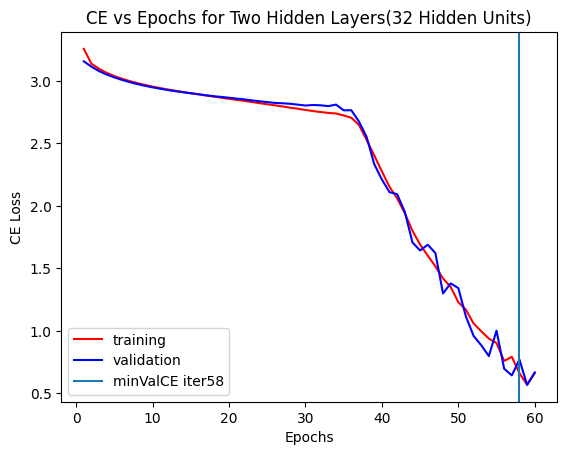

In [ ]:
CE_vs_EPOCHS(losses_train,losses_valid,epochs_n=60,title="CE vs Epochs for Two Hidden Layers(32 Hidden Units)")

 Train Accuracy: 0.7804541536050155
 Valid Accuracy: 0.7645237661628119
 Test Accuracy: 0.5078081427774679


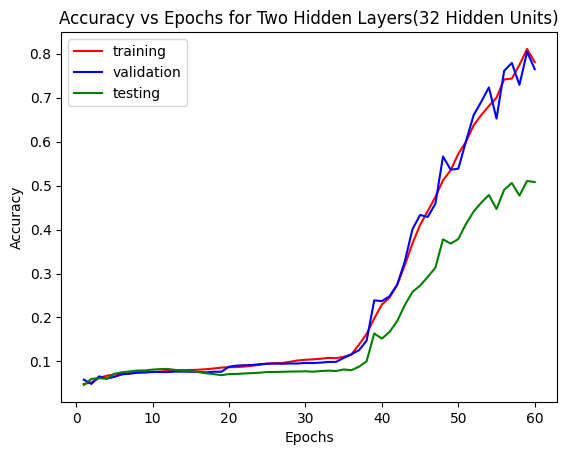

In [ ]:
ACCURACY_vs_EPOCHS(acc_train, acc_valid, acc_test,epochs_n=60,title="Accuracy vs Epochs for Two Hidden Layers(32 Hidden Units)")

64 Hidden Units:

In [ ]:
mlp2 = MLP(
    LinearLayer(28*28, HIDDEN_SIZE64),
    ReLULayer(),
    LinearLayer(HIDDEN_SIZE64, HIDDEN_SIZE64),
    ReLULayer(),
    LinearLayer(HIDDEN_SIZE64, 25),
    SoftmaxOutputLayer()
)

opt2 = GradientDescentOptimizer(mlp2, lr=0.1)
mlp, losses_train, losses_valid, acc_train, acc_valid, acc_test = mlp2.fit(opt2, X_train_tr, y_train_tr, X_train_va, y_train_va,X_test,y_test, steps=50, batch_size=500)

  2%|▏         | 1/50 [00:12<10:17, 12.59s/it]

time 0: train loss 3.205716476319367, train acc 0.048018025078369934, valid loss 3.170619318049024, valid acc 0.05609178655982517


  4%|▍         | 2/50 [00:24<09:37, 12.02s/it]

time 1: train loss 3.1547606311150562, train acc 0.061448275862068975, valid loss 3.1316306803549545, valid acc 0.05044618466581679


  6%|▌         | 3/50 [00:35<09:12, 11.76s/it]

time 2: train loss 3.113344382976489, train acc 0.05995885579937304, valid loss 3.088737145354265, valid acc 0.058095064651247495


  8%|▊         | 4/50 [00:47<08:57, 11.67s/it]

time 3: train loss 3.0785628470545845, train acc 0.061231583072100325, valid loss 3.052065519894198, valid acc 0.05682025132034238


 10%|█         | 5/50 [00:58<08:33, 11.41s/it]

time 4: train loss 3.0543998941669668, train acc 0.06682954545454545, valid loss 3.022057393590248, valid acc 0.04844290657439446


 12%|█▏        | 6/50 [01:09<08:13, 11.22s/it]

time 5: train loss 3.0374899755518525, train acc 0.06988910658307211, valid loss 2.996176364529883, valid acc 0.06355855035512657


 14%|█▍        | 7/50 [01:20<08:05, 11.30s/it]

time 6: train loss 3.0219913629790582, train acc 0.07400783699059563, valid loss 2.982557333588338, valid acc 0.06228373702422145


 16%|█▌        | 8/50 [01:31<07:56, 11.34s/it]

time 7: train loss 3.0064395703263456, train acc 0.07919318181818182, valid loss 2.9830102010962936, valid acc 0.0586414132216354


 18%|█▊        | 9/50 [01:44<08:01, 11.75s/it]

time 8: train loss 2.986058273869976, train acc 0.0802735109717868, valid loss 2.949733867842094, valid acc 0.08595884174103077


 20%|██        | 10/50 [01:55<07:44, 11.61s/it]

time 9: train loss 2.975760011941078, train acc 0.08444514106583073, valid loss 2.9311939893676446, valid acc 0.09816062647969405


 22%|██▏       | 11/50 [02:06<07:27, 11.47s/it]

time 10: train loss 2.965424598289646, train acc 0.08893808777429466, valid loss 2.971390843062924, valid acc 0.09706792933891822


 24%|██▍       | 12/50 [02:18<07:17, 11.50s/it]

time 11: train loss 2.9435529321613014, train acc 0.08851528213166142, valid loss 2.8952094834097664, valid acc 0.1016208340921508


 26%|██▌       | 13/50 [02:30<07:05, 11.49s/it]

time 12: train loss 2.922895566161719, train acc 0.09483699059561129, valid loss 2.8561631316043115, valid acc 0.10854124931706428


 28%|██▊       | 14/50 [02:41<06:54, 11.50s/it]

time 13: train loss 2.872046840665934, train acc 0.10093495297805642, valid loss 2.7974428765574357, valid acc 0.10544527408486615


 30%|███       | 15/50 [02:52<06:32, 11.21s/it]

time 14: train loss 2.806185354938659, train acc 0.10647061128526647, valid loss 2.7218247821808452, valid acc 0.11910398834456383


 32%|███▏      | 16/50 [03:03<06:24, 11.30s/it]

time 15: train loss 2.732090427703917, train acc 0.11803369905956114, valid loss 2.6549177765635217, valid acc 0.1382261883081406


 34%|███▍      | 17/50 [03:15<06:14, 11.35s/it]

time 16: train loss 2.681656683425913, train acc 0.1247260971786834, valid loss 2.6308616130530575, valid acc 0.12711710071025314


 36%|███▌      | 18/50 [03:26<06:05, 11.43s/it]

time 17: train loss 2.643376725889331, train acc 0.12791849529780566, valid loss 2.5854038137811433, valid acc 0.15461664541977782


 38%|███▊      | 19/50 [03:38<05:55, 11.45s/it]

time 18: train loss 2.6074574822122636, train acc 0.13308973354231976, valid loss 2.556400073495762, valid acc 0.1537060644691313


 40%|████      | 20/50 [03:48<05:35, 11.17s/it]

time 19: train loss 2.5718509719885247, train acc 0.13905133228840127, valid loss 2.521647422059155, valid acc 0.15753050446184666


 42%|████▏     | 21/50 [03:59<05:24, 11.18s/it]

time 20: train loss 2.5369107178969963, train acc 0.14603056426332295, valid loss 2.4856354647512084, valid acc 0.167364778728829


 44%|████▍     | 22/50 [04:11<05:16, 11.30s/it]

time 21: train loss 2.5006995058202093, train acc 0.1541845611285267, valid loss 2.4454458977210933, valid acc 0.1826625386996904


 46%|████▌     | 23/50 [04:22<05:06, 11.35s/it]

time 22: train loss 2.4546869622448204, train acc 0.16532445141065832, valid loss 2.3892515354267894, valid acc 0.20506283008559462


 48%|████▊     | 24/50 [04:34<05:00, 11.55s/it]

time 23: train loss 2.3848272705546587, train acc 0.18545101880877743, valid loss 2.287359985405463, valid acc 0.22837370242214533


 50%|█████     | 25/50 [04:47<04:53, 11.73s/it]

time 24: train loss 2.2639231235353128, train acc 0.22688479623824456, valid loss 2.185911091928739, valid acc 0.23492988526680023


 52%|█████▏    | 26/50 [04:57<04:34, 11.44s/it]

time 25: train loss 2.1273387578584924, train acc 0.2640528996865204, valid loss 2.0409344062461363, valid acc 0.27372063376434164


 54%|█████▍    | 27/50 [05:09<04:24, 11.51s/it]

time 26: train loss 1.9913723152125726, train acc 0.30275979623824445, valid loss 1.9139124966004586, valid acc 0.3214350755782189


 56%|█████▌    | 28/50 [05:21<04:14, 11.55s/it]

time 27: train loss 1.8758897520720845, train acc 0.3488099529780564, valid loss 1.7593887978938432, valid acc 0.3788016754689492


 58%|█████▊    | 29/50 [05:32<04:02, 11.56s/it]

time 28: train loss 1.7358007354301401, train acc 0.39881778996865214, valid loss 1.5891794598795657, valid acc 0.44363503915498087


 60%|██████    | 30/50 [05:44<03:49, 11.46s/it]

time 29: train loss 1.5925811535189354, train acc 0.44467123824451416, valid loss 1.453019921575583, valid acc 0.49371699144053904


 62%|██████▏   | 31/50 [05:54<03:32, 11.20s/it]

time 30: train loss 1.4728667178855637, train acc 0.4817276645768025, valid loss 1.3363535417021608, valid acc 0.5345110180295028


 64%|██████▍   | 32/50 [06:06<03:23, 11.28s/it]

time 31: train loss 1.3679252794656593, train acc 0.5152033699059562, valid loss 1.2988023117274206, valid acc 0.5396102713531233


 66%|██████▌   | 33/50 [06:17<03:12, 11.33s/it]

time 32: train loss 1.3016731103442447, train acc 0.5425748432601881, valid loss 1.1563040990145041, valid acc 0.5875068293571298


 68%|██████▊   | 34/50 [06:29<03:02, 11.41s/it]

time 33: train loss 1.1929391407641659, train acc 0.5837115987460815, valid loss 1.078147163449899, valid acc 0.6213804407211801


 70%|███████   | 35/50 [06:40<02:49, 11.29s/it]

time 34: train loss 1.0962502988033191, train acc 0.623365987460815, valid loss 0.9481508544051629, valid acc 0.677290111090876


 72%|███████▏  | 36/50 [06:50<02:35, 11.10s/it]

time 35: train loss 1.0230262161719692, train acc 0.6569502351097177, valid loss 0.8935488163660089, valid acc 0.6982334729557458


 74%|███████▍  | 37/50 [07:02<02:26, 11.24s/it]

time 36: train loss 0.8825462644460401, train acc 0.7054474921630093, valid loss 0.7666279125831574, valid acc 0.7392096157348388


 76%|███████▌  | 38/50 [07:13<02:15, 11.32s/it]

time 37: train loss 0.8469919397448031, train acc 0.7297695924764892, valid loss 0.7038753592731224, valid acc 0.7688945547259152


 78%|███████▊  | 39/50 [07:25<02:05, 11.39s/it]

time 38: train loss 0.7601077272635717, train acc 0.7608679467084639, valid loss 0.6167167773802739, valid acc 0.803132398470224


 80%|████████  | 40/50 [07:36<01:52, 11.28s/it]

time 39: train loss 0.592769757808857, train acc 0.8096579153605014, valid loss 0.6076749671416046, valid acc 0.8014933527590603


 82%|████████▏ | 41/50 [07:47<01:39, 11.09s/it]

time 40: train loss 0.5299546377581028, train acc 0.8315603448275861, valid loss 0.5695160954576785, valid acc 0.8131487889273357


 84%|████████▍ | 42/50 [07:58<01:29, 11.21s/it]

time 41: train loss 0.656747368879894, train acc 0.7985924764890282, valid loss 0.46214857908168144, valid acc 0.8568566745583682


 86%|████████▌ | 43/50 [08:10<01:19, 11.30s/it]

time 42: train loss 0.40257687170090467, train acc 0.8808550156739815, valid loss 0.4270329376953006, valid acc 0.8652340193043162


 88%|████████▊ | 44/50 [08:21<01:08, 11.40s/it]

time 43: train loss 0.5918840875534435, train acc 0.8365442789968651, valid loss 0.35170206213999194, valid acc 0.9043890001821162


 90%|█████████ | 45/50 [08:33<00:56, 11.39s/it]

time 44: train loss 0.3103817064269639, train acc 0.9166214733542319, valid loss 0.2858400027153133, valid acc 0.9302494991804772


 92%|█████████▏| 46/50 [08:45<00:46, 11.55s/it]

time 45: train loss 0.26252135688490075, train acc 0.9330133228840126, valid loss 0.2402640881231578, valid acc 0.9486432343835367


 94%|█████████▍| 47/50 [08:59<00:37, 12.41s/it]

time 46: train loss 0.22322976643101536, train acc 0.9457092476489031, valid loss 0.20350452396886917, valid acc 0.9584775086505191


 96%|█████████▌| 48/50 [09:10<00:24, 12.13s/it]

time 47: train loss 0.18893888940967685, train acc 0.9596046238244514, valid loss 0.17222293253746132, valid acc 0.9694044800582772


 98%|█████████▊| 49/50 [09:22<00:11, 11.96s/it]

time 48: train loss 0.15846123466017958, train acc 0.971157131661442, valid loss 0.14577492571794926, valid acc 0.9770533600437079


100%|██████████| 50/50 [09:32<00:00, 11.46s/it]

time 49: train loss 0.13284943173585806, train acc 0.9806606583072098, valid loss 0.12424486393938493, valid acc 0.9839737752686214


In [ ]:
mlp.check_gradient(X_train_tr, y_train_tr)

Weight gradient difference: [5.000096044533854e-20, 4.9897444129256853e-20, 4.9502407890356885e-20]
Biases gradient difference: [4.6609585571223563e-17, 4.9849055763969524e-17, 4.79154228452325e-17]


([5.000096044533854e-20, 4.9897444129256853e-20, 4.9502407890356885e-20],
 [4.6609585571223563e-17, 4.9849055763969524e-17, 4.79154228452325e-17])

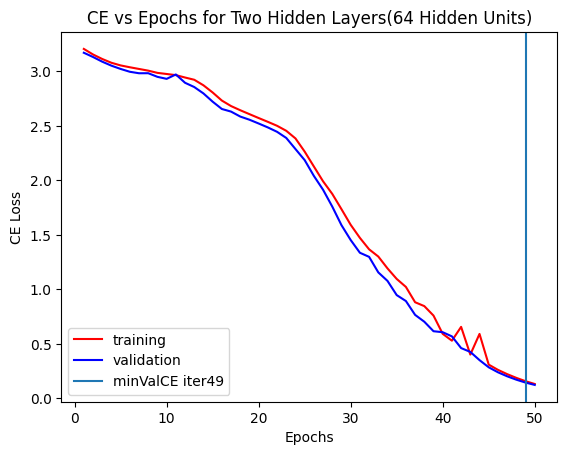

In [ ]:
CE_vs_EPOCHS(losses_train,losses_valid,epochs_n=50,title="CE vs Epochs for Two Hidden Layers(64 Hidden Units)")

 Train Accuracy: 0.9806606583072098
 Valid Accuracy: 0.9839737752686214
 Test Accuracy: 0.6175404350250976


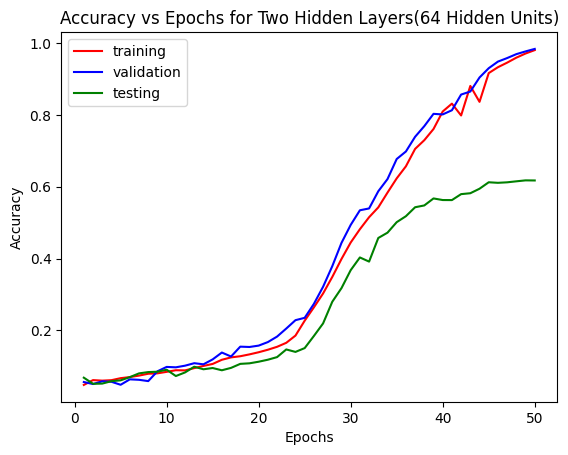

In [ ]:
ACCURACY_vs_EPOCHS(acc_train, acc_valid, acc_test,epochs_n=50,title="Accuracy vs Epochs for Two Hidden Layers(64 Hidden Units)")

128 Hidden Units:

In [ ]:
mlp2 = MLP(
    LinearLayer(28*28, HIDDEN_SIZE128),
    ReLULayer(),
    LinearLayer(HIDDEN_SIZE128, HIDDEN_SIZE128),
    ReLULayer(),
    LinearLayer(HIDDEN_SIZE128, 25),
    SoftmaxOutputLayer()
)

opt2 = GradientDescentOptimizer(mlp2, lr=0.1)
mlp, losses_train, losses_valid, acc_train, acc_valid, acc_test = mlp2.fit(opt2, X_train_tr, y_train_tr, X_train_va, y_train_va,X_test,y_test, steps=50, batch_size=500)

  2%|▏         | 1/50 [00:22<18:07, 22.20s/it]

time 0: train loss 3.207845101783817, train acc 0.04735384012539188, valid loss 3.182211124208336, valid acc 0.03933709706792934


  4%|▍         | 2/50 [00:45<18:24, 23.00s/it]

time 1: train loss 3.1794740997994655, train acc 0.04913714733542321, valid loss 3.1769961250603176, valid acc 0.045529047532325624


  6%|▌         | 3/50 [01:08<17:58, 22.95s/it]

time 2: train loss 3.1736848556336024, train acc 0.05301489028213168, valid loss 3.168488804167872, valid acc 0.06756510653797122


  8%|▊         | 4/50 [01:30<17:18, 22.57s/it]

time 3: train loss 3.16489776980876, train acc 0.059536050156739836, valid loss 3.15603973622807, valid acc 0.05572755417956656


 10%|█         | 5/50 [01:53<17:03, 22.74s/it]

time 4: train loss 3.1541098171029645, train acc 0.06279467084639499, valid loss 3.141341507439256, valid acc 0.043343653250773995


 12%|█▏        | 6/50 [02:15<16:26, 22.42s/it]

time 5: train loss 3.1433172877833955, train acc 0.06268612852664578, valid loss 3.1261408176227867, valid acc 0.052995811327627027


 14%|█▍        | 7/50 [02:38<16:15, 22.69s/it]

time 6: train loss 3.133640836722426, train acc 0.06136794670846397, valid loss 3.111942823960671, valid acc 0.040429794208705155


 16%|█▌        | 8/50 [03:03<16:19, 23.31s/it]

time 7: train loss 3.124879241787715, train acc 0.06040987460815048, valid loss 3.099401984603708, valid acc 0.05991622655254052


 18%|█▊        | 9/50 [03:25<15:35, 22.83s/it]

time 8: train loss 3.11612604984083, train acc 0.06096238244514108, valid loss 3.088020356783508, valid acc 0.05991622655254052


 20%|██        | 10/50 [03:48<15:17, 22.94s/it]

time 9: train loss 3.106561994294606, train acc 0.06206739811912227, valid loss 3.0748999545504665, valid acc 0.06009834274266982


 22%|██▏       | 11/50 [04:11<15:01, 23.11s/it]

time 10: train loss 3.077602762706452, train acc 0.06696630094043889, valid loss 2.9964459572182776, valid acc 0.0799490074667638


 24%|██▍       | 12/50 [04:33<14:25, 22.78s/it]

time 11: train loss 2.919278545219314, train acc 0.09349882445141068, valid loss 2.7825256494312836, valid acc 0.11837552358404663


 26%|██▌       | 13/50 [04:57<14:07, 22.92s/it]

time 12: train loss 2.7520934526337593, train acc 0.11200235109717872, valid loss 2.670519438171466, valid acc 0.13421963212529595


 28%|██▊       | 14/50 [05:19<13:38, 22.74s/it]

time 13: train loss 2.666735933253708, train acc 0.11864224137931031, valid loss 2.6156581254520748, valid acc 0.1320342378437443


 30%|███       | 15/50 [05:42<13:15, 22.72s/it]

time 14: train loss 2.6203131087459526, train acc 0.12285893416927904, valid loss 2.5841387475043023, valid acc 0.13039519213258058


 32%|███▏      | 16/50 [06:07<13:15, 23.41s/it]

time 15: train loss 2.5908071653806526, train acc 0.12830995297805645, valid loss 2.5626234661192915, valid acc 0.13258058641413223


 34%|███▍      | 17/50 [06:28<12:36, 22.93s/it]

time 16: train loss 2.5693042560080785, train acc 0.12972609717868339, valid loss 2.5458970813087825, valid acc 0.13367328355490804


 36%|███▌      | 18/50 [06:52<12:18, 23.08s/it]

time 17: train loss 2.5508619254020863, train acc 0.13208268025078373, valid loss 2.5289751162080663, valid acc 0.13513021307594245


 38%|███▊      | 19/50 [07:14<11:47, 22.81s/it]

time 18: train loss 2.5304766747084204, train acc 0.13629937304075235, valid loss 2.5063415279566614, valid acc 0.13731560735749407


 40%|████      | 20/50 [07:37<11:24, 22.80s/it]

time 19: train loss 2.4961710510565207, train acc 0.14720532915360504, valid loss 2.455103862838331, valid acc 0.15643780732107085


 42%|████▏     | 21/50 [08:00<11:06, 22.98s/it]

time 20: train loss 2.4273199780248187, train acc 0.1650274294670847, valid loss 2.3743803290447922, valid acc 0.1746494263340011


 44%|████▍     | 22/50 [08:22<10:33, 22.63s/it]

time 21: train loss 2.3335240585253176, train acc 0.1960313479623825, valid loss 2.2774134271691744, valid acc 0.22036059005645603


 46%|████▌     | 23/50 [08:45<10:16, 22.82s/it]

time 22: train loss 2.232440560451145, train acc 0.23832523510971787, valid loss 2.18047986607502, valid acc 0.2620651975960663


 48%|████▊     | 24/50 [09:08<09:50, 22.72s/it]

time 23: train loss 2.135565015923608, train acc 0.2704098746081505, valid loss 2.05974717072649, valid acc 0.29721362229102166


 50%|█████     | 25/50 [09:32<09:38, 23.15s/it]

time 24: train loss 2.0144348027218375, train acc 0.3129106583072101, valid loss 1.8807218563906463, valid acc 0.3584046621744673


 52%|█████▏    | 26/50 [09:55<09:14, 23.12s/it]

time 25: train loss 1.83061832242718, train acc 0.36068691222570537, valid loss 1.7204741996110717, valid acc 0.39063922782735383


 54%|█████▍    | 27/50 [10:17<08:41, 22.69s/it]

time 26: train loss 1.71166708330974, train acc 0.39294984326018817, valid loss 1.6274763004866053, valid acc 0.4148606811145511


 56%|█████▌    | 28/50 [10:40<08:21, 22.82s/it]

time 27: train loss 1.623658963347818, train acc 0.4274784482758621, valid loss 1.5179323712875137, valid acc 0.46767437625204883


 58%|█████▊    | 29/50 [11:02<07:55, 22.67s/it]

time 28: train loss 1.5137886749169744, train acc 0.47007758620689677, valid loss 1.3809247703140652, valid acc 0.5161172828264433


 60%|██████    | 30/50 [11:25<07:34, 22.70s/it]

time 29: train loss 1.3926905185030443, train acc 0.5181061912225704, valid loss 1.2553069774002208, valid acc 0.5543616827535968


 62%|██████▏   | 31/50 [11:48<07:13, 22.84s/it]

time 30: train loss 1.2669468974883764, train acc 0.5635266457680251, valid loss 1.1115673456935717, valid acc 0.6213804407211801


 64%|██████▍   | 32/50 [12:10<06:46, 22.57s/it]

time 31: train loss 1.1352090490910993, train acc 0.6169153605015674, valid loss 0.9826691580451578, valid acc 0.6732835549080314


 66%|██████▌   | 33/50 [12:35<06:34, 23.23s/it]

time 32: train loss 1.0111714326106258, train acc 0.6646500783699061, valid loss 0.9002083617669312, valid acc 0.6927699872518667


 68%|██████▊   | 34/50 [12:58<06:11, 23.20s/it]

time 33: train loss 0.8693557335047069, train acc 0.7123358150470221, valid loss 0.7920980350688894, valid acc 0.7352030595519942


 70%|███████   | 35/50 [13:20<05:42, 22.83s/it]

time 34: train loss 0.7841619177602209, train acc 0.7425913009404389, valid loss 0.721490904554561, valid acc 0.7628847204516481


 72%|███████▏  | 36/50 [13:43<05:20, 22.86s/it]

time 35: train loss 0.6930727666470824, train acc 0.7772433385579937, valid loss 1.12070739206019, valid acc 0.6501547987616099


 74%|███████▍  | 37/50 [14:05<04:56, 22.78s/it]

time 36: train loss 0.6782270547725523, train acc 0.7841457680250783, valid loss 0.7995755179011649, valid acc 0.7160808595884174


 76%|███████▌  | 38/50 [14:28<04:31, 22.61s/it]

time 37: train loss 0.5024533953832488, train acc 0.8404596394984325, valid loss 0.47768989582368826, valid acc 0.8495720269531961


 78%|███████▊  | 39/50 [14:51<04:10, 22.77s/it]

time 38: train loss 0.49757659676322796, train acc 0.8455646551724136, valid loss 0.4311865740968198, valid acc 0.8648697869240576


 80%|████████  | 40/50 [15:18<04:01, 24.19s/it]

time 39: train loss 0.40962605324275675, train acc 0.8804130094043887, valid loss 1.2474094896325578, valid acc 0.6969586596248406


 82%|████████▏ | 41/50 [15:49<03:55, 26.20s/it]

time 40: train loss 0.45036097729272484, train acc 0.8853307210031346, valid loss 0.3397579193708695, valid acc 0.8967401201966855


 84%|████████▍ | 42/50 [16:11<03:20, 25.01s/it]

time 41: train loss 0.39514056784386137, train acc 0.8989992163009405, valid loss 0.27620329791769826, valid acc 0.9318885448916409


 86%|████████▌ | 43/50 [16:34<02:49, 24.28s/it]

time 42: train loss 0.22385761374813198, train acc 0.9514290752351098, valid loss 0.25280166797801834, valid acc 0.9317064287015115


 88%|████████▊ | 44/50 [16:57<02:23, 23.91s/it]

time 43: train loss 0.1862501748286066, train acc 0.9615027429467085, valid loss 0.2162952545543737, valid acc 0.9437260972500455


 90%|█████████ | 45/50 [17:19<01:56, 23.24s/it]

time 44: train loss 0.15468636320600734, train acc 0.9720239028213168, valid loss 0.169995945847543, valid acc 0.9606629029320707


 92%|█████████▏| 46/50 [17:42<01:32, 23.18s/it]

time 45: train loss 0.12839566787376036, train acc 0.9803142633228837, valid loss 0.12826006576735643, valid acc 0.9823347295574577


 94%|█████████▍| 47/50 [18:05<01:09, 23.07s/it]

time 46: train loss 0.10672863887777986, train acc 0.9867025862068961, valid loss 0.10349164353050361, valid acc 0.9888909124021126


 96%|█████████▌| 48/50 [18:27<00:45, 22.77s/it]

time 47: train loss 0.08964585613844984, train acc 0.9907550940438866, valid loss 0.08689871042531999, valid acc 0.9923511200145693


 98%|█████████▊| 49/50 [18:51<00:23, 23.30s/it]

time 48: train loss 0.07609952799567064, train acc 0.9934858934169277, valid loss 0.07434539177309069, valid acc 0.9956292114368968


100%|██████████| 50/50 [19:13<00:00, 23.07s/it]

time 49: train loss 0.06525100096221155, train acc 0.995496473354232, valid loss 0.06433153149005355, valid acc 0.9967219085776725


In [ ]:
mlp.check_gradient(X_train_tr, y_train_tr)

Weight gradient difference: [5.0092999473288946e-20, 5.020677444773752e-20, 5.018421257387162e-20]
Biases gradient difference: [5.227582645728549e-17, 5.48003950749032e-17, 4.756713917505915e-17]


([5.0092999473288946e-20, 5.020677444773752e-20, 5.018421257387162e-20],
 [5.227582645728549e-17, 5.48003950749032e-17, 4.756713917505915e-17])

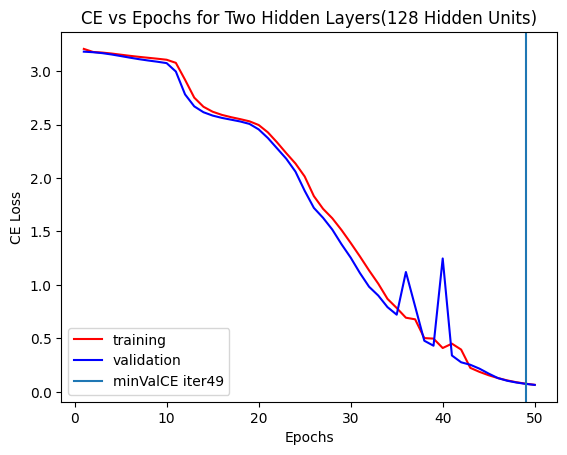

In [ ]:
CE_vs_EPOCHS(losses_train,losses_valid,epochs_n=50,title="CE vs Epochs for Two Hidden Layers(128 Hidden Units)")

 Train Accuracy: 0.995496473354232
 Valid Accuracy: 0.9967219085776725
 Test Accuracy: 0.6041550474065811


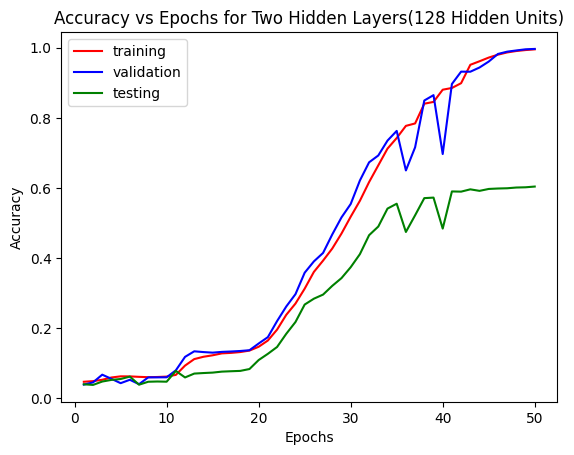

In [ ]:
ACCURACY_vs_EPOCHS(acc_train, acc_valid, acc_test,epochs_n=50,title="Accuracy vs Epochs for Two Hidden Layers(128 Hidden Units)")

256 Hidden Units:

In [ ]:
mlp2 = MLP(
    LinearLayer(28*28, HIDDEN_SIZE256),
    ReLULayer(),
    LinearLayer(HIDDEN_SIZE256, HIDDEN_SIZE256),
    ReLULayer(),
    LinearLayer(HIDDEN_SIZE256, 25),
    SoftmaxOutputLayer()
)

opt2 = GradientDescentOptimizer(mlp2, lr=0.1)
mlp, losses_train, losses_valid, acc_train, acc_valid, acc_test = mlp2.fit(opt2, X_train_tr, y_train_tr, X_train_va, y_train_va,X_test,y_test, steps=50, batch_size=500)

  2%|▏         | 1/50 [00:49<40:18, 49.36s/it]

time 0: train loss 3.207175222077578, train acc 0.045070532915360534, valid loss 3.1876589233629966, valid acc 0.03933709706792934


  4%|▍         | 2/50 [01:42<41:06, 51.38s/it]

time 1: train loss 3.185970147638246, train acc 0.04499373040752353, valid loss 3.186727629000457, valid acc 0.03933709706792934


  6%|▌         | 3/50 [02:36<41:11, 52.58s/it]

time 2: train loss 3.1853827018563377, train acc 0.04514420062695927, valid loss 3.1863970953925973, valid acc 0.03933709706792934


  8%|▊         | 4/50 [03:24<38:54, 50.75s/it]

time 3: train loss 3.1851468112134964, train acc 0.04522100313479626, valid loss 3.1861263980666323, valid acc 0.03933709706792934


 10%|█         | 5/50 [04:13<37:40, 50.22s/it]

time 4: train loss 3.184886500714386, train acc 0.04685384012539187, valid loss 3.185401335603669, valid acc 0.03933709706792934


 12%|█▏        | 6/50 [05:01<36:13, 49.40s/it]

time 5: train loss 3.1838623647421356, train acc 0.0471720219435737, valid loss 3.182567125393453, valid acc 0.046621744673101435


 14%|█▍        | 7/50 [05:51<35:34, 49.63s/it]

time 6: train loss 3.180090743550555, train acc 0.0492280564263323, valid loss 3.1746772365869225, valid acc 0.05044618466581679


 16%|█▌        | 8/50 [06:39<34:20, 49.07s/it]

time 7: train loss 3.1726623809173873, train acc 0.054637539184952996, valid loss 3.1630505126785926, valid acc 0.057002367510471684


 18%|█▊        | 9/50 [07:27<33:21, 48.82s/it]

time 8: train loss 3.1630480610527596, train acc 0.06032641065830724, valid loss 3.1485183960202874, valid acc 0.07047896558004006


 20%|██        | 10/50 [08:15<32:26, 48.67s/it]

time 9: train loss 3.1510906705278283, train acc 0.06647688087774296, valid loss 3.1312575072888245, valid acc 0.07758149699508286


 22%|██▏       | 11/50 [09:04<31:42, 48.78s/it]

time 10: train loss 3.139184653410308, train acc 0.07107836990595612, valid loss 3.115183997642724, valid acc 0.08614095793116008


 24%|██▍       | 12/50 [09:53<30:52, 48.75s/it]

time 11: train loss 3.1305486907663425, train acc 0.07545258620689656, valid loss 3.1030222936723546, valid acc 0.09870697505008195


 26%|██▌       | 13/50 [10:41<29:53, 48.48s/it]

time 12: train loss 3.1243272833717453, train acc 0.0786449843260188, valid loss 3.0937199390176624, valid acc 0.10253141504279731


 28%|██▊       | 14/50 [11:32<29:33, 49.27s/it]

time 13: train loss 3.118599132307632, train acc 0.08001567398119122, valid loss 3.082788139451607, valid acc 0.09761427790930614


 30%|███       | 15/50 [12:24<29:14, 50.12s/it]

time 14: train loss 3.0901041576272488, train acc 0.08374608150470218, valid loss 3.023893547211065, valid acc 0.11163722454926243


 32%|███▏      | 16/50 [13:13<28:10, 49.72s/it]

time 15: train loss 2.975138900930534, train acc 0.10200470219435735, valid loss 2.86016339245578, valid acc 0.11837552358404663


 34%|███▍      | 17/50 [14:02<27:16, 49.59s/it]

time 16: train loss 2.8063519758561495, train acc 0.1198166144200627, valid loss 2.701050492314816, valid acc 0.13421963212529595


 36%|███▌      | 18/50 [14:52<26:26, 49.58s/it]

time 17: train loss 2.6799855715640915, train acc 0.13108620689655176, valid loss 2.607493261535533, valid acc 0.15061008923693317


 38%|███▊      | 19/50 [15:40<25:28, 49.31s/it]

time 18: train loss 2.6036148691611865, train acc 0.14261442006269595, valid loss 2.562452935747345, valid acc 0.15498087780003642


 40%|████      | 20/50 [16:29<24:30, 49.02s/it]

time 19: train loss 2.5635270091152025, train acc 0.1477543103448276, valid loss 2.526654796054838, valid acc 0.16208340921507922


 42%|████▏     | 21/50 [17:18<23:42, 49.05s/it]

time 20: train loss 2.5229461695519424, train acc 0.15817750783699064, valid loss 2.481192263812579, valid acc 0.17738116918594063


 44%|████▍     | 22/50 [18:08<23:00, 49.30s/it]

time 21: train loss 2.445929126388395, train acc 0.18376880877742954, valid loss 2.3519252480872046, valid acc 0.20305955199417228


 46%|████▌     | 23/50 [18:57<22:09, 49.22s/it]

time 22: train loss 2.2490498242315202, train acc 0.23724137931034484, valid loss 2.139176164939534, valid acc 0.25896922236386816


 48%|████▊     | 24/50 [19:45<21:12, 48.95s/it]

time 23: train loss 2.0979655320253245, train acc 0.2739200626959248, valid loss 2.032814720824891, valid acc 0.2924786013476598


 50%|█████     | 25/50 [20:36<20:37, 49.50s/it]

time 24: train loss 2.0166554061404147, train acc 0.295375, valid loss 1.9658080971239447, valid acc 0.3035876889455473


 52%|█████▏    | 26/50 [21:24<19:38, 49.11s/it]

time 25: train loss 1.9506817818916746, train acc 0.3139177115987461, valid loss 1.895413120045229, valid acc 0.31815698415589144


 54%|█████▍    | 27/50 [22:13<18:48, 49.08s/it]

time 26: train loss 1.8668043705269428, train acc 0.344016065830721, valid loss 1.7876355014712866, valid acc 0.3505736659989073


 56%|█████▌    | 28/50 [23:01<17:53, 48.78s/it]

time 27: train loss 1.755138907979729, train acc 0.3863138714733542, valid loss 1.6650358629161814, valid acc 0.40393370970679293


 58%|█████▊    | 29/50 [23:52<17:17, 49.40s/it]

time 28: train loss 1.6415553127988785, train acc 0.4337166927899687, valid loss 1.5188916750179569, valid acc 0.46894918958295395


 60%|██████    | 30/50 [24:40<16:21, 49.10s/it]

time 29: train loss 1.5255655187169432, train acc 0.47795141065830715, valid loss 1.3873666937733784, valid acc 0.5192132580586414


 62%|██████▏   | 31/50 [25:30<15:35, 49.22s/it]

time 30: train loss 1.4067341596380964, train acc 0.5166794670846394, valid loss 1.2697011998669185, valid acc 0.5649244217810964


 64%|██████▍   | 32/50 [26:18<14:39, 48.85s/it]

time 31: train loss 1.2899229740342049, train acc 0.5555783699059562, valid loss 1.1518323211517294, valid acc 0.6046257512292843


 66%|██████▌   | 33/50 [27:08<13:56, 49.23s/it]

time 32: train loss 1.1513431843034534, train acc 0.6007782131661443, valid loss 1.0705867150339705, valid acc 0.6366782006920415


 68%|██████▊   | 34/50 [27:56<13:00, 48.77s/it]

time 33: train loss 1.0763663110325377, train acc 0.632876959247649, valid loss 0.9249227979119905, valid acc 0.68930977963941


 70%|███████   | 35/50 [28:45<12:12, 48.85s/it]

time 34: train loss 0.8901701643724697, train acc 0.6974439655172415, valid loss 0.8108106451355683, valid acc 0.726097250045529


 72%|███████▏  | 36/50 [29:34<11:27, 49.09s/it]

time 35: train loss 0.850293583265434, train acc 0.7184968652037615, valid loss 0.7162566476090796, valid acc 0.7532325623747951


 74%|███████▍  | 37/50 [30:24<10:40, 49.26s/it]

time 36: train loss 0.6792909086506858, train acc 0.7721688871473354, valid loss 0.6088200750229982, valid acc 0.7858313604079402


 76%|███████▌  | 38/50 [31:12<09:47, 48.92s/it]

time 37: train loss 0.5788757353042211, train acc 0.806102664576803, valid loss 0.523720906472573, valid acc 0.8149699508286287


 78%|███████▊  | 39/50 [32:02<08:59, 49.09s/it]

time 38: train loss 0.5198012750139263, train acc 0.8281904388714735, valid loss 0.4374127498375617, valid acc 0.8479329812420324


 80%|████████  | 40/50 [32:50<08:09, 48.99s/it]

time 39: train loss 0.433749762205288, train acc 0.8636618338557995, valid loss 0.47452793720260794, valid acc 0.8366417774540157


 82%|████████▏ | 41/50 [33:40<07:22, 49.11s/it]

time 40: train loss 0.3530116899091349, train acc 0.8963311128526644, valid loss 0.31422211680721096, valid acc 0.909670369695866


 84%|████████▍ | 42/50 [34:28<06:30, 48.83s/it]

time 41: train loss 0.28226744069463144, train acc 0.9271704545454544, valid loss 0.26177949452429455, valid acc 0.9304316153706065


 86%|████████▌ | 43/50 [35:18<05:45, 49.33s/it]

time 42: train loss 0.2331846387814595, train acc 0.9451637931034483, valid loss 0.21203777424622222, valid acc 0.952467674376252


 88%|████████▊ | 44/50 [36:07<04:54, 49.03s/it]

time 43: train loss 0.18889107824794962, train acc 0.9600975705329154, valid loss 0.16988618547703235, valid acc 0.9690402476780186


 90%|█████████ | 45/50 [36:56<04:05, 49.06s/it]

time 44: train loss 0.15088374275116367, train acc 0.9717374608150471, valid loss 0.13576461149119895, valid acc 0.9805135676561646


 92%|█████████▏| 46/50 [37:44<03:15, 48.78s/it]

time 45: train loss 0.11937961555375609, train acc 0.9823040752351094, valid loss 0.10939195325235036, valid acc 0.986159169550173


 94%|█████████▍| 47/50 [38:34<02:27, 49.24s/it]

time 46: train loss 0.09514588313259238, train acc 0.990262147335423, valid loss 0.08925636113380632, valid acc 0.9912584228737935


 96%|█████████▌| 48/50 [39:22<01:37, 48.90s/it]

time 47: train loss 0.07719549073764881, train acc 0.9948565830721002, valid loss 0.0737155332988935, valid acc 0.9943543981059916


 98%|█████████▊| 49/50 [40:12<00:48, 48.98s/it]

time 48: train loss 0.06370684962767265, train acc 0.9973146551724136, valid loss 0.06168318522059998, valid acc 0.9969040247678018


100%|██████████| 50/50 [41:00<00:00, 49.21s/it]

time 49: train loss 0.053462856937637436, train acc 0.9985873824451409, valid loss 0.052344909963441676, valid acc 0.998178838098707


In [ ]:
mlp.check_gradient(X_train_tr, y_train_tr)

Weight gradient difference: [5.0021831410088385e-20, 5.0010959689874004e-20, 4.995141466671422e-20]
Biases gradient difference: [4.82893861280187e-17, 4.870178153950258e-17, 5.2115468546513477e-17]


([5.0021831410088385e-20, 5.0010959689874004e-20, 4.995141466671422e-20],
 [4.82893861280187e-17, 4.870178153950258e-17, 5.2115468546513477e-17])

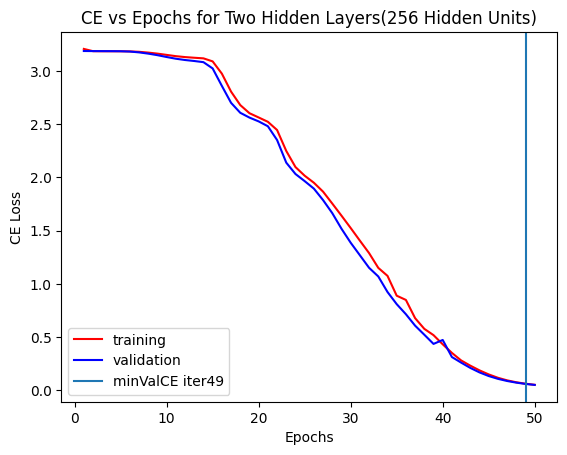

In [ ]:
CE_vs_EPOCHS(losses_train,losses_valid,epochs_n=50,title="CE vs Epochs for Two Hidden Layers(256 Hidden Units)")

 Train Accuracy: 0.9985873824451409
 Valid Accuracy: 0.998178838098707
 Test Accuracy: 0.6657836029001674


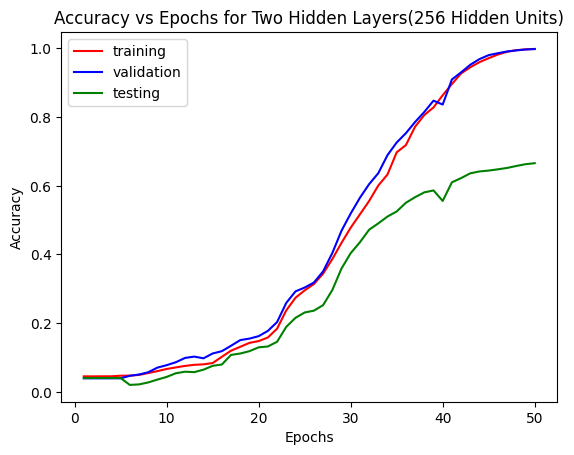

In [ ]:
ACCURACY_vs_EPOCHS(acc_train, acc_valid, acc_test,epochs_n=50,title="Accuracy vs Epochs for Two Hidden Layers(256 Hidden Units)")

## 3.2: ReLU/Leaky-ReLU/Sigmoid

### ReLU

Please see previous part.

### Leaky ReLU

In [ ]:
mlp2_leakyRelu = MLP(
    LinearLayer(28*28, HIDDEN_SIZE256),
    LeakyReLULayer(0.1),
    LinearLayer(HIDDEN_SIZE256, HIDDEN_SIZE256),
    LeakyReLULayer(0.1),
    LinearLayer(HIDDEN_SIZE256, 25),
    SoftmaxOutputLayer()
)

opt2_leaky = GradientDescentOptimizer(mlp2_leakyRelu, lr=0.1)
mlp, losses_train, losses_valid, acc_train, acc_valid, acc_test = mlp2_leakyRelu.fit(opt2_leaky, X_train_tr, y_train_tr, X_train_va, y_train_va,X_test,y_test, steps=50, batch_size=500)

  2%|▏         | 1/50 [00:48<39:39, 48.57s/it]

time 0: train loss 3.216662845651928, train acc 0.04349020376175551, valid loss 3.187486881810529, valid acc 0.03933709706792934


  4%|▍         | 2/50 [01:39<39:57, 49.94s/it]

time 1: train loss 3.186149692478271, train acc 0.045035658307210055, valid loss 3.1865235198950574, valid acc 0.03933709706792934


  6%|▌         | 3/50 [02:31<39:49, 50.83s/it]

time 2: train loss 3.184571988304201, train acc 0.04497257053291538, valid loss 3.1845632900264307, valid acc 0.03933709706792934


  8%|▊         | 4/50 [03:21<38:54, 50.75s/it]

time 3: train loss 3.180753543937149, train acc 0.047360893416927924, valid loss 3.1779657390506633, valid acc 0.03933709706792934


 10%|█         | 5/50 [04:18<39:29, 52.67s/it]

time 4: train loss 3.1668012152978435, train acc 0.059707288401253944, valid loss 3.151296854771377, valid acc 0.08450191221999635


 12%|█▏        | 6/50 [05:08<37:59, 51.81s/it]

time 5: train loss 3.124289313349663, train acc 0.07699725705329154, valid loss 3.098000820294185, valid acc 0.0659260608268075


 14%|█▍        | 7/50 [05:58<36:43, 51.24s/it]

time 6: train loss 3.073159800995523, train acc 0.07434717868338558, valid loss 3.0495342134869343, valid acc 0.06410489892551448


 16%|█▌        | 8/50 [06:49<35:47, 51.12s/it]

time 7: train loss 3.0180275699067347, train acc 0.07441026645768023, valid loss 2.9840315349406303, valid acc 0.06865780367874703


 18%|█▊        | 9/50 [07:39<34:52, 51.03s/it]

time 8: train loss 2.89007771787289, train acc 0.09814851097178684, valid loss 2.7623288793895524, valid acc 0.1165543616827536


 20%|██        | 10/50 [08:28<33:25, 50.13s/it]

time 9: train loss 2.6781152642023054, train acc 0.13034796238244512, valid loss 2.6134448947037043, valid acc 0.13513021307594245


 22%|██▏       | 11/50 [09:16<32:11, 49.54s/it]

time 10: train loss 2.5771563022393873, train acc 0.14113166144200628, valid loss 2.5441339735982775, valid acc 0.153523948279002


 24%|██▍       | 12/50 [10:08<31:56, 50.42s/it]

time 11: train loss 2.5280569631663012, train acc 0.1465164576802508, valid loss 2.5055073267919066, valid acc 0.1600801311236569


 26%|██▌       | 13/50 [11:00<31:16, 50.71s/it]

time 12: train loss 2.4991185353324514, train acc 0.15208659874608152, valid loss 2.481090860939167, valid acc 0.16317610635585503


 28%|██▊       | 14/50 [11:48<30:01, 50.04s/it]

time 13: train loss 2.4802766372072758, train acc 0.15384874608150478, valid loss 2.462427952970014, valid acc 0.16536150063740668


 30%|███       | 15/50 [12:38<29:07, 49.92s/it]

time 14: train loss 2.464483380753301, train acc 0.15705172413793103, valid loss 2.4386481096901083, valid acc 0.17009652158076852


 32%|███▏      | 16/50 [13:28<28:17, 49.92s/it]

time 15: train loss 2.4254409232251946, train acc 0.16690164576802502, valid loss 2.3868110150803363, valid acc 0.18630486250227646


 34%|███▍      | 17/50 [14:22<28:14, 51.34s/it]

time 16: train loss 2.356545976338885, train acc 0.18624098746081508, valid loss 2.3079907469204963, valid acc 0.2052449462757239


 36%|███▌      | 18/50 [15:13<27:14, 51.07s/it]

time 17: train loss 2.2667753902271475, train acc 0.21083581504702195, valid loss 2.201999475145672, valid acc 0.2254598433800765


 38%|███▊      | 19/50 [16:03<26:17, 50.89s/it]

time 18: train loss 2.1448779235882554, train acc 0.2471649686520377, valid loss 2.060019821708516, valid acc 0.26698233472955746


 40%|████      | 20/50 [16:53<25:19, 50.66s/it]

time 19: train loss 1.9944733414085656, train acc 0.29909600313479623, valid loss 1.8924993362381946, valid acc 0.3188854489164087


 42%|████▏     | 21/50 [17:45<24:35, 50.89s/it]

time 20: train loss 1.8277462384819692, train acc 0.3667092476489028, valid loss 1.7207280486917238, valid acc 0.4022946639956292


 44%|████▍     | 22/50 [18:38<24:05, 51.64s/it]

time 21: train loss 1.6746559148245128, train acc 0.423828761755486, valid loss 1.5731981348546036, valid acc 0.4591149153159716


 46%|████▌     | 23/50 [19:27<22:55, 50.94s/it]

time 22: train loss 1.5611072597932258, train acc 0.4614094827586207, valid loss 1.4578083012862457, valid acc 0.5040976142779093


 48%|████▊     | 24/50 [20:19<22:10, 51.17s/it]

time 23: train loss 1.4610134858687962, train acc 0.5003471786833857, valid loss 1.3145843684677225, valid acc 0.5561828446548899


 50%|█████     | 25/50 [21:10<21:14, 50.98s/it]

time 24: train loss 1.322639006992102, train acc 0.5459106583072102, valid loss 1.1974313755176087, valid acc 0.5998907302859224


 52%|█████▏    | 26/50 [21:59<20:13, 50.55s/it]

time 25: train loss 1.216161430144326, train acc 0.5881418495297805, valid loss 1.0872553975937256, valid acc 0.6405026406847569


 54%|█████▍    | 27/50 [22:49<19:15, 50.25s/it]

time 26: train loss 1.1260547062787274, train acc 0.6242264890282132, valid loss 0.9663562183260385, valid acc 0.6834820615552722


 56%|█████▌    | 28/50 [23:40<18:32, 50.57s/it]

time 27: train loss 0.927940251379341, train acc 0.697740987460815, valid loss 0.8541187116100195, valid acc 0.7211801129120379


 58%|█████▊    | 29/50 [24:33<17:56, 51.27s/it]

time 28: train loss 0.9100326785132395, train acc 0.701853448275862, valid loss 0.7568899331527356, valid acc 0.7563285376069933


 60%|██████    | 30/50 [25:21<16:47, 50.36s/it]

time 29: train loss 0.7466581834227379, train acc 0.7588326802507837, valid loss 0.6679807925511854, valid acc 0.7902021489710436


 62%|██████▏   | 31/50 [26:12<15:59, 50.48s/it]

time 30: train loss 0.6663756225452666, train acc 0.7913087774294673, valid loss 0.5796624162388154, valid acc 0.8258969222363868


 64%|██████▍   | 32/50 [27:01<15:01, 50.07s/it]

time 31: train loss 0.6555440716162502, train acc 0.8071485109717866, valid loss 0.509490009740433, valid acc 0.8466581679111272


 66%|██████▌   | 33/50 [27:51<14:08, 49.91s/it]

time 32: train loss 0.5659905682381946, train acc 0.8369039968652037, valid loss 0.4392501978997471, valid acc 0.8719723183391004


 68%|██████▊   | 34/50 [28:41<13:21, 50.07s/it]

time 33: train loss 0.47966693533061383, train acc 0.8609427899686523, valid loss 0.3784720659583681, valid acc 0.8963758878164269


 70%|███████   | 35/50 [29:34<12:41, 50.78s/it]

time 34: train loss 0.34969945457580576, train acc 0.9054220219435737, valid loss 0.3145562125899106, valid acc 0.9233290839555637


 72%|███████▏  | 36/50 [30:24<11:51, 50.82s/it]

time 35: train loss 0.3236363657462165, train acc 0.9107076802507836, valid loss 0.6187200321083942, valid acc 0.8034966308504826


 74%|███████▍  | 37/50 [31:14<10:57, 50.54s/it]

time 36: train loss 0.3529844770077528, train acc 0.9112966300940438, valid loss 0.23012196445795557, valid acc 0.9471863048625023


 76%|███████▌  | 38/50 [32:05<10:07, 50.61s/it]

time 37: train loss 0.20708947192627586, train acc 0.9544122257053292, valid loss 0.19155477254664977, valid acc 0.9612092515024586


 78%|███████▊  | 39/50 [32:56<09:19, 50.82s/it]

time 38: train loss 0.17147857732228627, train acc 0.9667934952978053, valid loss 0.1610737515734026, valid acc 0.9712256419595702


 80%|████████  | 40/50 [33:49<08:32, 51.22s/it]

time 39: train loss 0.1427546596972717, train acc 0.9745278213166142, valid loss 0.13520972981978108, valid acc 0.9786924057548716


 82%|████████▏ | 41/50 [34:40<07:42, 51.37s/it]

time 40: train loss 0.11870152129099498, train acc 0.9813040752351097, valid loss 0.11380986495698393, valid acc 0.9852485885995265


 84%|████████▍ | 42/50 [35:32<06:51, 51.46s/it]

time 41: train loss 0.09950740582407151, train acc 0.9872586206896553, valid loss 0.09625762984937282, valid acc 0.9892551447823712


 86%|████████▌ | 43/50 [36:24<06:00, 51.53s/it]

time 42: train loss 0.08398364012268987, train acc 0.9917202194357365, valid loss 0.08190935380469003, valid acc 0.9941722819158623


 88%|████████▊ | 44/50 [37:13<05:04, 50.82s/it]

time 43: train loss 0.07150606581403661, train acc 0.9945838557993727, valid loss 0.07029191570467014, valid acc 0.9950828628665088


 90%|█████████ | 45/50 [38:03<04:13, 50.65s/it]

time 44: train loss 0.06144435974430549, train acc 0.996402037617555, valid loss 0.060795067580616355, valid acc 0.9965397923875432


 92%|█████████▏| 46/50 [38:55<03:24, 51.10s/it]

time 45: train loss 0.05332772955403127, train acc 0.9971782915360502, valid loss 0.053092970043127914, valid acc 0.9978146057184484


 94%|█████████▍| 47/50 [39:47<02:33, 51.20s/it]

time 46: train loss 0.046718605554301566, train acc 0.9979055642633228, valid loss 0.046815464371416815, valid acc 0.9979967219085777


 96%|█████████▌| 48/50 [40:36<01:41, 50.77s/it]

time 47: train loss 0.04127762920535347, train acc 0.9983181818181819, valid loss 0.041624364815523215, valid acc 0.998178838098707


 98%|█████████▊| 49/50 [41:29<00:51, 51.24s/it]

time 48: train loss 0.03676111735370931, train acc 0.9988181818181818, valid loss 0.03730865322980953, valid acc 0.9985430704789656


100%|██████████| 50/50 [42:20<00:00, 50.81s/it]

time 49: train loss 0.032979924992112365, train acc 0.9989545454545454, valid loss 0.03368815482948949, valid acc 0.9989073028592241


In [ ]:
mlp.check_gradient(X_train_tr, y_train_tr)

Weight gradient difference: [5.0003579276983895e-20, 5.0091739529818987e-20, 4.9568552881917724e-20]
Biases gradient difference: [4.790313785952368e-17, 5.123924867715109e-17, 5.3290685396158704e-17]


([5.0003579276983895e-20, 5.0091739529818987e-20, 4.9568552881917724e-20],
 [4.790313785952368e-17, 5.123924867715109e-17, 5.3290685396158704e-17])

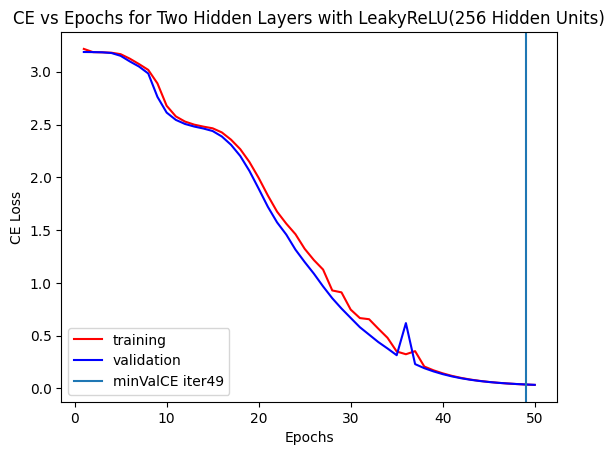

In [ ]:
CE_vs_EPOCHS(losses_train,losses_valid,epochs_n=50,title="CE vs Epochs for Two Hidden Layers with LeakyReLU(256 Hidden Units)")

 Train Accuracy: 0.9989545454545454
 Valid Accuracy: 0.9989073028592241
 Test Accuracy: 0.6469604015616286


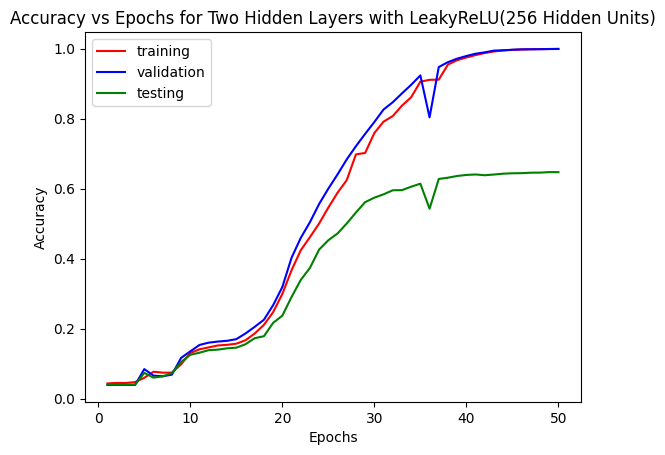

In [ ]:
ACCURACY_vs_EPOCHS(acc_train,acc_valid,acc_test,epochs_n=50,title="Accuracy vs Epochs for Two Hidden Layers with LeakyReLU(256 Hidden Units)")

### Sigmoid

In [ ]:
mlp2_sig = MLP(
    LinearLayer(28*28, HIDDEN_SIZE256),
    Sigmoid(),
    LinearLayer(HIDDEN_SIZE256, HIDDEN_SIZE256),
    Sigmoid(),
    LinearLayer(HIDDEN_SIZE256, 25),
    SoftmaxOutputLayer()
)

opt2_sig = GradientDescentOptimizer(mlp2_sig, lr=0.1)
mlp, losses_train, losses_valid, acc_train, acc_valid, acc_test = mlp2_sig.fit(opt2_sig, X_train_tr, y_train_tr, X_train_va, y_train_va,X_test,y_test, steps=260, batch_size=500)

  0%|          | 1/260 [00:52<3:44:58, 52.12s/it]

time 0: train loss 3.2091619384497903, train acc 0.044035658307210054, valid loss 3.183716912961327, valid acc 0.03933709706792934


  1%|          | 2/260 [01:44<3:44:28, 52.20s/it]

time 1: train loss 3.1823056685018827, train acc 0.04412656739811915, valid loss 3.1824926163870066, valid acc 0.03933709706792934


  1%|          | 3/260 [02:35<3:41:42, 51.76s/it]

time 2: train loss 3.181568411758142, train acc 0.04412656739811915, valid loss 3.1820495996389453, valid acc 0.03933709706792934


  2%|▏         | 4/260 [03:28<3:42:09, 52.07s/it]

time 3: train loss 3.181249548107952, train acc 0.04412656739811915, valid loss 3.181813731104931, valid acc 0.03933709706792934


  2%|▏         | 5/260 [04:20<3:41:11, 52.05s/it]

time 4: train loss 3.1810667532981824, train acc 0.04412656739811915, valid loss 3.1816625439296486, valid acc 0.03933709706792934


  2%|▏         | 6/260 [05:15<3:44:47, 53.10s/it]

time 5: train loss 3.180945504350578, train acc 0.04412656739811915, valid loss 3.1815540885720157, valid acc 0.03933709706792934


  3%|▎         | 7/260 [06:04<3:39:01, 51.94s/it]

time 6: train loss 3.1808573137752445, train acc 0.04412656739811915, valid loss 3.181470093676853, valid acc 0.03933709706792934


  3%|▎         | 8/260 [07:11<3:57:13, 56.48s/it]

time 7: train loss 3.18078888142788, train acc 0.04412656739811915, valid loss 3.181401309892016, valid acc 0.03933709706792934


  3%|▎         | 9/260 [08:03<3:50:54, 55.20s/it]

time 8: train loss 3.1807331388908366, train acc 0.04412656739811915, valid loss 3.1813425357678935, valid acc 0.03933709706792934


  4%|▍         | 10/260 [08:54<3:44:31, 53.88s/it]

time 9: train loss 3.1806859645738856, train acc 0.04412656739811915, valid loss 3.1812906046346723, valid acc 0.03933709706792934


  4%|▍         | 11/260 [09:45<3:39:37, 52.92s/it]

time 10: train loss 3.1806447779030496, train acc 0.04412656739811915, valid loss 3.181243461976405, valid acc 0.03933709706792934


  5%|▍         | 12/260 [10:36<3:36:35, 52.40s/it]

time 11: train loss 3.180607867049593, train acc 0.04412656739811915, valid loss 3.1811997012199074, valid acc 0.03933709706792934


  5%|▌         | 13/260 [11:26<3:33:24, 51.84s/it]

time 12: train loss 3.180574039088348, train acc 0.04412656739811915, valid loss 3.1811583124273257, valid acc 0.03933709706792934


  5%|▌         | 14/260 [12:17<3:31:10, 51.51s/it]

time 13: train loss 3.1805424253100285, train acc 0.04412656739811915, valid loss 3.181118537896075, valid acc 0.03933709706792934


  6%|▌         | 15/260 [13:06<3:27:32, 50.83s/it]

time 14: train loss 3.1805123667312056, train acc 0.04412656739811915, valid loss 3.1810797849183476, valid acc 0.03933709706792934


  6%|▌         | 16/260 [14:00<3:29:40, 51.56s/it]

time 15: train loss 3.1804833435282887, train acc 0.04412656739811915, valid loss 3.181041570710768, valid acc 0.03933709706792934


  7%|▋         | 17/260 [14:51<3:28:28, 51.47s/it]

time 16: train loss 3.180454929698916, train acc 0.04412656739811915, valid loss 3.1810034862300425, valid acc 0.03933709706792934


  7%|▋         | 18/260 [15:40<3:24:26, 50.69s/it]

time 17: train loss 3.180426762789629, train acc 0.04412656739811915, valid loss 3.1809651714632454, valid acc 0.03933709706792934


  7%|▋         | 19/260 [16:31<3:24:12, 50.84s/it]

time 18: train loss 3.180398522909914, train acc 0.04412656739811915, valid loss 3.180926297878948, valid acc 0.03933709706792934


  8%|▊         | 20/260 [17:23<3:24:16, 51.07s/it]

time 19: train loss 3.1803699176096187, train acc 0.04412656739811915, valid loss 3.18088655543016, valid acc 0.03933709706792934


  8%|▊         | 21/260 [18:12<3:22:02, 50.72s/it]

time 20: train loss 3.1803406705158266, train acc 0.04412656739811915, valid loss 3.180845642472227, valid acc 0.03933709706792934


  8%|▊         | 22/260 [19:06<3:24:30, 51.56s/it]

time 21: train loss 3.1803105123886137, train acc 0.04412656739811915, valid loss 3.1808032575298237, valid acc 0.03933709706792934


  9%|▉         | 23/260 [19:58<3:24:29, 51.77s/it]

time 22: train loss 3.1802791737086866, train acc 0.04412656739811915, valid loss 3.180759092189783, valid acc 0.03933709706792934


  9%|▉         | 24/260 [20:48<3:21:34, 51.25s/it]

time 23: train loss 3.1802463781843056, train acc 0.04426293103448278, valid loss 3.1807128246044183, valid acc 0.03933709706792934


 10%|▉         | 25/260 [21:40<3:21:09, 51.36s/it]

time 24: train loss 3.180211836732137, train acc 0.044808385579937327, valid loss 3.1806641132153457, valid acc 0.03933709706792934


 10%|█         | 26/260 [22:31<3:19:44, 51.21s/it]

time 25: train loss 3.1801752415867237, train acc 0.044808385579937327, valid loss 3.180612590380256, valid acc 0.03933709706792934


 10%|█         | 27/260 [23:21<3:18:09, 51.03s/it]

time 26: train loss 3.1801362602496623, train acc 0.044762931034482784, valid loss 3.180557855621486, valid acc 0.03933709706792934


 11%|█         | 28/260 [24:13<3:17:42, 51.13s/it]

time 27: train loss 3.1800945290150935, train acc 0.044762931034482784, valid loss 3.1804994682253267, valid acc 0.03933709706792934


 11%|█         | 29/260 [25:05<3:18:16, 51.50s/it]

time 28: train loss 3.180049645810396, train acc 0.044762931034482784, valid loss 3.1804369389092892, valid acc 0.03933709706792934


 12%|█▏        | 30/260 [25:54<3:14:34, 50.76s/it]

time 29: train loss 3.180001162072991, train acc 0.044762931034482784, valid loss 3.1803697202430037, valid acc 0.03933709706792934


 12%|█▏        | 31/260 [26:45<3:13:50, 50.79s/it]

time 30: train loss 3.179948573346796, train acc 0.044762931034482784, valid loss 3.1802971954558927, valid acc 0.03933709706792934


 12%|█▏        | 32/260 [27:37<3:14:05, 51.08s/it]

time 31: train loss 3.179891308223277, train acc 0.04485384012539187, valid loss 3.1802186651883284, valid acc 0.03933709706792934


 13%|█▎        | 33/260 [28:27<3:12:14, 50.81s/it]

time 32: train loss 3.179828715168082, train acc 0.044990203761755505, valid loss 3.1801333316367737, valid acc 0.03933709706792934


 13%|█▎        | 34/260 [29:17<3:10:47, 50.65s/it]

time 33: train loss 3.179760046658322, train acc 0.044990203761755505, valid loss 3.180040279398733, valid acc 0.03933709706792934


 13%|█▎        | 35/260 [30:09<3:11:06, 50.96s/it]

time 34: train loss 3.179684439897413, train acc 0.044490203761755505, valid loss 3.1799384521270855, valid acc 0.03933709706792934


 14%|█▍        | 36/260 [30:59<3:09:27, 50.75s/it]

time 35: train loss 3.179600893158827, train acc 0.0445811128526646, valid loss 3.1798266238365165, valid acc 0.03933709706792934


 14%|█▍        | 37/260 [31:48<3:06:45, 50.25s/it]

time 36: train loss 3.1795082365151894, train acc 0.044535658307210055, valid loss 3.1797033633394696, valid acc 0.03933709706792934


 15%|█▍        | 38/260 [32:40<3:07:49, 50.76s/it]

time 37: train loss 3.179405095302482, train acc 0.04439929467084642, valid loss 3.1795669897844636, valid acc 0.03933709706792934


 15%|█▌        | 39/260 [33:34<3:10:22, 51.68s/it]

time 38: train loss 3.17928984410253, train acc 0.04421747648902823, valid loss 3.179415516564847, valid acc 0.03933709706792934


 15%|█▌        | 40/260 [34:26<3:09:51, 51.78s/it]

time 39: train loss 3.179160548228606, train acc 0.044308385579937326, valid loss 3.1792465798697602, valid acc 0.04006556182844655


 16%|█▌        | 41/260 [35:16<3:07:00, 51.24s/it]

time 40: train loss 3.1790148885594305, train acc 0.04439929467084642, valid loss 3.1790573467214873, valid acc 0.042615188490256785


 16%|█▌        | 42/260 [36:10<3:08:56, 52.00s/it]

time 41: train loss 3.1788500639177033, train acc 0.044308385579937326, valid loss 3.178844395268739, valid acc 0.045893279912584226


 17%|█▋        | 43/260 [37:00<3:05:36, 51.32s/it]

time 42: train loss 3.1786626627671466, train acc 0.04449373040752353, valid loss 3.1786035570442404, valid acc 0.04880713895465307


 17%|█▋        | 44/260 [37:51<3:05:13, 51.45s/it]

time 43: train loss 3.1784484923890997, train acc 0.04449373040752353, valid loss 3.178329706306146, valid acc 0.0509925332362047


 17%|█▋        | 45/260 [38:45<3:07:05, 52.21s/it]

time 44: train loss 3.1782023482218276, train acc 0.04490634796238247, valid loss 3.1780164745892603, valid acc 0.05336004370788563


 18%|█▊        | 46/260 [39:35<3:03:17, 51.39s/it]

time 45: train loss 3.177917697599345, train acc 0.04549725705329156, valid loss 3.1776558577505827, valid acc 0.05682025132034238


 18%|█▊        | 47/260 [40:25<3:00:50, 50.94s/it]

time 46: train loss 3.1775862388753566, train acc 0.04545180250783702, valid loss 3.1772376656933106, valid acc 0.058823529411764705


 18%|█▊        | 48/260 [41:16<3:00:21, 51.05s/it]

time 47: train loss 3.1771972757618654, train acc 0.04581543887147337, valid loss 3.1767487375100467, valid acc 0.058823529411764705


 19%|█▉        | 49/260 [42:06<2:58:18, 50.70s/it]

time 48: train loss 3.1767368123463835, train acc 0.0461336206896552, valid loss 3.1761717999988086, valid acc 0.059551994172281915


 19%|█▉        | 50/260 [42:57<2:58:10, 50.91s/it]

time 49: train loss 3.1761862175045548, train acc 0.04640987460815049, valid loss 3.1754837732812824, valid acc 0.059551994172281915


 20%|█▉        | 51/260 [43:49<2:58:43, 51.31s/it]

time 50: train loss 3.175520212355266, train acc 0.04649020376175551, valid loss 3.1746532026937877, valid acc 0.06046257512292843


 20%|██        | 52/260 [44:42<2:58:53, 51.60s/it]

time 51: train loss 3.1747037734413626, train acc 0.047395768025078396, valid loss 3.1736362856125173, valid acc 0.05918776179202331


 20%|██        | 53/260 [45:34<2:58:28, 51.73s/it]

time 52: train loss 3.173687270939345, train acc 0.048395768025078396, valid loss 3.1723706073225166, valid acc 0.058823529411764705


 21%|██        | 54/260 [46:25<2:57:24, 51.67s/it]

time 53: train loss 3.172398702186826, train acc 0.04948667711598749, valid loss 3.1707651173430587, valid acc 0.0586414132216354


 21%|██        | 55/260 [47:23<3:02:51, 53.52s/it]

time 54: train loss 3.17073114193804, train acc 0.05217554858934172, valid loss 3.1686839867393766, valid acc 0.057730832270988894


 22%|██▏       | 56/260 [48:27<3:12:17, 56.56s/it]

time 55: train loss 3.1685224745599316, train acc 0.05407758620689656, valid loss 3.1659208865730744, valid acc 0.05791294846111819


 22%|██▏       | 57/260 [49:19<3:07:17, 55.36s/it]

time 56: train loss 3.1655234749820305, train acc 0.056308385579937316, valid loss 3.162159872879422, valid acc 0.0586414132216354


 22%|██▏       | 58/260 [50:13<3:04:45, 54.88s/it]

time 57: train loss 3.1613513869439416, train acc 0.058301332288401266, valid loss 3.156923364492415, valid acc 0.05900564560189401


 23%|██▎       | 59/260 [51:05<3:00:25, 53.86s/it]

time 58: train loss 3.1554362709131314, train acc 0.05966849529780565, valid loss 3.1495281399590263, valid acc 0.060280458932799125


 23%|██▎       | 60/260 [51:57<2:57:45, 53.33s/it]

time 59: train loss 3.1470030692279, train acc 0.060766457680250796, valid loss 3.1391274182133957, valid acc 0.06301220178473867


 23%|██▎       | 61/260 [52:47<2:54:14, 52.53s/it]

time 60: train loss 3.1352071200188045, train acc 0.06250078369905958, valid loss 3.1249989062538965, valid acc 0.06428701511564378


 24%|██▍       | 62/260 [53:39<2:52:40, 52.32s/it]

time 61: train loss 3.1195744144196165, train acc 0.06632601880877743, valid loss 3.10715110693218, valid acc 0.06355855035512657


 24%|██▍       | 63/260 [54:30<2:50:40, 51.98s/it]

time 62: train loss 3.1006013410225477, train acc 0.0704659090909091, valid loss 3.086750841536955, valid acc 0.07011473319978145


 25%|██▍       | 64/260 [55:22<2:49:18, 51.83s/it]

time 63: train loss 3.0797673456318835, train acc 0.07449059561128528, valid loss 3.0655073603896095, valid acc 0.07466763795301402


 25%|██▌       | 65/260 [56:14<2:49:14, 52.07s/it]

time 64: train loss 3.0585581484716, train acc 0.07890321316614422, valid loss 3.044434871046149, valid acc 0.07940265889637589


 25%|██▌       | 66/260 [57:05<2:46:32, 51.51s/it]

time 65: train loss 3.037553773698028, train acc 0.08507797805642632, valid loss 3.0234837705024042, valid acc 0.08468402841012566


 26%|██▌       | 67/260 [57:56<2:45:48, 51.55s/it]

time 66: train loss 3.0165350724549738, train acc 0.09181583072100312, valid loss 3.0021553572279505, valid acc 0.08996539792387544


 26%|██▌       | 68/260 [58:45<2:42:27, 50.77s/it]

time 67: train loss 2.995109428885703, train acc 0.09735815047021944, valid loss 2.980141040572538, valid acc 0.08850846840284102


 27%|██▋       | 69/260 [59:38<2:43:56, 51.50s/it]

time 68: train loss 2.9731088093421913, train acc 0.10316575235109716, valid loss 2.957507152706557, valid acc 0.0956109998178838


 27%|██▋       | 70/260 [1:00:30<2:43:19, 51.57s/it]

time 69: train loss 2.950622093539309, train acc 0.10731622257053292, valid loss 2.934542744928591, valid acc 0.09706792933891822


 27%|██▋       | 71/260 [1:01:21<2:41:52, 51.39s/it]

time 70: train loss 2.927867893872218, train acc 0.11015203761755483, valid loss 2.9115688708791585, valid acc 0.1021671826625387


 28%|██▊       | 72/260 [1:02:14<2:42:37, 51.90s/it]

time 71: train loss 2.9050931828614037, train acc 0.11147374608150469, valid loss 2.8888643818053463, valid acc 0.10453469313421963


 28%|██▊       | 73/260 [1:03:07<2:42:41, 52.20s/it]

time 72: train loss 2.882535290033261, train acc 0.11288989028213164, valid loss 2.8666581462212735, valid acc 0.10763066836641777


 28%|██▊       | 74/260 [1:03:58<2:40:37, 51.82s/it]

time 73: train loss 2.860401126458371, train acc 0.11562774294670848, valid loss 2.845113687260681, valid acc 0.1096339464578401


 29%|██▉       | 75/260 [1:04:50<2:39:57, 51.88s/it]

time 74: train loss 2.838841809996413, train acc 0.1170368338557994, valid loss 2.8243172405557857, valid acc 0.1098160626479694


 29%|██▉       | 76/260 [1:05:42<2:39:26, 51.99s/it]

time 75: train loss 2.8179475153205704, train acc 0.11813479623824455, valid loss 2.80430189686285, valid acc 0.11200145692952103


 30%|██▉       | 77/260 [1:06:33<2:37:35, 51.67s/it]

time 76: train loss 2.7977810630705107, train acc 0.1188691222570533, valid loss 2.785102156256719, valid acc 0.11436896740120196


 30%|███       | 78/260 [1:07:24<2:36:04, 51.45s/it]

time 77: train loss 2.7784284965280053, train acc 0.11999137931034483, valid loss 2.7667972189418077, valid acc 0.11327627026042615


 30%|███       | 79/260 [1:08:18<2:37:01, 52.05s/it]

time 78: train loss 2.7600177229343874, train acc 0.11994945141065833, valid loss 2.7494993801731553, valid acc 0.11382261883081406


 31%|███       | 80/260 [1:09:09<2:35:44, 51.91s/it]

time 79: train loss 2.742678304397515, train acc 0.12102625391849536, valid loss 2.733292459909548, valid acc 0.11218357311965034


 31%|███       | 81/260 [1:10:01<2:34:33, 51.81s/it]

time 80: train loss 2.7264751708949757, train acc 0.12138636363636364, valid loss 2.718175967123484, valid acc 0.11254780549990895


 32%|███▏      | 82/260 [1:10:53<2:34:09, 51.97s/it]

time 81: train loss 2.7113720546136255, train acc 0.12361716300940442, valid loss 2.7040547441563016, valid acc 0.11564378073210708


 32%|███▏      | 83/260 [1:11:44<2:32:24, 51.67s/it]

time 82: train loss 2.6972401673865907, train acc 0.12426057993730404, valid loss 2.6907625521995597, valid acc 0.1172828264432708


 32%|███▏      | 84/260 [1:12:33<2:28:57, 50.78s/it]

time 83: train loss 2.683887558431796, train acc 0.1276418495297806, valid loss 2.6780893771075096, valid acc 0.11910398834456383


 33%|███▎      | 85/260 [1:13:24<2:28:11, 50.81s/it]

time 84: train loss 2.671083208830264, train acc 0.1294251567398119, valid loss 2.665795481708348, valid acc 0.11892187215443453


 33%|███▎      | 86/260 [1:14:15<2:27:59, 51.03s/it]

time 85: train loss 2.6585656964946356, train acc 0.13083072100313478, valid loss 2.653609700291217, valid acc 0.12056091786559825


 33%|███▎      | 87/260 [1:15:06<2:27:16, 51.08s/it]

time 86: train loss 2.6460364453779435, train acc 0.13368064263322885, valid loss 2.6412144851423833, valid acc 0.1236568930977964


 34%|███▍      | 88/260 [1:16:00<2:28:28, 51.79s/it]

time 87: train loss 2.633139960949811, train acc 0.1376912225705329, valid loss 2.6282202042000176, valid acc 0.12893826261154617


 34%|███▍      | 89/260 [1:16:52<2:28:16, 52.03s/it]

time 88: train loss 2.619433499080198, train acc 0.14050940438871473, valid loss 2.6141317843947722, valid acc 0.13640502640684757


 35%|███▍      | 90/260 [1:17:43<2:25:54, 51.50s/it]

time 89: train loss 2.6043510803037213, train acc 0.14633816614420064, valid loss 2.5983162508944786, valid acc 0.14314332544163177


 35%|███▌      | 91/260 [1:18:35<2:25:47, 51.76s/it]

time 90: train loss 2.5871761636302137, train acc 0.15257601880877747, valid loss 2.5799947796854954, valid acc 0.14951739209615736


 35%|███▌      | 92/260 [1:19:26<2:24:01, 51.44s/it]

time 91: train loss 2.5670582510251276, train acc 0.15891183385579943, valid loss 2.558309414508914, valid acc 0.15898743398288107


 36%|███▌      | 93/260 [1:20:20<2:25:17, 52.20s/it]

time 92: train loss 2.5431362314096244, train acc 0.16723354231974918, valid loss 2.5325315046323245, valid acc 0.17082498634128573


 36%|███▌      | 94/260 [1:21:10<2:23:08, 51.73s/it]

time 93: train loss 2.5148234498118662, train acc 0.17716731974921632, valid loss 2.5024129326732862, valid acc 0.18138772536878528


 37%|███▋      | 95/260 [1:22:02<2:22:17, 51.74s/it]

time 94: train loss 2.4821875239164677, train acc 0.18473746081504708, valid loss 2.468485566636002, valid acc 0.19140411582589692


 37%|███▋      | 96/260 [1:22:54<2:21:19, 51.70s/it]

time 95: train loss 2.4461634471636144, train acc 0.19319553291536049, valid loss 2.4320183853080297, valid acc 0.19796029867055182


 37%|███▋      | 97/260 [1:23:43<2:18:49, 51.10s/it]

time 96: train loss 2.408344542551546, train acc 0.20174451410658312, valid loss 2.3945945034682095, valid acc 0.20706610817701693


 38%|███▊      | 98/260 [1:24:34<2:17:53, 51.07s/it]

time 97: train loss 2.3704055664573125, train acc 0.20972727272727273, valid loss 2.3575870770668983, valid acc 0.21435075578218904


 38%|███▊      | 99/260 [1:25:26<2:17:46, 51.34s/it]

time 98: train loss 2.333583445849746, train acc 0.21600000000000008, valid loss 2.321909647790864, valid acc 0.22108905481697322


 38%|███▊      | 100/260 [1:26:22<2:20:34, 52.72s/it]

time 99: train loss 2.298574501143022, train acc 0.2240105799373041, valid loss 2.288086902871508, valid acc 0.2260061919504644


 39%|███▉      | 101/260 [1:27:12<2:16:49, 51.63s/it]

time 100: train loss 2.2657027461513377, train acc 0.22861206896551733, valid loss 2.256395860786748, valid acc 0.23146967765434348


 39%|███▉      | 102/260 [1:28:03<2:15:33, 51.48s/it]

time 101: train loss 2.2350890887772246, train acc 0.2339024294670847, valid loss 2.226950925283344, valid acc 0.23602258240757604


 40%|███▉      | 103/260 [1:28:55<2:15:21, 51.73s/it]

time 102: train loss 2.2067437586289302, train acc 0.239192789968652, valid loss 2.1997490376669613, valid acc 0.2400291385904207


 40%|████      | 104/260 [1:29:45<2:12:52, 51.11s/it]

time 103: train loss 2.180605406552236, train acc 0.243101880877743, valid loss 2.1747022254964596, valid acc 0.24531050810417046


 40%|████      | 105/260 [1:30:37<2:13:02, 51.50s/it]

time 104: train loss 2.1565533173897204, train acc 0.2479655172413793, valid loss 2.151658902078879, valid acc 0.2485885995264979


 41%|████      | 106/260 [1:31:28<2:11:53, 51.39s/it]

time 105: train loss 2.1344108039188177, train acc 0.25266144200626955, valid loss 2.130417539439871, valid acc 0.252230923329084


 41%|████      | 107/260 [1:32:20<2:11:36, 51.61s/it]

time 106: train loss 2.113955034533657, train acc 0.2572907523510972, valid loss 2.1107421528909938, valid acc 0.2545984338007649


 42%|████▏     | 108/260 [1:33:10<2:09:36, 51.16s/it]

time 107: train loss 2.094936333408405, train acc 0.26102507836990596, valid loss 2.092380858725029, valid acc 0.2566017118921872


 42%|████▏     | 109/260 [1:34:00<2:07:28, 50.65s/it]

time 108: train loss 2.0770989122047427, train acc 0.26511598746081505, valid loss 2.075082248398556, valid acc 0.2622473137861956


 42%|████▏     | 110/260 [1:34:53<2:08:19, 51.33s/it]

time 109: train loss 2.0601955770464695, train acc 0.2693538401253918, valid loss 2.058605897987829, valid acc 0.26588963758878165


 43%|████▎     | 111/260 [1:35:44<2:07:45, 51.44s/it]

time 110: train loss 2.0439947013451185, train acc 0.27254271159874616, valid loss 2.0427269479535326, valid acc 0.2695319613913677


 43%|████▎     | 112/260 [1:36:34<2:05:16, 50.78s/it]

time 111: train loss 2.0282813519090395, train acc 0.27673158307210033, valid loss 2.0272363348174327, valid acc 0.27390274995447095


 43%|████▎     | 113/260 [1:37:24<2:04:24, 50.78s/it]

time 112: train loss 2.012855019224791, train acc 0.2827386363636365, valid loss 2.011938020412116, valid acc 0.27936623565835


 44%|████▍     | 114/260 [1:38:17<2:05:05, 51.41s/it]

time 113: train loss 1.997525290146634, train acc 0.2877456896551724, valid loss 1.9966433225803895, valid acc 0.28610453469313424


 44%|████▍     | 115/260 [1:39:07<2:02:50, 50.83s/it]

time 114: train loss 1.9821045858756783, train acc 0.2925568181818181, valid loss 1.9811607200457961, valid acc 0.29102167182662536


 45%|████▍     | 116/260 [1:39:58<2:02:25, 51.01s/it]

time 115: train loss 1.9663947492407166, train acc 0.29968965517241364, valid loss 1.9652788794565854, valid acc 0.29703150610089235


 45%|████▌     | 117/260 [1:40:51<2:02:44, 51.50s/it]

time 116: train loss 1.950165812379854, train acc 0.306291144200627, valid loss 1.9487438909652735, valid acc 0.3037698051356766


 45%|████▌     | 118/260 [1:41:43<2:01:58, 51.54s/it]

time 117: train loss 1.9331318210137156, train acc 0.31244161442006263, valid loss 1.9312362044245919, valid acc 0.313057730832271


 46%|████▌     | 119/260 [1:42:34<2:01:15, 51.60s/it]

time 118: train loss 1.914931717100387, train acc 0.3205501567398119, valid loss 1.912354636499213, valid acc 0.32034237843744306


 46%|████▌     | 120/260 [1:43:25<1:59:58, 51.42s/it]

time 119: train loss 1.8951256606215034, train acc 0.32997335423197494, valid loss 1.8916256688273059, valid acc 0.3301766527044254


 47%|████▋     | 121/260 [1:44:16<1:58:49, 51.29s/it]

time 120: train loss 1.87323534901454, train acc 0.34172884012539195, valid loss 1.8685821684950432, valid acc 0.3429247860134766


 47%|████▋     | 122/260 [1:45:09<1:58:47, 51.65s/it]

time 121: train loss 1.8488808066942168, train acc 0.3535192006269592, valid loss 1.8429641189239887, valid acc 0.3574940812238208


 47%|████▋     | 123/260 [1:46:02<1:58:57, 52.10s/it]

time 122: train loss 1.8220353826475195, train acc 0.36676763322884015, valid loss 1.815004039517631, valid acc 0.36805682025132036


 48%|████▊     | 124/260 [1:46:56<1:59:32, 52.74s/it]

time 123: train loss 1.793260866064373, train acc 0.378599921630094, valid loss 1.7855474876649557, valid acc 0.37588781642688035


 48%|████▊     | 125/260 [1:47:48<1:58:05, 52.48s/it]

time 124: train loss 1.7636223432546627, train acc 0.38972257053291537, valid loss 1.7557412414215006, valid acc 0.3871790202148971


 48%|████▊     | 126/260 [1:48:41<1:57:15, 52.50s/it]

time 125: train loss 1.734220027449522, train acc 0.4011003134796238, valid loss 1.7265127889776708, valid acc 0.4004735020943362


 49%|████▉     | 127/260 [1:49:33<1:56:17, 52.46s/it]

time 126: train loss 1.705768469965593, train acc 0.4122997648902821, valid loss 1.6983522228872001, valid acc 0.4108541249317064


 49%|████▉     | 128/260 [1:50:28<1:57:09, 53.25s/it]

time 127: train loss 1.6785557395838888, train acc 0.421617946708464, valid loss 1.671433158209877, valid acc 0.41959570205791297


 50%|████▉     | 129/260 [1:51:22<1:56:31, 53.37s/it]

time 128: train loss 1.6526147321822828, train acc 0.43145728840125397, valid loss 1.645770243558199, valid acc 0.4287015115643781


 50%|█████     | 130/260 [1:52:12<1:53:49, 52.54s/it]

time 129: train loss 1.6278607471519189, train acc 0.4407441222570535, valid loss 1.6212872891581211, valid acc 0.43744308869058457


 50%|█████     | 131/260 [1:53:08<1:54:48, 53.40s/it]

time 130: train loss 1.6041513863510142, train acc 0.4513420846394986, valid loss 1.5978451759381809, valid acc 0.446731014387179


 51%|█████     | 132/260 [1:54:01<1:53:41, 53.29s/it]

time 131: train loss 1.581318618287984, train acc 0.45944710031347963, valid loss 1.5752770644437848, valid acc 0.45565470770351485


 51%|█████     | 133/260 [1:54:52<1:51:46, 52.81s/it]

time 132: train loss 1.5591981283537757, train acc 0.46759051724137934, valid loss 1.5534214836580715, valid acc 0.4649426334001093


 52%|█████▏    | 134/260 [1:55:45<1:51:04, 52.89s/it]

time 133: train loss 1.5376481102143806, train acc 0.4764576802507836, valid loss 1.5321397591093695, valid acc 0.4745947914769623


 52%|█████▏    | 135/260 [1:56:39<1:50:38, 53.10s/it]

time 134: train loss 1.516555728400707, train acc 0.4838808777429467, valid loss 1.5113216218088052, valid acc 0.4811509743216172


 52%|█████▏    | 136/260 [1:57:32<1:49:48, 53.14s/it]

time 135: train loss 1.4958364785419953, train acc 0.4913354231974923, valid loss 1.4908844368868988, valid acc 0.48661446002549624


 53%|█████▎    | 137/260 [1:58:25<1:48:30, 52.93s/it]

time 136: train loss 1.4754299146409708, train acc 0.4975697492163011, valid loss 1.4707689275961062, valid acc 0.4966308504826079


 53%|█████▎    | 138/260 [1:59:20<1:49:04, 53.64s/it]

time 137: train loss 1.4552935822963737, train acc 0.5067237460815046, valid loss 1.4509335682520754, valid acc 0.505736659989073


 53%|█████▎    | 139/260 [2:00:12<1:47:21, 53.24s/it]

time 138: train loss 1.4353971753168628, train acc 0.5141645768025076, valid loss 1.4313497485201534, valid acc 0.5152067018757968


 54%|█████▍    | 140/260 [2:01:04<1:45:25, 52.71s/it]

time 139: train loss 1.4157185090384115, train acc 0.5212872257053293, valid loss 1.4119980661769826, valid acc 0.5259515570934256


 54%|█████▍    | 141/260 [2:01:58<1:45:29, 53.19s/it]

time 140: train loss 1.3962407054791335, train acc 0.5298957680250784, valid loss 1.392864559625015, valid acc 0.5336004370788563


 55%|█████▍    | 142/260 [2:02:51<1:44:38, 53.21s/it]

time 141: train loss 1.376949692674291, train acc 0.5395462382445141, valid loss 1.373937688831579, valid acc 0.5408850846840284


 55%|█████▌    | 143/260 [2:03:44<1:43:21, 53.00s/it]

time 142: train loss 1.3578330688231255, train acc 0.5454239811912226, valid loss 1.355207791958908, valid acc 0.545437989437261


 55%|█████▌    | 144/260 [2:04:36<1:41:50, 52.68s/it]

time 143: train loss 1.3388805250326614, train acc 0.5534870689655172, valid loss 1.3366674610895086, valid acc 0.5530868694226917


 56%|█████▌    | 145/260 [2:05:32<1:42:52, 53.68s/it]

time 144: train loss 1.3200839540356457, train acc 0.5610431034482759, valid loss 1.3183105599462641, valid acc 0.5605536332179931


 56%|█████▌    | 146/260 [2:06:25<1:41:46, 53.57s/it]

time 145: train loss 1.3014366337167356, train acc 0.5660082288401254, valid loss 1.3001306776431965, valid acc 0.56656346749226


 57%|█████▋    | 147/260 [2:07:19<1:41:15, 53.77s/it]

time 146: train loss 1.2829326692096954, train acc 0.5712425548589339, valid loss 1.2821206080219612, valid acc 0.5729375341467856


 57%|█████▋    | 148/260 [2:08:11<1:39:24, 53.25s/it]

time 147: train loss 1.2645671159396286, train acc 0.5767637147335423, valid loss 1.2642726860976052, valid acc 0.5774904389000182


 57%|█████▋    | 149/260 [2:09:05<1:38:27, 53.22s/it]

time 148: train loss 1.2463362014686863, train acc 0.583414184952978, valid loss 1.2465792588914233, valid acc 0.5829539246038973


 58%|█████▊    | 150/260 [2:09:57<1:37:06, 52.97s/it]

time 149: train loss 1.2282372876767114, train acc 0.5898722570532916, valid loss 1.2290330626558255, valid acc 0.5875068293571298


 58%|█████▊    | 151/260 [2:10:49<1:35:28, 52.56s/it]

time 150: train loss 1.2102685837375173, train acc 0.5969318181818182, valid loss 1.211627455745792, valid acc 0.5933345474412676


 58%|█████▊    | 152/260 [2:11:42<1:34:56, 52.75s/it]

time 151: train loss 1.1924286871435041, train acc 0.6013898902821316, valid loss 1.194356424982779, valid acc 0.596066290293207


 59%|█████▉    | 153/260 [2:12:34<1:33:42, 52.55s/it]

time 152: train loss 1.1747160659548737, train acc 0.6066626175548591, valid loss 1.1772143826360786, valid acc 0.6031688217082498


 59%|█████▉    | 154/260 [2:13:25<1:31:54, 52.03s/it]

time 153: train loss 1.157128665723143, train acc 0.6134737460815048, valid loss 1.1601959148526888, valid acc 0.6100892369331633


 60%|█████▉    | 155/260 [2:14:17<1:31:03, 52.03s/it]

time 154: train loss 1.139663793452892, train acc 0.6203444357366771, valid loss 1.1432956445164812, valid acc 0.6153706064469131


 60%|██████    | 156/260 [2:15:08<1:29:49, 51.82s/it]

time 155: train loss 1.1223182700145486, train acc 0.6271802507836991, valid loss 1.1265082408916958, valid acc 0.6199235112001457


 60%|██████    | 157/260 [2:16:00<1:28:55, 51.80s/it]

time 156: train loss 1.1050886904563102, train acc 0.6338236677115988, valid loss 1.1098284911853746, valid acc 0.6253869969040248


 61%|██████    | 158/260 [2:16:52<1:28:17, 51.93s/it]

time 157: train loss 1.0879716133868127, train acc 0.6397958463949844, valid loss 1.0932513348211403, valid acc 0.6317610635585503


 61%|██████    | 159/260 [2:17:45<1:27:47, 52.15s/it]

time 158: train loss 1.070963604443789, train acc 0.6475826802507839, valid loss 1.0767718247151572, valid acc 0.6397741759242397


 62%|██████▏   | 160/260 [2:18:37<1:27:07, 52.27s/it]

time 159: train loss 1.0540611986541277, train acc 0.6531422413793103, valid loss 1.0603850609881704, valid acc 0.6459661263886359


 62%|██████▏   | 161/260 [2:19:30<1:26:26, 52.39s/it]

time 160: train loss 1.0372609596364324, train acc 0.6597786050156741, valid loss 1.0440862148138095, valid acc 0.653250773993808


 62%|██████▏   | 162/260 [2:20:23<1:26:03, 52.69s/it]

time 161: train loss 1.0205598539016916, train acc 0.6662578369905957, valid loss 1.027870805238145, valid acc 0.6601711892187215


 63%|██████▎   | 163/260 [2:21:16<1:25:10, 52.69s/it]

time 162: train loss 1.0039560060445942, train acc 0.6727719435736678, valid loss 1.0117352970474662, valid acc 0.6659989073028593


 63%|██████▎   | 164/260 [2:22:08<1:24:08, 52.59s/it]

time 163: train loss 0.9874494408871338, train acc 0.6785517241379311, valid loss 0.9956777024829483, valid acc 0.6703696958659625


 63%|██████▎   | 165/260 [2:23:01<1:23:08, 52.51s/it]

time 164: train loss 0.9710420280950327, train acc 0.684198667711599, valid loss 0.9796975683116808, valid acc 0.6782006920415224


 64%|██████▍   | 166/260 [2:23:53<1:22:17, 52.53s/it]

time 165: train loss 0.9547363951990135, train acc 0.6893875391849531, valid loss 0.9637953380166764, valid acc 0.6832999453651429


 64%|██████▍   | 167/260 [2:24:46<1:21:37, 52.66s/it]

time 166: train loss 0.9385347779708781, train acc 0.6953526645768024, valid loss 0.9479718723476644, valid acc 0.6889455472591514


 65%|██████▍   | 168/260 [2:25:37<1:19:50, 52.07s/it]

time 167: train loss 0.9224388192114706, train acc 0.7016324451410659, valid loss 0.9322284624500525, valid acc 0.6936805682025132


 65%|██████▌   | 169/260 [2:26:31<1:20:06, 52.81s/it]

time 168: train loss 0.9064501445696268, train acc 0.7071394984326017, valid loss 0.916566974920874, valid acc 0.6991440539063922


 65%|██████▌   | 170/260 [2:27:21<1:17:48, 51.88s/it]

time 169: train loss 0.8905709636186351, train acc 0.7129192789968649, valid loss 0.9009898608983865, valid acc 0.70497177199053


 66%|██████▌   | 171/260 [2:28:13<1:17:09, 52.02s/it]

time 170: train loss 0.874804279927702, train acc 0.7173702978056427, valid loss 0.8855000962122291, valid acc 0.7077035148424695


 66%|██████▌   | 172/260 [2:29:08<1:17:25, 52.79s/it]

time 171: train loss 0.8591537581880245, train acc 0.7231990595611287, valid loss 0.8701012722321034, valid acc 0.7144418138772537


 67%|██████▋   | 173/260 [2:30:01<1:16:45, 52.93s/it]

time 172: train loss 0.8436235487096888, train acc 0.7294717868338558, valid loss 0.8547979371150247, valid acc 0.7217264614824258


 67%|██████▋   | 174/260 [2:30:53<1:15:07, 52.42s/it]

time 173: train loss 0.828218276068388, train acc 0.7360732758620688, valid loss 0.8395959410121374, valid acc 0.7288289928974686


 67%|██████▋   | 175/260 [2:31:44<1:13:55, 52.18s/it]

time 174: train loss 0.8129430745596455, train acc 0.7424894200626958, valid loss 0.8245023720129077, valid acc 0.7357494081223821


 68%|██████▊   | 176/260 [2:32:39<1:14:04, 52.91s/it]

time 175: train loss 0.7978034497063443, train acc 0.7491782915360503, valid loss 0.8095249940768648, valid acc 0.741759242396649


 68%|██████▊   | 177/260 [2:33:28<1:11:46, 51.89s/it]

time 176: train loss 0.7828049784174316, train acc 0.7566363636363639, valid loss 0.7946715307666965, valid acc 0.7486796576215625


 68%|██████▊   | 178/260 [2:34:18<1:10:11, 51.36s/it]

time 177: train loss 0.7679530419633253, train acc 0.7631398902821318, valid loss 0.7799491586950821, valid acc 0.7545073757057003


 69%|██████▉   | 179/260 [2:35:11<1:09:44, 51.66s/it]

time 178: train loss 0.7532527052896881, train acc 0.7698009404388714, valid loss 0.7653643001811212, valid acc 0.762156255691131


 69%|██████▉   | 180/260 [2:36:02<1:08:43, 51.54s/it]

time 179: train loss 0.7387087072040613, train acc 0.7756786833855798, valid loss 0.7509226221894042, valid acc 0.7681660899653979


 70%|██████▉   | 181/260 [2:36:53<1:07:39, 51.39s/it]

time 180: train loss 0.7243254889524345, train acc 0.7801927899686519, valid loss 0.7366291471219302, valid acc 0.7721726461482425


 70%|███████   | 182/260 [2:37:46<1:07:27, 51.89s/it]

time 181: train loss 0.7101072362658997, train acc 0.7848816614420066, valid loss 0.7224884257842674, valid acc 0.7789109451830267


 70%|███████   | 183/260 [2:38:39<1:07:02, 52.24s/it]

time 182: train loss 0.6960579402428971, train acc 0.790252351097179, valid loss 0.7085047199047869, valid acc 0.7830996175560008


 71%|███████   | 184/260 [2:39:31<1:06:07, 52.20s/it]

time 183: train loss 0.6821814591005536, train acc 0.7955286050156741, valid loss 0.694682123375223, valid acc 0.7885631032598798


 71%|███████   | 185/260 [2:40:24<1:05:18, 52.25s/it]

time 184: train loss 0.6684815359475988, train acc 0.80135736677116, valid loss 0.6810245809062668, valid acc 0.7931160080131123


 72%|███████▏  | 186/260 [2:41:16<1:04:34, 52.36s/it]

time 185: train loss 0.6549617485553159, train acc 0.8068224921630094, valid loss 0.6675358299459765, valid acc 0.7991258422873794


 72%|███████▏  | 187/260 [2:42:09<1:03:46, 52.42s/it]

time 186: train loss 0.6416254185401992, train acc 0.8115709247648908, valid loss 0.6542193325055309, valid acc 0.8056820251320342


 72%|███████▏  | 188/260 [2:42:59<1:02:13, 51.86s/it]

time 187: train loss 0.6284755336186839, train acc 0.8173961598746081, valid loss 0.6410782440602172, valid acc 0.8122382079766891


 73%|███████▎  | 189/260 [2:43:51<1:01:11, 51.71s/it]

time 188: train loss 0.6155147150766765, train acc 0.82253605015674, valid loss 0.6281154180532975, valid acc 0.8182480422509562


 73%|███████▎  | 190/260 [2:44:43<1:00:32, 51.90s/it]

time 189: train loss 0.6027452236848204, train acc 0.828403213166144, valid loss 0.6153334185910403, valid acc 0.8233472955745765


 73%|███████▎  | 191/260 [2:45:36<59:55, 52.11s/it]  

time 190: train loss 0.5901689794472208, train acc 0.8330956112852662, valid loss 0.6027345247232132, valid acc 0.8293571298488436


 74%|███████▍  | 192/260 [2:46:25<57:59, 51.17s/it]

time 191: train loss 0.5777875786272405, train acc 0.8380642633228839, valid loss 0.5903207298938854, valid acc 0.8337279184119468


 74%|███████▍  | 193/260 [2:47:18<58:00, 51.95s/it]

time 192: train loss 0.5656023048614129, train acc 0.8433440438871471, valid loss 0.5780937440104492, valid acc 0.8395556364960846


 75%|███████▍  | 194/260 [2:48:11<57:19, 52.12s/it]

time 193: train loss 0.5536141363814006, train acc 0.8484525862068965, valid loss 0.5660549975832305, valid acc 0.8442906574394463


 75%|███████▌  | 195/260 [2:49:00<55:36, 51.33s/it]

time 194: train loss 0.5418237522188415, train acc 0.8530960031347963, valid loss 0.5542056449161313, valid acc 0.848297213622291


 75%|███████▌  | 196/260 [2:49:53<55:09, 51.71s/it]

time 195: train loss 0.5302315421968313, train acc 0.8576869122257051, valid loss 0.5425465691742692, valid acc 0.8517574212347477


 76%|███████▌  | 197/260 [2:50:47<54:57, 52.34s/it]

time 196: train loss 0.5188376262662259, train acc 0.8615995297805643, valid loss 0.5310783966336587, valid acc 0.8564924421781096


 76%|███████▌  | 198/260 [2:51:39<54:00, 52.27s/it]

time 197: train loss 0.5076418858470929, train acc 0.8657429467084641, valid loss 0.5198015257350814, valid acc 0.8614095793116008


 77%|███████▋  | 199/260 [2:52:31<52:58, 52.11s/it]

time 198: train loss 0.49664400584669255, train acc 0.8694702194357369, valid loss 0.5087161721563173, valid acc 0.8661446002549626


 77%|███████▋  | 200/260 [2:53:24<52:32, 52.54s/it]

time 199: train loss 0.4858435240322958, train acc 0.8732080721003137, valid loss 0.49782242761475015, valid acc 0.8708796211983245


 77%|███████▋  | 201/260 [2:54:15<51:16, 52.14s/it]

time 200: train loss 0.4752398841882565, train acc 0.8778025078369904, valid loss 0.48712032765796626, valid acc 0.874157712620652


 78%|███████▊  | 202/260 [2:55:08<50:30, 52.25s/it]

time 201: train loss 0.4648324891596874, train acc 0.8819913793103447, valid loss 0.4766099213232092, valid acc 0.8783463849936259


 78%|███████▊  | 203/260 [2:55:58<49:01, 51.60s/it]

time 202: train loss 0.4546207487856156, train acc 0.8860438871473355, valid loss 0.4662913332857421, valid acc 0.8836277545073757


 78%|███████▊  | 204/260 [2:56:51<48:34, 52.05s/it]

time 203: train loss 0.44460411657858995, train acc 0.8904075235109722, valid loss 0.4561648078978831, valid acc 0.8876343106902204


 79%|███████▉  | 205/260 [2:57:42<47:30, 51.83s/it]

time 204: train loss 0.4347821089654561, train acc 0.8941347962382445, valid loss 0.44623072550142034, valid acc 0.8929156802039702


 79%|███████▉  | 206/260 [2:58:33<46:15, 51.39s/it]

time 205: train loss 0.4251543028082766, train acc 0.8976908307210031, valid loss 0.4364895854313471, valid acc 0.8958295392460389


 80%|███████▉  | 207/260 [2:59:29<46:34, 52.73s/it]

time 206: train loss 0.41572031080259675, train acc 0.9007852664576803, valid loss 0.4269419566909862, valid acc 0.9002003278091423


 80%|████████  | 208/260 [3:00:22<45:54, 52.97s/it]

time 207: train loss 0.4064797388522534, train acc 0.9038797021943572, valid loss 0.41758840347173143, valid acc 0.9023857220906939


 80%|████████  | 209/260 [3:01:15<44:54, 52.84s/it]

time 208: train loss 0.3974321321610329, train acc 0.9073902821316615, valid loss 0.4084293946862518, valid acc 0.9047532325623748


 81%|████████  | 210/260 [3:02:06<43:37, 52.35s/it]

time 209: train loss 0.38857691582030224, train acc 0.9103518808777431, valid loss 0.39946520363404553, valid acc 0.9078492077945729


 81%|████████  | 211/260 [3:03:01<43:17, 53.01s/it]

time 210: train loss 0.37991333221347223, train acc 0.9134952978056425, valid loss 0.39069579995322634, valid acc 0.9111272992169004


 82%|████████▏ | 212/260 [3:03:53<42:10, 52.73s/it]

time 211: train loss 0.3714403752265406, train acc 0.9164988244514106, valid loss 0.38212073690923914, valid acc 0.9144053906392279


 82%|████████▏ | 213/260 [3:04:43<40:42, 51.97s/it]

time 212: train loss 0.3631567231775405, train acc 0.9202715517241379, valid loss 0.37373904450156437, valid acc 0.9173192496812966


 82%|████████▏ | 214/260 [3:05:37<40:15, 52.52s/it]

time 213: train loss 0.35506067819720105, train acc 0.9238240595611287, valid loss 0.36554914793181564, valid acc 0.9211436896740121


 83%|████████▎ | 215/260 [3:06:28<39:13, 52.29s/it]

time 214: train loss 0.3471501253062558, train acc 0.927103840125392, valid loss 0.35754883346830485, valid acc 0.9247860134765981


 83%|████████▎ | 216/260 [3:07:21<38:26, 52.43s/it]

time 215: train loss 0.33942252446374943, train acc 0.9308346394984327, valid loss 0.34973527494544465, valid acc 0.9282462210890549


 83%|████████▎ | 217/260 [3:08:12<37:14, 51.97s/it]

time 216: train loss 0.3318749415741244, train acc 0.9334745297805646, valid loss 0.34210511747091754, valid acc 0.9324348934620288


 84%|████████▍ | 218/260 [3:09:05<36:37, 52.32s/it]

time 217: train loss 0.32450411339670276, train acc 0.9361563479623825, valid loss 0.33465459960541954, valid acc 0.934984520123839


 84%|████████▍ | 219/260 [3:09:57<35:39, 52.19s/it]

time 218: train loss 0.317306532735177, train acc 0.9384290752351098, valid loss 0.32737968894114405, valid acc 0.9380804953560371


 85%|████████▍ | 220/260 [3:10:50<34:58, 52.46s/it]

time 219: train loss 0.3102785380990893, train acc 0.941296238244514, valid loss 0.32027620951569985, valid acc 0.9411764705882353


 85%|████████▌ | 221/260 [3:11:43<34:15, 52.71s/it]

time 220: train loss 0.30341639547082516, train acc 0.9442123824451412, valid loss 0.31333994826196016, valid acc 0.9431797486796576


 85%|████████▌ | 222/260 [3:12:36<33:20, 52.64s/it]

time 221: train loss 0.2967163653312948, train acc 0.9469886363636367, valid loss 0.30656673624851827, valid acc 0.9448187943908214


 86%|████████▌ | 223/260 [3:13:30<32:43, 53.07s/it]

time 222: train loss 0.29017475252991165, train acc 0.9489012539184954, valid loss 0.2999525056903259, valid acc 0.9466399562921144


 86%|████████▌ | 224/260 [3:14:21<31:26, 52.41s/it]

time 223: train loss 0.2837879387890077, train acc 0.9509083072100314, valid loss 0.29349332528535993, valid acc 0.9490074667637953


 87%|████████▋ | 225/260 [3:15:14<30:45, 52.73s/it]

time 224: train loss 0.27755239828607586, train acc 0.953548197492163, valid loss 0.28718541589148294, valid acc 0.9521034419959934


 87%|████████▋ | 226/260 [3:16:07<29:48, 52.59s/it]

time 225: train loss 0.27146469731909817, train acc 0.9559572884012539, valid loss 0.2810251481060621, valid acc 0.9544709524676743


 87%|████████▋ | 227/260 [3:16:58<28:41, 52.16s/it]

time 226: train loss 0.26552148063805886, train acc 0.958055250783699, valid loss 0.2750090245599705, valid acc 0.9566563467492261


 88%|████████▊ | 228/260 [3:17:49<27:40, 51.89s/it]

time 227: train loss 0.2597194495062347, train acc 0.9599643416927898, valid loss 0.2691336525041335, valid acc 0.9581132762702604


 88%|████████▊ | 229/260 [3:18:42<27:03, 52.38s/it]

time 228: train loss 0.2540553385340801, train acc 0.9618699059561127, valid loss 0.2633957145207618, valid acc 0.9608450191222


 88%|████████▊ | 230/260 [3:19:36<26:21, 52.72s/it]

time 229: train loss 0.24852589818186352, train acc 0.9633279780564264, valid loss 0.2577919448078163, valid acc 0.9613913676925878


 89%|████████▉ | 231/260 [3:20:27<25:17, 52.32s/it]

time 230: train loss 0.2431278871915011, train acc 0.9647370689655174, valid loss 0.25231911531743306, valid acc 0.9619377162629758


 89%|████████▉ | 232/260 [3:21:21<24:35, 52.69s/it]

time 231: train loss 0.237858075412096, train acc 0.9656007053291534, valid loss 0.24697403199668447, valid acc 0.9637588781642688


 90%|████████▉ | 233/260 [3:22:13<23:37, 52.50s/it]

time 232: train loss 0.23271325444631438, train acc 0.9668804858934169, valid loss 0.24175353859415247, valid acc 0.9659442724458205


 90%|█████████ | 234/260 [3:23:04<22:31, 51.98s/it]

time 233: train loss 0.2276902523359907, train acc 0.9681077586206897, valid loss 0.2366545246841719, valid acc 0.9664906210162083


 90%|█████████ | 235/260 [3:23:56<21:40, 52.02s/it]

time 234: train loss 0.22278594892292228, train acc 0.9691112852664577, valid loss 0.2316739351300523, valid acc 0.9677654343471135


 91%|█████████ | 236/260 [3:24:50<21:00, 52.53s/it]

time 235: train loss 0.2179972896992871, train acc 0.9700693573667709, valid loss 0.22680877922018122, valid acc 0.9688581314878892


 91%|█████████ | 237/260 [3:25:41<20:01, 52.24s/it]

time 236: train loss 0.21332129713142142, train acc 0.9710728840125391, valid loss 0.2220561385709031, valid acc 0.9695865962484065


 92%|█████████▏| 238/260 [3:26:33<19:08, 52.20s/it]

time 237: train loss 0.20875507924321537, train acc 0.972212774294671, valid loss 0.21741317343124136, valid acc 0.970497177199053


 92%|█████████▏| 239/260 [3:27:27<18:25, 52.65s/it]

time 238: train loss 0.2042958356575159, train acc 0.9730344827586209, valid loss 0.21287712731011937, valid acc 0.9714077581496995


 92%|█████████▏| 240/260 [3:28:19<17:27, 52.35s/it]

time 239: train loss 0.19994086143323694, train acc 0.9739435736677116, valid loss 0.2084453299857471, valid acc 0.9730468038608633


 93%|█████████▎| 241/260 [3:29:10<16:30, 52.16s/it]

time 240: train loss 0.19568754902796306, train acc 0.9750344827586207, valid loss 0.20411519902506248, valid acc 0.9735931524312511


 93%|█████████▎| 242/260 [3:30:02<15:35, 51.96s/it]

time 241: train loss 0.1915333886464512, train acc 0.9759541536050158, valid loss 0.19988423997381835, valid acc 0.9750500819522856


 93%|█████████▎| 243/260 [3:30:55<14:47, 52.21s/it]

time 242: train loss 0.18747596715249226, train acc 0.9769647335423197, valid loss 0.1957500453874352, valid acc 0.9766891276634493


 94%|█████████▍| 244/260 [3:31:47<13:55, 52.23s/it]

time 243: train loss 0.18351296565150313, train acc 0.9779647335423198, valid loss 0.19171029286546107, valid acc 0.9779639409943544


 94%|█████████▍| 245/260 [3:32:39<13:03, 52.24s/it]

time 244: train loss 0.1796421558117636, train acc 0.9786920062695924, valid loss 0.18776274223743789, valid acc 0.9785102895647423


 95%|█████████▍| 246/260 [3:33:32<12:15, 52.50s/it]

time 245: train loss 0.17586139499661904, train acc 0.9799228056426336, valid loss 0.18390523203746417, valid acc 0.9794208705153888


 95%|█████████▌| 247/260 [3:34:26<11:26, 52.80s/it]

time 246: train loss 0.1721686203335924, train acc 0.98083894984326, valid loss 0.18013567540930434, valid acc 0.9796029867055182


 95%|█████████▌| 248/260 [3:35:17<10:27, 52.33s/it]

time 247: train loss 0.16856184194067156, train acc 0.9820242946708461, valid loss 0.1764520556055931, valid acc 0.9799672190857768


 96%|█████████▌| 249/260 [3:36:10<09:37, 52.53s/it]

time 248: train loss 0.16503913563991854, train acc 0.9826606583072098, valid loss 0.17285242127304706, valid acc 0.9803314514660353


 96%|█████████▌| 250/260 [3:37:04<08:49, 52.92s/it]

time 249: train loss 0.16159863557725532, train acc 0.9832970219435736, valid loss 0.16933488173036965, valid acc 0.9810599162265525


 97%|█████████▋| 251/260 [3:37:57<07:56, 52.89s/it]

time 250: train loss 0.1582385271997292, train acc 0.9842061128526643, valid loss 0.16589760242776302, valid acc 0.9825168457475869


 97%|█████████▋| 252/260 [3:38:49<07:01, 52.70s/it]

time 251: train loss 0.1549570410009549, train acc 0.9845697492163005, valid loss 0.16253880072571658, valid acc 0.9834274266982335


 97%|█████████▋| 253/260 [3:39:41<06:07, 52.53s/it]

time 252: train loss 0.15175244734522214, train acc 0.9852970219435732, valid loss 0.15925674207731902, valid acc 0.9839737752686214


 98%|█████████▊| 254/260 [3:40:35<05:17, 52.90s/it]

time 253: train loss 0.14862305256448216, train acc 0.9859788401253913, valid loss 0.15604973670514075, valid acc 0.9850664724093972


 98%|█████████▊| 255/260 [3:41:26<04:22, 52.48s/it]

time 254: train loss 0.1455671964472168, train acc 0.9867515673981185, valid loss 0.1529161369956278, valid acc 0.9854307047896558


 98%|█████████▊| 256/260 [3:42:17<03:27, 51.97s/it]

time 255: train loss 0.14258325124385063, train acc 0.9874823667711592, valid loss 0.14985433610275586, valid acc 0.9859770533600437


 99%|█████████▉| 257/260 [3:43:09<02:35, 51.87s/it]

time 256: train loss 0.13966962238674652, train acc 0.9880732758620685, valid loss 0.14686276855934327, valid acc 0.9863412857403023


 99%|█████████▉| 258/260 [3:44:02<01:44, 52.32s/it]

time 257: train loss 0.13682475117641152, train acc 0.9888005485893412, valid loss 0.14393991381271445, valid acc 0.9870697505008196


100%|█████████▉| 259/260 [3:44:52<00:51, 51.59s/it]

time 258: train loss 0.13404711957169438, train acc 0.9893076018808774, valid loss 0.1410843032414912, valid acc 0.9876160990712074


100%|██████████| 260/260 [3:45:43<00:00, 52.09s/it]

time 259: train loss 0.13133525679675825, train acc 0.9898530564263318, valid loss 0.13829453017245158, valid acc 0.9883445638317246


In [ ]:
mlp.check_gradient(X_train_tr, y_train_tr)

Weight gradient difference: [5.0030711299137605e-20, 4.989990914791329e-20, 5.0252264732590083e-20]
Biases gradient difference: [4.970329284149422e-17, 4.8812492227307874e-17, 5.130991305276052e-17]


([5.0030711299137605e-20, 4.989990914791329e-20, 5.0252264732590083e-20],
 [4.970329284149422e-17, 4.8812492227307874e-17, 5.130991305276052e-17])

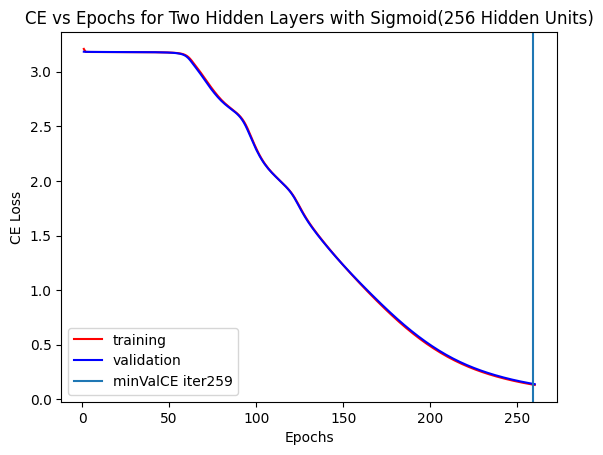

In [ ]:
CE_vs_EPOCHS(losses_train,losses_valid,epochs_n=260,title="CE vs Epochs for Two Hidden Layers with Sigmoid(256 Hidden Units)")

 Train Accuracy: 0.9898530564263318
 Valid Accuracy: 0.9883445638317246
 Test Accuracy: 0.6314835471277189


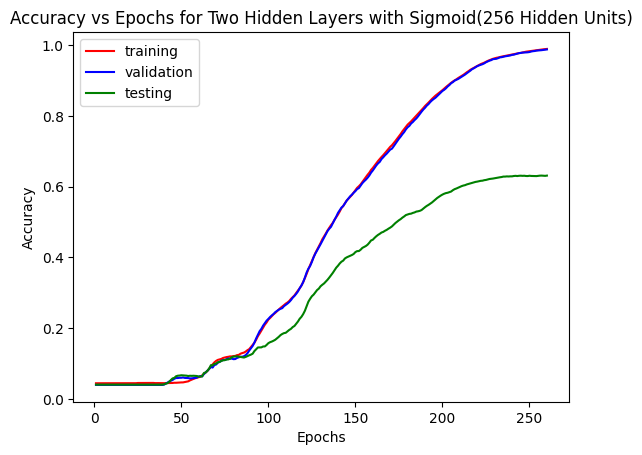

In [ ]:
ACCURACY_vs_EPOCHS(acc_train,acc_valid,acc_test,epochs_n=260,title="Accuracy vs Epochs for Two Hidden Layers with Sigmoid(256 Hidden Units)")

ReLU, Leaky ReLU, and Sigmoid activation functions all performs equally, since they all achieve a test accuracy of approximately 65%.

## 3.3: MLP with L2 Regularization

  2%|▏         | 1/50 [00:45<37:23, 45.78s/it]

time 0: train loss 3.206949090206102, train acc 0.04545532915360504, valid loss 3.185956924768245, valid acc 0.03933709706792934


  4%|▍         | 2/50 [01:39<40:33, 50.69s/it]

time 1: train loss 3.1840500995291694, train acc 0.046200235109717894, valid loss 3.1844728767163017, valid acc 0.03933709706792934


  6%|▌         | 3/50 [02:25<37:50, 48.31s/it]

time 2: train loss 3.1818970284312567, train acc 0.049361285266457694, valid loss 3.1803046480895847, valid acc 0.03788016754689492


  8%|▊         | 4/50 [03:11<36:31, 47.63s/it]

time 3: train loss 3.174208724334449, train acc 0.051690047021943596, valid loss 3.1662996952018934, valid acc 0.0508104170460754


 10%|█         | 5/50 [04:00<35:51, 47.81s/it]

time 4: train loss 3.1575413199179194, train acc 0.053753134796238264, valid loss 3.146200359960461, valid acc 0.0582771808413768


 12%|█▏        | 6/50 [04:45<34:32, 47.09s/it]

time 5: train loss 3.141737724798286, train acc 0.05583659874608153, valid loss 3.133347139580313, valid acc 0.06374066654525587


 14%|█▍        | 7/50 [05:31<33:20, 46.52s/it]

time 6: train loss 3.134920993400637, train acc 0.05819318181818183, valid loss 3.128681076037127, valid acc 0.0657439446366782


 16%|█▌        | 8/50 [06:17<32:38, 46.62s/it]

time 7: train loss 3.1326488570212745, train acc 0.061360893416927895, valid loss 3.124533361893507, valid acc 0.06665452558732471


 18%|█▊        | 9/50 [07:10<33:01, 48.32s/it]

time 8: train loss 3.129173147917846, train acc 0.06417241379310346, valid loss 3.1190252931933258, valid acc 0.06811145510835913


 20%|██        | 10/50 [07:57<31:56, 47.92s/it]

time 9: train loss 3.122245999809195, train acc 0.06558855799373042, valid loss 3.10472185653716, valid acc 0.06920415224913495


 22%|██▏       | 11/50 [08:42<30:42, 47.24s/it]

time 10: train loss 3.076384472295322, train acc 0.06986128526645768, valid loss 2.995877447063957, valid acc 0.10016390457111637


 24%|██▍       | 12/50 [09:29<29:45, 46.99s/it]

time 11: train loss 2.932897025126715, train acc 0.09037225705329154, valid loss 2.8497326333042396, valid acc 0.11400473502094337


 26%|██▌       | 13/50 [10:15<28:52, 46.84s/it]

time 12: train loss 2.8155478607260545, train acc 0.10476057993730409, valid loss 2.7652347446989842, valid acc 0.12948461118193408


 28%|██▊       | 14/50 [11:02<28:04, 46.80s/it]

time 13: train loss 2.7399068575334335, train acc 0.11635148902821317, valid loss 2.7040534685106214, valid acc 0.1327627026042615


 30%|███       | 15/50 [11:48<27:14, 46.71s/it]

time 14: train loss 2.679945029110767, train acc 0.12149843260188088, valid loss 2.647879443267244, valid acc 0.13094154070296848


 32%|███▏      | 16/50 [12:34<26:20, 46.49s/it]

time 15: train loss 2.6243886086297255, train acc 0.13019788401253915, valid loss 2.5901499996146833, valid acc 0.14004735020943362


 34%|███▍      | 17/50 [13:20<25:27, 46.28s/it]

time 16: train loss 2.5549501072690473, train acc 0.14909678683385585, valid loss 2.494139251864535, valid acc 0.1757421234747769


 36%|███▌      | 18/50 [14:10<25:19, 47.48s/it]

time 17: train loss 2.4191739801086407, train acc 0.19652782131661442, valid loss 2.2959937809415716, valid acc 0.22145328719723184


 38%|███▊      | 19/50 [14:58<24:34, 47.57s/it]

time 18: train loss 2.2075207724794623, train acc 0.2402029780564263, valid loss 2.1097494670324175, valid acc 0.2575122928428337


 40%|████      | 20/50 [15:46<23:47, 47.58s/it]

time 19: train loss 2.066420812916178, train acc 0.2728746081504702, valid loss 1.9952795534692198, valid acc 0.2857403023128756


 42%|████▏     | 21/50 [16:34<23:03, 47.70s/it]

time 20: train loss 1.981167464041966, train acc 0.2958154388714733, valid loss 1.8908398442399985, valid acc 0.3299945365142961


 44%|████▍     | 22/50 [17:25<22:47, 48.85s/it]

time 21: train loss 1.8900858583158995, train acc 0.326490987460815, valid loss 1.7783878117709033, valid acc 0.36386814787834637


 46%|████▌     | 23/50 [18:14<21:58, 48.83s/it]

time 22: train loss 1.7896173071481707, train acc 0.36059992163009413, valid loss 1.658548698165084, valid acc 0.39009287925696595


 48%|████▊     | 24/50 [19:02<21:00, 48.49s/it]

time 23: train loss 1.6839953643096714, train acc 0.39652351097178684, valid loss 1.5362112155427277, valid acc 0.43034055727554177


 50%|█████     | 25/50 [19:50<20:07, 48.29s/it]

time 24: train loss 1.573982849228826, train acc 0.43617163009404397, valid loss 1.413809852584975, valid acc 0.47368421052631576


 52%|█████▏    | 26/50 [20:36<19:03, 47.66s/it]

time 25: train loss 1.453091763574593, train acc 0.4828507053291535, valid loss 1.303266798924412, valid acc 0.5336004370788563


 54%|█████▍    | 27/50 [21:23<18:12, 47.52s/it]

time 26: train loss 1.31378312243971, train acc 0.5373303291536048, valid loss 1.146725825237138, valid acc 0.5898743398288108


 56%|█████▌    | 28/50 [22:10<17:24, 47.46s/it]

time 27: train loss 1.2063617346413444, train acc 0.5811532131661441, valid loss 1.0032131188718894, valid acc 0.659260608268075


 58%|█████▊    | 29/50 [22:56<16:24, 46.87s/it]

time 28: train loss 1.070601737625391, train acc 0.6337378526645767, valid loss 0.8880189111028589, valid acc 0.703150610089237


 60%|██████    | 30/50 [23:42<15:30, 46.53s/it]

time 29: train loss 0.9477746862085868, train acc 0.6815913009404388, valid loss 0.7858351410197678, valid acc 0.7355672919322528


 62%|██████▏   | 31/50 [24:30<14:54, 47.06s/it]

time 30: train loss 0.8549736820448793, train acc 0.7154937304075236, valid loss 0.6811295053072176, valid acc 0.7721726461482425


 64%|██████▍   | 32/50 [25:15<13:59, 46.62s/it]

time 31: train loss 0.6746978884505276, train acc 0.7773365987460814, valid loss 0.5808366625657784, valid acc 0.8153341832088873


 66%|██████▌   | 33/50 [26:01<13:06, 46.28s/it]

time 32: train loss 0.6996350074488803, train acc 0.7730956112852663, valid loss 0.5139167773884202, valid acc 0.8373702422145328


 68%|██████▊   | 34/50 [26:48<12:23, 46.44s/it]

time 33: train loss 0.48167080038169224, train acc 0.8497566614420063, valid loss 0.45041169816447546, valid acc 0.8584957202695319


 70%|███████   | 35/50 [27:37<11:48, 47.22s/it]

time 34: train loss 0.42614005874785243, train acc 0.8697985893416926, valid loss 0.44846947839535584, valid acc 0.8497541431433254


 72%|███████▏  | 36/50 [28:24<11:01, 47.23s/it]

time 35: train loss 0.4841898441360726, train acc 0.8614882445141068, valid loss 0.31121134655442356, valid acc 0.9091240211254781


 74%|███████▍  | 37/50 [29:10<10:08, 46.80s/it]

time 36: train loss 0.2904857631854849, train acc 0.9208836206896549, valid loss 0.25377834859558335, valid acc 0.9369877982152613


 76%|███████▌  | 38/50 [29:55<09:16, 46.36s/it]

time 37: train loss 0.24256096707554284, train acc 0.937876959247649, valid loss 0.20806315826597258, valid acc 0.9544709524676743


 78%|███████▊  | 39/50 [30:42<08:32, 46.55s/it]

time 38: train loss 0.19880297691117513, train acc 0.9543945924764891, valid loss 0.1729325060163675, valid acc 0.9637588781642688


 80%|████████  | 40/50 [31:29<07:45, 46.57s/it]

time 39: train loss 0.16349096294932655, train acc 0.965307210031348, valid loss 0.1442916085095415, valid acc 0.9748679657621563


 82%|████████▏ | 41/50 [32:15<06:57, 46.36s/it]

time 40: train loss 0.13485102134375684, train acc 0.9752758620689651, valid loss 0.1202864232234398, valid acc 0.9830631943179748


 84%|████████▍ | 42/50 [33:01<06:10, 46.34s/it]

time 41: train loss 0.1111230522477086, train acc 0.9826990595611285, valid loss 0.10058079577346023, valid acc 0.9894372609725005


 86%|████████▌ | 43/50 [33:46<05:22, 46.04s/it]

time 42: train loss 0.09239165031411067, train acc 0.9891152037617558, valid loss 0.08459168364779161, valid acc 0.9928974685849572


 88%|████████▊ | 44/50 [34:34<04:39, 46.60s/it]

time 43: train loss 0.07735496835829853, train acc 0.9925278213166139, valid loss 0.07179306090650654, valid acc 0.9952649790566381


 90%|█████████ | 45/50 [35:20<03:51, 46.28s/it]

time 44: train loss 0.06538440790269923, train acc 0.9945768025078365, valid loss 0.061545640510585184, valid acc 0.996357676197414


 92%|█████████▏| 46/50 [36:05<03:04, 46.02s/it]

time 45: train loss 0.05585600772831024, train acc 0.9963530564263317, valid loss 0.053282521500454, valid acc 0.9970861409579311


 94%|█████████▍| 47/50 [36:51<02:18, 46.11s/it]

time 46: train loss 0.048209895521227494, train acc 0.998360109717868, valid loss 0.04659137666664544, valid acc 0.9979967219085777


 96%|█████████▌| 48/50 [37:40<01:33, 46.95s/it]

time 47: train loss 0.042009998529982766, train acc 0.9990454545454543, valid loss 0.04108825127521901, valid acc 0.9987251866690949


 98%|█████████▊| 49/50 [38:26<00:46, 46.43s/it]

time 48: train loss 0.03695601892073289, train acc 0.999272727272727, valid loss 0.03649925578935471, valid acc 0.9990894190493534


100%|██████████| 50/50 [39:12<00:00, 47.06s/it]


time 49: train loss 0.03278101868103436, train acc 0.9994999999999998, valid loss 0.032688147648378706, valid acc 0.9992715352394828


  2%|▏         | 1/50 [00:45<37:04, 45.40s/it]

time 0: train loss 3.1955565102159293, train acc 0.04553565830721006, valid loss 3.186257150649427, valid acc 0.03933709706792934


  4%|▍         | 2/50 [01:31<36:26, 45.54s/it]

time 1: train loss 3.18418702458535, train acc 0.04571747648902824, valid loss 3.184784783927616, valid acc 0.03933709706792934


  6%|▌         | 3/50 [02:18<36:25, 46.49s/it]

time 2: train loss 3.1825152533922245, train acc 0.04662656739811915, valid loss 3.1821632823497104, valid acc 0.03933709706792934


  8%|▊         | 4/50 [03:03<35:10, 45.88s/it]

time 3: train loss 3.1765665034053012, train acc 0.047262931034482786, valid loss 3.16786399442202, valid acc 0.04807867419413586


 10%|█         | 5/50 [03:48<34:05, 45.46s/it]

time 4: train loss 3.1283876407096147, train acc 0.062175940438871494, valid loss 3.0442052847207153, valid acc 0.09032963030413403


 12%|█▏        | 6/50 [04:34<33:28, 45.64s/it]

time 5: train loss 2.9501571630365033, train acc 0.09794905956112852, valid loss 2.897328185756488, valid acc 0.09597523219814241


 14%|█▍        | 7/50 [05:20<32:50, 45.83s/it]

time 6: train loss 2.865506965695172, train acc 0.10004702194357368, valid loss 2.8456423900153145, valid acc 0.09743216171917683


 16%|█▌        | 8/50 [06:05<31:53, 45.55s/it]

time 7: train loss 2.82400706015563, train acc 0.09907484326018809, valid loss 2.8118406375436886, valid acc 0.09743216171917683


 18%|█▊        | 9/50 [06:51<31:10, 45.62s/it]

time 8: train loss 2.7941187512719536, train acc 0.10217985893416931, valid loss 2.7854035347310795, valid acc 0.09870697505008195


 20%|██        | 10/50 [07:37<30:27, 45.69s/it]

time 9: train loss 2.769768547866231, train acc 0.10353996865203764, valid loss 2.762403319456225, valid acc 0.10016390457111637


 22%|██▏       | 11/50 [08:23<29:53, 45.98s/it]

time 10: train loss 2.747369295694641, train acc 0.1067848746081505, valid loss 2.739683295800804, valid acc 0.10653797122564196


 24%|██▍       | 12/50 [09:10<29:14, 46.18s/it]

time 11: train loss 2.7245320327670814, train acc 0.11650901253918498, valid loss 2.7162637063578714, valid acc 0.12620651975960662


 26%|██▌       | 13/50 [09:56<28:28, 46.18s/it]

time 12: train loss 2.699584112587163, train acc 0.13832719435736676, valid loss 2.6855899326738015, valid acc 0.14350755782189037


 28%|██▊       | 14/50 [10:42<27:36, 46.01s/it]

time 13: train loss 2.6472573743871672, train acc 0.13515909090909098, valid loss 2.613512686881529, valid acc 0.13294481879439082


 30%|███       | 15/50 [11:28<26:58, 46.23s/it]

time 14: train loss 2.590914743789396, train acc 0.13688989028213164, valid loss 2.575955873623301, valid acc 0.14296120925150246


 32%|███▏      | 16/50 [12:15<26:17, 46.39s/it]

time 15: train loss 2.558709848111187, train acc 0.14422570532915366, valid loss 2.5482604104166207, valid acc 0.14423602258240759


 34%|███▍      | 17/50 [13:00<25:19, 46.05s/it]

time 16: train loss 2.528009379049925, train acc 0.15241457680250783, valid loss 2.5184037311962277, valid acc 0.15097432161719176


 36%|███▌      | 18/50 [13:47<24:41, 46.30s/it]

time 17: train loss 2.490966449200584, train acc 0.16218064263322884, valid loss 2.476891730750882, valid acc 0.1533418320888727


 38%|███▊      | 19/50 [14:32<23:44, 45.95s/it]

time 18: train loss 2.4198109818170757, train acc 0.18761833855799379, valid loss 2.364596082718598, valid acc 0.20050992533236206


 40%|████      | 20/50 [15:19<23:06, 46.20s/it]

time 19: train loss 2.2393757521860076, train acc 0.231269592476489, valid loss 2.1336517483236013, valid acc 0.2405754871608086


 42%|████▏     | 21/50 [16:06<22:28, 46.48s/it]

time 20: train loss 2.053791453756453, train acc 0.27445219435736684, valid loss 1.9803275476504336, valid acc 0.2919322527772719


 44%|████▍     | 22/50 [16:52<21:34, 46.25s/it]

time 21: train loss 1.9179565112126105, train acc 0.31787225705329153, valid loss 1.8428892980867209, valid acc 0.35494445456201057


 46%|████▌     | 23/50 [17:38<20:44, 46.11s/it]

time 22: train loss 1.793796682501606, train acc 0.3660583855799373, valid loss 1.7094705128967504, valid acc 0.409397195410672


 48%|████▊     | 24/50 [18:26<20:14, 46.70s/it]

time 23: train loss 1.6739868304764614, train acc 0.4175062695924765, valid loss 1.5911040980342375, valid acc 0.44654889819704974


 50%|█████     | 25/50 [19:12<19:19, 46.39s/it]

time 24: train loss 1.58117146313797, train acc 0.45236010971786855, valid loss 1.4683805397721135, valid acc 0.4966308504826079


 52%|█████▏    | 26/50 [19:57<18:26, 46.11s/it]

time 25: train loss 1.4530537238527967, train acc 0.4966720219435736, valid loss 1.3491478424982526, valid acc 0.5390639227827354


 54%|█████▍    | 27/50 [20:44<17:45, 46.33s/it]

time 26: train loss 1.3387650418534989, train acc 0.5421238244514106, valid loss 1.2755623411054582, valid acc 0.5590967036969586


 56%|█████▌    | 28/50 [21:31<17:04, 46.57s/it]

time 27: train loss 1.2303057673919755, train acc 0.5817190438871473, valid loss 1.1313164847473154, valid acc 0.6184665816791113


 58%|█████▊    | 29/50 [22:16<16:09, 46.16s/it]

time 28: train loss 1.1365078299266271, train acc 0.6163452194357368, valid loss 1.038160303295249, valid acc 0.6510653797122564


 60%|██████    | 30/50 [23:02<15:23, 46.16s/it]

time 29: train loss 1.0455140405183163, train acc 0.6462860501567401, valid loss 0.9513505785968103, valid acc 0.6836641777454016


 62%|██████▏   | 31/50 [23:48<14:31, 45.88s/it]

time 30: train loss 0.9602960139198806, train acc 0.6763671630094045, valid loss 0.8450472644650908, valid acc 0.72846476051721


 64%|██████▍   | 32/50 [24:32<13:39, 45.54s/it]

time 31: train loss 0.8728684480671592, train acc 0.7112731191222571, valid loss 0.7538884235621033, valid acc 0.7648879985430704


 66%|██████▌   | 33/50 [25:19<12:57, 45.73s/it]

time 32: train loss 0.7969990485952795, train acc 0.7409134012539185, valid loss 0.6590239244541318, valid acc 0.8004006556182844


 68%|██████▊   | 34/50 [26:05<12:15, 45.95s/it]

time 33: train loss 0.7328457736490033, train acc 0.7797774294670848, valid loss 0.5772324173031901, valid acc 0.8288107812784556


 70%|███████   | 35/50 [26:50<11:25, 45.73s/it]

time 34: train loss 0.5929501230775962, train acc 0.8198965517241379, valid loss 0.5050309421308348, valid acc 0.85376069932617


 72%|███████▏  | 36/50 [27:35<10:37, 45.52s/it]

time 35: train loss 0.5005441783178034, train acc 0.8542676332288401, valid loss 0.4183898853178944, valid acc 0.8889091240211254


 74%|███████▍  | 37/50 [28:23<10:01, 46.26s/it]

time 36: train loss 0.40998902195481873, train acc 0.8861947492163011, valid loss 0.3510652551586913, valid acc 0.9122199963576761


 76%|███████▌  | 38/50 [29:09<09:11, 45.97s/it]

time 37: train loss 0.40101178145238864, train acc 0.8925129310344826, valid loss 0.30476800482658584, valid acc 0.9280641048989255


 78%|███████▊  | 39/50 [29:54<08:23, 45.77s/it]

time 38: train loss 0.26388613739854233, train acc 0.9401042319749217, valid loss 0.24649453427732232, valid acc 0.9468220724822437


 80%|████████  | 40/50 [30:41<07:40, 46.05s/it]

time 39: train loss 0.462888388491643, train acc 0.9015764106583073, valid loss 0.23596588355509115, valid acc 0.9479147696230195


 82%|████████▏ | 41/50 [31:27<06:56, 46.24s/it]

time 40: train loss 0.1882724741818847, train acc 0.9671324451410658, valid loss 0.17646332125946781, valid acc 0.9655800400655619


 84%|████████▍ | 42/50 [32:12<06:06, 45.83s/it]

time 41: train loss 0.14903429559527354, train acc 0.9780626959247649, valid loss 0.14461669426381019, valid acc 0.9774175924239665


 86%|████████▌ | 43/50 [32:58<05:21, 45.90s/it]

time 42: train loss 0.12186474060907092, train acc 0.984929858934169, valid loss 0.11955992287929645, valid acc 0.9839737752686214


 88%|████████▊ | 44/50 [33:43<04:34, 45.67s/it]

time 43: train loss 0.10065660439285863, train acc 0.9893914576802505, valid loss 0.09947093385973681, valid acc 0.987980331451466


 90%|█████████ | 45/50 [34:30<03:49, 45.86s/it]

time 44: train loss 0.08392901946479298, train acc 0.9919858934169277, valid loss 0.08352794711156053, valid acc 0.9912584228737935


 92%|█████████▏| 46/50 [35:16<03:03, 45.93s/it]

time 45: train loss 0.07070084185002, train acc 0.9944929467084638, valid loss 0.07071616162335226, valid acc 0.9934438171553451


 94%|█████████▍| 47/50 [36:01<02:17, 45.71s/it]

time 46: train loss 0.0601847489661759, train acc 0.9962692006269591, valid loss 0.06050229072212529, valid acc 0.9959934438171554


 96%|█████████▌| 48/50 [36:46<01:31, 45.61s/it]

time 47: train loss 0.05177514517515276, train acc 0.9977692006269592, valid loss 0.05233161786667474, valid acc 0.9978146057184484


 98%|█████████▊| 49/50 [37:34<00:46, 46.14s/it]

time 48: train loss 0.04499300710984288, train acc 0.99867829153605, valid loss 0.04568032360107351, valid acc 0.9983609542888363


100%|██████████| 50/50 [38:19<00:00, 45.99s/it]


time 49: train loss 0.03947567514066829, train acc 0.9990419278996865, valid loss 0.04025943630876421, valid acc 0.9983609542888363


  2%|▏         | 1/50 [00:44<36:42, 44.95s/it]

time 0: train loss 3.2066523340718804, train acc 0.0450811128526646, valid loss 3.1875447992567802, valid acc 0.03933709706792934


  4%|▍         | 2/50 [01:31<36:35, 45.74s/it]

time 1: train loss 3.186030130803273, train acc 0.046035658307210056, valid loss 3.1860231582237875, valid acc 0.03933709706792934


  6%|▌         | 3/50 [02:17<36:02, 46.01s/it]

time 2: train loss 3.1843984125505687, train acc 0.045762931034482784, valid loss 3.1843598789812386, valid acc 0.03933709706792934


  8%|▊         | 4/50 [03:02<35:02, 45.70s/it]

time 3: train loss 3.1819505440980977, train acc 0.04526645768025081, valid loss 3.1808992477671536, valid acc 0.03951921325805864


 10%|█         | 5/50 [03:49<34:33, 46.07s/it]

time 4: train loss 3.176594698641521, train acc 0.04678761755485896, valid loss 3.172773215337669, valid acc 0.043707885631032596


 12%|█▏        | 6/50 [04:34<33:36, 45.84s/it]

time 5: train loss 3.1648681389620616, train acc 0.05100783699059563, valid loss 3.15501932460166, valid acc 0.04844290657439446


 14%|█▍        | 7/50 [05:21<33:05, 46.17s/it]

time 6: train loss 3.139477633463956, train acc 0.05159169278996866, valid loss 3.11713247601419, valid acc 0.044436350391549806


 16%|█▌        | 8/50 [06:08<32:22, 46.25s/it]

time 7: train loss 3.092170712572724, train acc 0.05694514106583073, valid loss 3.064831171036548, valid acc 0.061737388453833544


 18%|█▊        | 9/50 [06:53<31:17, 45.80s/it]

time 8: train loss 3.0469472468135406, train acc 0.06138205329153605, valid loss 3.0301355590199903, valid acc 0.05991622655254052


 20%|██        | 10/50 [07:38<30:22, 45.57s/it]

time 9: train loss 3.0147037460480632, train acc 0.06320728840125392, valid loss 3.002840615566985, valid acc 0.06519759606629029


 22%|██▏       | 11/50 [08:24<29:49, 45.87s/it]

time 10: train loss 2.9901614158871257, train acc 0.06615830721003135, valid loss 2.981885563417539, valid acc 0.06865780367874703


 24%|██▍       | 12/50 [09:10<29:02, 45.86s/it]

time 11: train loss 2.9701962274952716, train acc 0.06888205329153606, valid loss 2.9637255866940997, valid acc 0.07029684938991076


 26%|██▌       | 13/50 [09:55<28:07, 45.60s/it]

time 12: train loss 2.954374324859887, train acc 0.07871473354231975, valid loss 2.9466883558199974, valid acc 0.10708431979602986


 28%|██▊       | 14/50 [10:41<27:26, 45.73s/it]

time 13: train loss 2.940854488369337, train acc 0.10013087774294668, valid loss 2.9345591989473183, valid acc 0.1099981788380987


 30%|███       | 15/50 [11:26<26:34, 45.57s/it]

time 14: train loss 2.928650850495946, train acc 0.10129858934169281, valid loss 2.9234155205424037, valid acc 0.11218357311965034


 32%|███▏      | 16/50 [12:12<25:54, 45.72s/it]

time 15: train loss 2.9174139290781387, train acc 0.10326371473354232, valid loss 2.9143301812718168, valid acc 0.11327627026042615


 34%|███▍      | 17/50 [12:58<25:08, 45.70s/it]

time 16: train loss 2.9059736624649486, train acc 0.10394905956112853, valid loss 2.904699633663497, valid acc 0.11200145692952103


 36%|███▌      | 18/50 [13:43<24:17, 45.56s/it]

time 17: train loss 2.8958437992977997, train acc 0.10249804075235111, valid loss 2.8897052602622706, valid acc 0.11327627026042615


 38%|███▊      | 19/50 [14:28<23:29, 45.46s/it]

time 18: train loss 2.885677005310345, train acc 0.1039631661442006, valid loss 2.881188089169617, valid acc 0.11345838645055545


 40%|████      | 20/50 [15:16<23:03, 46.10s/it]

time 19: train loss 2.8758860094260896, train acc 0.10514851097178686, valid loss 2.8727252536316596, valid acc 0.11582589692223638


 42%|████▏     | 21/50 [16:02<22:17, 46.12s/it]

time 20: train loss 2.8659139389030455, train acc 0.10824294670846396, valid loss 2.856368424135426, valid acc 0.11837552358404663


 44%|████▍     | 22/50 [16:47<21:20, 45.73s/it]

time 21: train loss 2.8545468287885045, train acc 0.11056818181818183, valid loss 2.8427491148995214, valid acc 0.11892187215443453


 46%|████▌     | 23/50 [17:33<20:36, 45.81s/it]

time 22: train loss 2.8433485948580635, train acc 0.11298785266457681, valid loss 2.831127733634445, valid acc 0.12110726643598616


 48%|████▊     | 24/50 [18:20<19:57, 46.06s/it]

time 23: train loss 2.832079641292182, train acc 0.11427821316614421, valid loss 2.8180007218076506, valid acc 0.12274631214714989


 50%|█████     | 25/50 [19:05<19:03, 45.76s/it]

time 24: train loss 2.8205634709692133, train acc 0.11569083072100313, valid loss 2.8062342211622067, valid acc 0.12183573119650337


 52%|█████▏    | 26/50 [19:50<18:14, 45.62s/it]

time 25: train loss 2.8088496489420596, train acc 0.11810344827586206, valid loss 2.795859690428538, valid acc 0.12292842833727918


 54%|█████▍    | 27/50 [20:36<17:31, 45.73s/it]

time 26: train loss 2.7966493710391145, train acc 0.12015948275862068, valid loss 2.785789359935729, valid acc 0.12292842833727918


 56%|█████▌    | 28/50 [21:22<16:48, 45.86s/it]

time 27: train loss 2.7837686063999363, train acc 0.12184130094043888, valid loss 2.772937986775808, valid acc 0.12474959023857221


 58%|█████▊    | 29/50 [22:07<16:00, 45.72s/it]

time 28: train loss 2.770993087711341, train acc 0.12387970219435741, valid loss 2.7604056511428086, valid acc 0.124021125478055


 60%|██████    | 30/50 [22:53<15:15, 45.77s/it]

time 29: train loss 2.7580417514563518, train acc 0.12354741379310342, valid loss 2.748896266006524, valid acc 0.124021125478055


 62%|██████▏   | 31/50 [23:39<14:27, 45.65s/it]

time 30: train loss 2.745100101448038, train acc 0.12451253918495296, valid loss 2.7356024428408214, valid acc 0.1242032416681843


 64%|██████▍   | 32/50 [24:26<13:51, 46.20s/it]

time 31: train loss 2.7325079341138983, train acc 0.12537617554858935, valid loss 2.7222911944117922, valid acc 0.12584228737934802


 66%|██████▌   | 33/50 [25:12<13:02, 46.03s/it]

time 32: train loss 2.719452444234069, train acc 0.127012539184953, valid loss 2.7101442841265686, valid acc 0.12493170642870151


 68%|██████▊   | 34/50 [25:58<12:16, 46.02s/it]

time 33: train loss 2.7069975082047675, train acc 0.12727821316614427, valid loss 2.6969317592276325, valid acc 0.12784556547077036


 70%|███████   | 35/50 [26:45<11:35, 46.35s/it]

time 34: train loss 2.6917674738032042, train acc 0.12732014106583073, valid loss 2.6783831788582293, valid acc 0.1314878892733564


 72%|███████▏  | 36/50 [27:32<10:50, 46.47s/it]

time 35: train loss 2.6644881193603474, train acc 0.134275078369906, valid loss 2.644552391591637, valid acc 0.14988162447641595


 74%|███████▍  | 37/50 [28:17<10:00, 46.19s/it]

time 36: train loss 2.6246586010428667, train acc 0.1551704545454546, valid loss 2.600557868692477, valid acc 0.1746494263340011


 76%|███████▌  | 38/50 [29:04<09:15, 46.33s/it]

time 37: train loss 2.570972593987029, train acc 0.1770971786833856, valid loss 2.5387851166164346, valid acc 0.19140411582589692


 78%|███████▊  | 39/50 [29:49<08:25, 45.98s/it]

time 38: train loss 2.4971721395787374, train acc 0.19681073667711607, valid loss 2.454074986595384, valid acc 0.22090693862684394


 80%|████████  | 40/50 [30:35<07:41, 46.11s/it]

time 39: train loss 2.370641587954851, train acc 0.23661559561128528, valid loss 2.298240720314867, valid acc 0.27372063376434164


 82%|████████▏ | 41/50 [31:22<06:55, 46.21s/it]

time 40: train loss 2.1942749002844972, train acc 0.2828683385579937, valid loss 2.1163477159156034, valid acc 0.30996175560007283


 84%|████████▍ | 42/50 [32:07<06:08, 46.02s/it]

time 41: train loss 2.039857140424374, train acc 0.3181281347962382, valid loss 1.9705475221444058, valid acc 0.32453105081041705


 86%|████████▌ | 43/50 [32:56<05:26, 46.62s/it]

time 42: train loss 1.8764091013760469, train acc 0.3756112852664577, valid loss 1.7925877329659614, valid acc 0.3946457840101985


 88%|████████▊ | 44/50 [33:41<04:38, 46.41s/it]

time 43: train loss 1.577500468118978, train acc 0.48107758620689667, valid loss 1.428507154467301, valid acc 0.5241303951921326


 90%|█████████ | 45/50 [34:26<03:49, 45.94s/it]

time 44: train loss 1.3665685700551744, train acc 0.5389333855799372, valid loss 1.456470737233774, valid acc 0.52740848661446


 92%|█████████▏| 46/50 [35:12<03:03, 45.91s/it]

time 45: train loss 1.2214925692890475, train acc 0.5840607366771161, valid loss 1.1456238843016286, valid acc 0.6275723911855764


 94%|█████████▍| 47/50 [35:59<02:19, 46.34s/it]

time 46: train loss 1.092328918373464, train acc 0.6338275862068966, valid loss 0.9838453411444578, valid acc 0.6765616463303588


 96%|█████████▌| 48/50 [36:45<01:31, 45.99s/it]

time 47: train loss 0.9825009043058334, train acc 0.675244514106583, valid loss 0.8624739037942115, valid acc 0.7155345110180295


 98%|█████████▊| 49/50 [37:31<00:46, 46.08s/it]

time 48: train loss 0.887690233676944, train acc 0.7067590125391849, valid loss 0.7749935809614357, valid acc 0.7483154252413039


100%|██████████| 50/50 [38:16<00:00, 45.93s/it]


time 49: train loss 0.8060334421713666, train acc 0.7359584639498433, valid loss 0.7159143844550728, valid acc 0.7732653432890184


  2%|▏         | 1/50 [00:45<37:31, 45.95s/it]

time 0: train loss 3.2067333206493838, train acc 0.04489929467084642, valid loss 3.187030303600588, valid acc 0.03933709706792934


  4%|▍         | 2/50 [01:32<36:57, 46.19s/it]

time 1: train loss 3.1853017160186643, train acc 0.04530838557993733, valid loss 3.1858175031944085, valid acc 0.03933709706792934


  6%|▌         | 3/50 [02:16<35:32, 45.38s/it]

time 2: train loss 3.18443505146154, train acc 0.045675548589341725, valid loss 3.1850947696770096, valid acc 0.03933709706792934


  8%|▊         | 4/50 [03:01<34:41, 45.26s/it]

time 3: train loss 3.1835586248662633, train acc 0.04667241379310347, valid loss 3.1835848542163534, valid acc 0.035512657075213984


 10%|█         | 5/50 [03:48<34:27, 45.94s/it]

time 4: train loss 3.181320669451529, train acc 0.05060266457680252, valid loss 3.179346296142301, valid acc 0.036969586596248404


 12%|█▏        | 6/50 [04:33<33:26, 45.60s/it]

time 5: train loss 3.175526213779338, train acc 0.05283699059561129, valid loss 3.16963973540188, valid acc 0.044072118011291204


 14%|█▍        | 7/50 [05:19<32:34, 45.45s/it]

time 6: train loss 3.1642581767460993, train acc 0.053770376175548605, valid loss 3.1556345948363504, valid acc 0.04862502276452377


 16%|█▌        | 8/50 [06:04<31:54, 45.60s/it]

time 7: train loss 3.1523147995225966, train acc 0.05522139498432604, valid loss 3.145838100283374, valid acc 0.05354215989801493


 18%|█▊        | 9/50 [06:51<31:26, 46.00s/it]

time 8: train loss 3.144114581769661, train acc 0.0564941222570533, valid loss 3.139381672067875, valid acc 0.05682025132034238


 20%|██        | 10/50 [07:36<30:26, 45.67s/it]

time 9: train loss 3.1375150269107097, train acc 0.05818299373040752, valid loss 3.131788698367725, valid acc 0.057730832270988894


 22%|██▏       | 11/50 [08:23<29:50, 45.92s/it]

time 10: train loss 3.116142452352254, train acc 0.06375313479623824, valid loss 3.0722774208119463, valid acc 0.06701875796758332


 24%|██▍       | 12/50 [09:08<28:59, 45.77s/it]

time 11: train loss 2.995457759192894, train acc 0.08403291536050156, valid loss 2.904709897859094, valid acc 0.11400473502094337


 26%|██▌       | 13/50 [09:54<28:18, 45.90s/it]

time 12: train loss 2.854295671876866, train acc 0.10180916927899686, valid loss 2.7884608571142664, valid acc 0.12165361500637406


 28%|██▊       | 14/50 [10:40<27:28, 45.78s/it]

time 13: train loss 2.749543978442179, train acc 0.11467985893416931, valid loss 2.703735572828877, valid acc 0.13585867783645966


 30%|███       | 15/50 [11:26<26:45, 45.86s/it]

time 14: train loss 2.67505366892699, train acc 0.12251920062695926, valid loss 2.6451059856507864, valid acc 0.1391367692587871


 32%|███▏      | 16/50 [12:11<25:49, 45.57s/it]

time 15: train loss 2.627616409409549, train acc 0.12606818181818177, valid loss 2.612774574213452, valid acc 0.13258058641413223


 34%|███▍      | 17/50 [12:58<25:18, 46.02s/it]

time 16: train loss 2.599707345759922, train acc 0.12884443573667712, valid loss 2.6163483169675192, valid acc 0.12474959023857221


 36%|███▌      | 18/50 [14:00<27:04, 50.77s/it]

time 17: train loss 2.5748378216040746, train acc 0.13130603448275865, valid loss 2.5908181799100762, valid acc 0.1307594245128392


 38%|███▊      | 19/50 [14:45<25:18, 48.98s/it]

time 18: train loss 2.5300772535260596, train acc 0.14815948275862073, valid loss 2.5178791330677277, valid acc 0.16281187397559643


 40%|████      | 20/50 [15:33<24:22, 48.75s/it]

time 19: train loss 2.4111322164864153, train acc 0.1973981191222571, valid loss 2.27416623335434, valid acc 0.22090693862684394


 42%|████▏     | 21/50 [16:17<22:58, 47.55s/it]

time 20: train loss 2.1540101708076644, train acc 0.25418926332288394, valid loss 2.05365465189807, valid acc 0.277545073757057


 44%|████▍     | 22/50 [17:02<21:49, 46.77s/it]

time 21: train loss 2.010902945718671, train acc 0.2902037617554858, valid loss 1.909917600831845, valid acc 0.31724640320524494


 46%|████▌     | 23/50 [17:48<20:50, 46.31s/it]

time 22: train loss 1.8673091130863468, train acc 0.3359561128526645, valid loss 1.7669047480937252, valid acc 0.3645966126388636


 48%|████▊     | 24/50 [18:34<20:07, 46.46s/it]

time 23: train loss 1.736457641873981, train acc 0.3712539184952978, valid loss 1.6286659751702346, valid acc 0.41340375159351667


 50%|█████     | 25/50 [19:19<19:06, 45.85s/it]

time 24: train loss 1.6141944931751824, train acc 0.4096324451410659, valid loss 1.4899699569785927, valid acc 0.46293935530868696


 52%|█████▏    | 26/50 [20:04<18:11, 45.48s/it]

time 25: train loss 1.5005601074968757, train acc 0.4554549373040752, valid loss 1.3668814156686067, valid acc 0.5179384447277363


 54%|█████▍    | 27/50 [20:49<17:29, 45.62s/it]

time 26: train loss 1.3954624791776995, train acc 0.49949725705329173, valid loss 1.261751896082758, valid acc 0.567109816062648


 56%|█████▌    | 28/50 [21:35<16:43, 45.62s/it]

time 27: train loss 1.291772802220022, train acc 0.5388440438871474, valid loss 1.1608775032496705, valid acc 0.5991622655254052


 58%|█████▊    | 29/50 [22:19<15:49, 45.20s/it]

time 28: train loss 1.1809028145382345, train acc 0.5825646551724138, valid loss 1.0505838237880778, valid acc 0.6386814787834638


 60%|██████    | 30/50 [23:05<15:06, 45.30s/it]

time 29: train loss 1.056620044028252, train acc 0.6309396551724136, valid loss 0.917451751942604, valid acc 0.692952103441996


 62%|██████▏   | 31/50 [23:51<14:25, 45.53s/it]

time 30: train loss 0.9330114240038525, train acc 0.6809612068965518, valid loss 0.792372180928748, valid acc 0.7388453833545803


 64%|██████▍   | 32/50 [24:38<13:47, 45.95s/it]

time 31: train loss 0.8423851765423407, train acc 0.7147100313479623, valid loss 0.6885444998784693, valid acc 0.773629575669277


 66%|██████▌   | 33/50 [25:26<13:11, 46.57s/it]

time 32: train loss 0.6989286583913853, train acc 0.7614412225705329, valid loss 0.6245329708118642, valid acc 0.7876525223092333


 68%|██████▊   | 34/50 [26:13<12:28, 46.81s/it]

time 33: train loss 0.5921441340536938, train acc 0.8003365987460818, valid loss 0.5505087983016101, valid acc 0.8158805317792752


 70%|███████   | 35/50 [27:01<11:48, 47.20s/it]

time 34: train loss 0.6308639758266102, train acc 0.7941904388714732, valid loss 0.4471161049937082, valid acc 0.864505554543799


 72%|███████▏  | 36/50 [27:48<10:57, 47.00s/it]

time 35: train loss 0.429925223977769, train acc 0.8649345611285267, valid loss 0.44662135291103544, valid acc 0.8455654707703515


 74%|███████▍  | 37/50 [28:35<10:10, 46.96s/it]

time 36: train loss 0.3734765019772317, train acc 0.8862433385579936, valid loss 0.3313966144239958, valid acc 0.9003824439992716


 76%|███████▌  | 38/50 [29:22<09:25, 47.09s/it]

time 37: train loss 0.3116543945950727, train acc 0.9095301724137932, valid loss 0.28630865090009755, valid acc 0.9187761792023311


 78%|███████▊  | 39/50 [30:11<08:43, 47.56s/it]

time 38: train loss 0.26215504251299304, train acc 0.9277437304075236, valid loss 0.2444780121451712, valid acc 0.9346202877435804


 80%|████████  | 40/50 [30:58<07:53, 47.38s/it]

time 39: train loss 0.22152042755571066, train acc 0.9423840125391848, valid loss 0.1862166328194047, valid acc 0.9582953924603897


 82%|████████▏ | 41/50 [31:47<07:11, 47.93s/it]

time 40: train loss 0.5294781647654284, train acc 0.8703981191222571, valid loss 0.1844982877766897, valid acc 0.9575669276998725


 84%|████████▍ | 42/50 [32:34<06:21, 47.70s/it]

time 41: train loss 0.1527856090088695, train acc 0.9691849529780566, valid loss 0.13803454845684124, valid acc 0.9743216171917684


 86%|████████▌ | 43/50 [33:21<05:31, 47.32s/it]

time 42: train loss 0.12054541550054115, train acc 0.9797445141065829, valid loss 0.11257287119910232, valid acc 0.9826989619377162


 88%|████████▊ | 44/50 [34:07<04:42, 47.13s/it]

time 43: train loss 0.0986668311652883, train acc 0.9872166927899685, valid loss 0.09309043742192422, valid acc 0.9896193771626297


 90%|█████████ | 45/50 [34:52<03:51, 46.34s/it]

time 44: train loss 0.08133599671554703, train acc 0.9918530564263318, valid loss 0.07781652383371918, valid acc 0.9925332362046986


 92%|█████████▏| 46/50 [35:38<03:04, 46.24s/it]

time 45: train loss 0.06731240940220286, train acc 0.9952656739811911, valid loss 0.06561885789757622, valid acc 0.9956292114368968


 94%|█████████▍| 47/50 [36:24<02:18, 46.13s/it]

time 46: train loss 0.056637383336635864, train acc 0.9976363636363635, valid loss 0.056099846896334384, valid acc 0.9976324895283191


 96%|█████████▌| 48/50 [37:08<01:31, 45.65s/it]

time 47: train loss 0.04840838497864725, train acc 0.9987727272727274, valid loss 0.048569278795501936, valid acc 0.9985430704789656


 98%|█████████▊| 49/50 [37:53<00:45, 45.47s/it]

time 48: train loss 0.041939197823378876, train acc 0.999272727272727, valid loss 0.042553652296647045, valid acc 0.9987251866690949


100%|██████████| 50/50 [38:41<00:00, 46.43s/it]


time 49: train loss 0.0367538093160185, train acc 0.9995909090909089, valid loss 0.03765803799878404, valid acc 0.9987251866690949


  2%|▏         | 1/50 [00:44<36:36, 44.83s/it]

time 0: train loss 3.214929145568948, train acc 0.045773510971786856, valid loss 3.1867548809210207, valid acc 0.03933709706792934


  4%|▍         | 2/50 [01:29<35:42, 44.63s/it]

time 1: train loss 3.1850953009836434, train acc 0.046000783699059584, valid loss 3.185409057740576, valid acc 0.03933709706792934


  6%|▌         | 3/50 [02:16<35:49, 45.73s/it]

time 2: train loss 3.1841306417328283, train acc 0.04632601880877745, valid loss 3.184537514860584, valid acc 0.03933709706792934


  8%|▊         | 4/50 [03:01<34:46, 45.36s/it]

time 3: train loss 3.1833348878006684, train acc 0.04751136363636366, valid loss 3.1833396889762704, valid acc 0.03933709706792934


 10%|█         | 5/50 [03:45<33:49, 45.10s/it]

time 4: train loss 3.182133650440319, train acc 0.049686128526645786, valid loss 3.181168947992044, valid acc 0.03933709706792934


 12%|█▏        | 6/50 [04:30<33:05, 45.13s/it]

time 5: train loss 3.1800391024887165, train acc 0.051633620689655185, valid loss 3.177376407888367, valid acc 0.02695319613913677


 14%|█▍        | 7/50 [05:17<32:34, 45.46s/it]

time 6: train loss 3.17671068750448, train acc 0.05581191222570534, valid loss 3.171557847754186, valid acc 0.024585685667455837


 16%|█▌        | 8/50 [06:01<31:36, 45.14s/it]

time 7: train loss 3.1721257280167365, train acc 0.05922452978056427, valid loss 3.1637159602431244, valid acc 0.03933709706792934


 18%|█▊        | 9/50 [06:47<30:57, 45.30s/it]

time 8: train loss 3.1664591015983494, train acc 0.06109130094043888, valid loss 3.154082916476982, valid acc 0.04170460753961027


 20%|██        | 10/50 [07:32<30:07, 45.19s/it]

time 9: train loss 3.1597343279175365, train acc 0.06420336990595611, valid loss 3.142907107292764, valid acc 0.042979420870515386


 22%|██▏       | 11/50 [08:18<29:34, 45.50s/it]

time 10: train loss 3.1501770349744764, train acc 0.06466849529780566, valid loss 3.1217513546482274, valid acc 0.044800582771808414


 24%|██▍       | 12/50 [09:03<28:50, 45.54s/it]

time 11: train loss 3.0659523000394255, train acc 0.07980564263322883, valid loss 2.9004961854754807, valid acc 0.12292842833727918


 26%|██▌       | 13/50 [09:49<28:02, 45.49s/it]

time 12: train loss 2.837552649272417, train acc 0.10389733542319748, valid loss 2.715496432152187, valid acc 0.12820979785102896


 28%|██▊       | 14/50 [10:35<27:24, 45.67s/it]

time 13: train loss 2.709616313337838, train acc 0.1200266457680251, valid loss 2.630947699989345, valid acc 0.13403751593516663


 30%|███       | 15/50 [11:20<26:27, 45.35s/it]

time 14: train loss 2.6432366664623057, train acc 0.12746355799373038, valid loss 2.5854289704938136, valid acc 0.13695137497723547


 32%|███▏      | 16/50 [12:06<25:52, 45.65s/it]

time 15: train loss 2.6000710975779766, train acc 0.13428879310344832, valid loss 2.5566874645180686, valid acc 0.13658714259697688


 34%|███▍      | 17/50 [12:51<24:59, 45.44s/it]

time 16: train loss 2.5705875591433416, train acc 0.13811050156739813, valid loss 2.533771925155048, valid acc 0.1398652340193043


 36%|███▌      | 18/50 [13:37<24:21, 45.69s/it]

time 17: train loss 2.546213658136269, train acc 0.1416246081504702, valid loss 2.5080701709241247, valid acc 0.14787834638499361


 38%|███▊      | 19/50 [14:24<23:43, 45.91s/it]

time 18: train loss 2.5257560898250917, train acc 0.14637304075235105, valid loss 2.5013462118508714, valid acc 0.14368967401201968


 40%|████      | 20/50 [15:09<22:50, 45.67s/it]

time 19: train loss 2.5073071349833693, train acc 0.14938362068965516, valid loss 2.4745536005833495, valid acc 0.14897104352576945


 42%|████▏     | 21/50 [15:55<22:07, 45.77s/it]

time 20: train loss 2.4901609298866156, train acc 0.1511457680250784, valid loss 2.4550406269984495, valid acc 0.1544345292296485


 44%|████▍     | 22/50 [16:41<21:29, 46.06s/it]

time 21: train loss 2.469156739818022, train acc 0.15770885579937308, valid loss 2.424644726453812, valid acc 0.1684574758696048


 46%|████▌     | 23/50 [17:26<20:32, 45.64s/it]

time 22: train loss 2.4160563248650266, train acc 0.1789294670846395, valid loss 2.376583200214941, valid acc 0.19176834820615551


 48%|████▊     | 24/50 [18:11<19:38, 45.33s/it]

time 23: train loss 2.2833251789220115, train acc 0.226605407523511, valid loss 2.17245096588961, valid acc 0.24330723001274812


 50%|█████     | 25/50 [18:58<19:10, 46.03s/it]

time 24: train loss 2.107923514005812, train acc 0.27032249216300946, valid loss 2.0184477317864107, valid acc 0.275723911855764


 52%|█████▏    | 26/50 [19:44<18:19, 45.80s/it]

time 25: train loss 1.9927878357757771, train acc 0.2942002351097179, valid loss 1.9072118343832043, valid acc 0.30413403751593515


 54%|█████▍    | 27/50 [20:29<17:27, 45.53s/it]

time 26: train loss 1.879158913993043, train acc 0.3274772727272727, valid loss 1.7824451727674004, valid acc 0.3502094336186487


 56%|█████▌    | 28/50 [21:16<16:57, 46.23s/it]

time 27: train loss 1.735995254989281, train acc 0.3785309561128527, valid loss 1.6299680236056089, valid acc 0.413585867783646


 58%|█████▊    | 29/50 [22:02<16:09, 46.17s/it]

time 28: train loss 1.612756198378195, train acc 0.42961873040752346, valid loss 1.487140797126372, valid acc 0.46894918958295395


 60%|██████    | 30/50 [22:48<15:18, 45.91s/it]

time 29: train loss 1.5178361545260848, train acc 0.46240595611285273, valid loss 1.3836906914189295, valid acc 0.4946275723911856


 62%|██████▏   | 31/50 [23:33<14:29, 45.76s/it]

time 30: train loss 1.418413630554348, train acc 0.5025325235109719, valid loss 1.2836582202532951, valid acc 0.5408850846840284


 64%|██████▍   | 32/50 [24:20<13:51, 46.21s/it]

time 31: train loss 1.32592022108474, train acc 0.5391485109717867, valid loss 1.1951120084356248, valid acc 0.5855035512657075


 66%|██████▌   | 33/50 [25:05<12:59, 45.85s/it]

time 32: train loss 1.2405704031069653, train acc 0.566173197492163, valid loss 1.0856764155918013, valid acc 0.6242942997632489


 68%|██████▊   | 34/50 [25:51<12:12, 45.78s/it]

time 33: train loss 1.1291719169373837, train acc 0.6067715517241379, valid loss 1.0158552515176427, valid acc 0.6286650883263523


 70%|███████   | 35/50 [26:37<11:28, 45.89s/it]

time 34: train loss 1.0595442972118232, train acc 0.6378244514106582, valid loss 0.9189008104665116, valid acc 0.6680021853942816


 72%|███████▏  | 36/50 [27:23<10:42, 45.91s/it]

time 35: train loss 0.9339954460371233, train acc 0.6781920062695923, valid loss 0.8189144089353768, valid acc 0.7073392824622109


 74%|███████▍  | 37/50 [28:10<09:59, 46.11s/it]

time 36: train loss 0.8733757965476062, train acc 0.7070454545454546, valid loss 0.7429303003961927, valid acc 0.7455836823893645


 76%|███████▌  | 38/50 [28:55<09:10, 45.88s/it]

time 37: train loss 0.7966259716655549, train acc 0.7291508620689655, valid loss 0.6514374181502002, valid acc 0.7769076670916044


 78%|███████▊  | 39/50 [29:41<08:26, 46.01s/it]

time 38: train loss 0.6336486560872354, train acc 0.7912527429467087, valid loss 0.5673519408893936, valid acc 0.8091422327444909


 80%|████████  | 40/50 [30:26<07:36, 45.64s/it]

time 39: train loss 0.6398179744072175, train acc 0.7879373040752352, valid loss 0.5714812396823293, valid acc 0.7973046803860864


 82%|████████▏ | 41/50 [31:13<06:53, 45.89s/it]

time 40: train loss 0.45591673194865795, train acc 0.8572358934169274, valid loss 0.41299649379220527, valid acc 0.8774358040429794


 84%|████████▍ | 42/50 [31:59<06:07, 45.98s/it]

time 41: train loss 0.38234631121735707, train acc 0.8884110501567398, valid loss 0.34940904045772886, valid acc 0.9014751411400473


 86%|████████▌ | 43/50 [32:44<05:21, 45.88s/it]

time 42: train loss 0.32595956890074745, train acc 0.9095513322884016, valid loss 0.2938096540240116, valid acc 0.9200509925332362


 88%|████████▊ | 44/50 [33:30<04:34, 45.67s/it]

time 43: train loss 0.6531327896107716, train acc 0.8458452194357367, valid loss 0.30046480755108784, valid acc 0.9231469677654344


 90%|█████████ | 45/50 [34:14<03:46, 45.39s/it]

time 44: train loss 0.2401455092136705, train acc 0.9452374608150467, valid loss 0.20721291532010586, valid acc 0.9623019486432344


 92%|█████████▏| 46/50 [35:01<03:02, 45.66s/it]

time 45: train loss 0.18475972626688153, train acc 0.9654823667711596, valid loss 0.16673608878545015, valid acc 0.974685849572027


 94%|█████████▍| 47/50 [35:46<02:16, 45.65s/it]

time 46: train loss 0.14645016134205033, train acc 0.9786152037617556, valid loss 0.14542140958182084, valid acc 0.9775997086140958


 96%|█████████▌| 48/50 [36:32<01:31, 45.56s/it]

time 47: train loss 0.11850216738545769, train acc 0.9857515673981188, valid loss 0.12752285189380352, valid acc 0.9785102895647423


 98%|█████████▊| 49/50 [37:18<00:45, 45.71s/it]

time 48: train loss 0.0975332498579193, train acc 0.9911187304075237, valid loss 0.10077908622991376, valid acc 0.9905299581132763


100%|██████████| 50/50 [38:04<00:00, 45.68s/it]

time 49: train loss 0.08072929098846265, train acc 0.9951293103448274, valid loss 0.0810612463791158, valid acc 0.9949007466763795


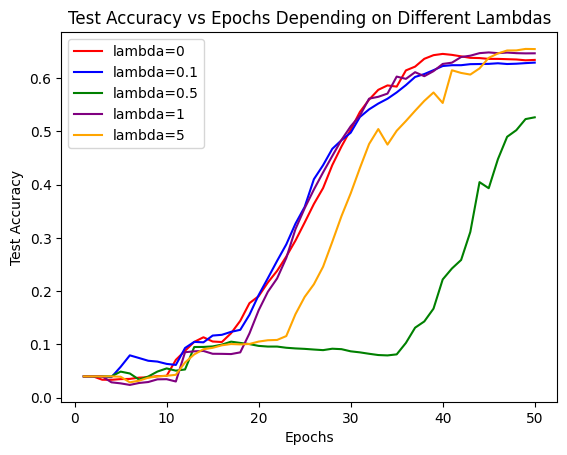

In [ ]:
lambs=[0,0.1,0.5,1,5]

test_acc_lambs=[]

for lamb in lambs:
  mlp2_lamb = MLP(
      LinearLayer(28*28, HIDDEN_SIZE256),
      ReLULayer(),
      LinearLayer(HIDDEN_SIZE256, HIDDEN_SIZE256),
      ReLULayer(),
      LinearLayer(HIDDEN_SIZE256, 25),
      SoftmaxOutputLayer()
  )

  opt2_lamb = GradientDescentOptimizer(mlp2_lamb, lr=0.1)

  mlp, losses_train, losses_valid, acc_train, acc_valid, acc_test = mlp2_lamb.fit(opt2_lamb, X_train_tr, y_train_tr, X_train_va, y_train_va,X_test,y_test, steps=50, batch_size=500,alpha=lamb,l2=True)
  test_acc_lambs.append(acc_test)


epochs_list=list(range(1, 50+1))
plt.plot(epochs_list, test_acc_lambs[0], color='red', label='lambda=0')
plt.plot(epochs_list, test_acc_lambs[1], color='blue', label='lambda=0.1')
plt.plot(epochs_list, test_acc_lambs[2], color='green', label='lambda=0.5')
plt.plot(epochs_list, test_acc_lambs[3], color='purple', label='lambda=1')
plt.plot(epochs_list, test_acc_lambs[4], color='orange', label='lambda=5')
plt.xlabel("Epochs")
plt.ylabel("Test Accuracy")
plt.title("Test Accuracy vs Epochs Depending on Different Lambdas")
plt.legend(loc='best')
#print(" Train Accuracy: {}\n Valid Accuracy: {}\n Test Accuracy: {}".format(train_accuracy[-1],valid_accuracy[-1],test_accuracy[-1]))


MLP with L2 regularization does not improve test accuracy that much since all accuracies with different lambdas are approximately 65%. Furthermore, we see that lambda=5 has the best accuracy.

## 3.4: Keras/TensorFlow CNN

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Dropout
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                  rotation_range = 0,
                                  height_shift_range=0.2,
                                  width_shift_range=0.2,
                                  shear_range=0,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode='nearest')

In [ ]:
X_train = train_df.drop(['label'],axis=1).values.reshape(-1,28,28,1)
y_train=lb.fit_transform(train_df['label'])

X_test=test_df.drop(['label'],axis=1).values.reshape(-1,28,28,1)
y_test=lb.fit_transform(test_df['label'])

### Units Size

In [ ]:
check_models=[1]*4

units_size=[64,128,256,512]

for size in range(4):
  check_models[size]=Sequential()
  #first convolutional layer
  check_models[size].add(Conv2D(32,kernel_size=(5,5),
                  strides=1,padding='same',activation='relu',input_shape=(28,28,1)))
  check_models[size].add(MaxPool2D(pool_size=(3,3),padding='same'))

  #second convolutional layer
  check_models[size].add(Conv2D(32,kernel_size=(2,2),
                  strides=1,activation='relu',padding='same'))
  check_models[size].add(MaxPool2D((2,2),2,padding='same'))

  #third convolutional layer
  check_models[size].add(Conv2D(32,kernel_size=(2,2),
                  strides=1,activation='relu',padding='same'))
  check_models[size].add(MaxPool2D((2,2),padding='same'))

  #flatten
  check_models[size].add(Flatten())

  #first fully connected layer
  check_models[size].add(Dense(units=units_size[size],activation='relu'))

  #second fully connected layer
  check_models[size].add(Dense(units=units_size[size],activation='relu'))

  #output layer
  check_models[size].add(Dense(units=24,activation='softmax'))

  check_models[size].summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d_24 (MaxPooli  (None, 10, 10, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_25 (Conv2D)          (None, 10, 10, 32)        4128      
                                                                 
 max_pooling2d_25 (MaxPooli  (None, 5, 5, 32)          0         
 ng2D)                                                           
                                                                 
 conv2d_26 (Conv2D)          (None, 5, 5, 32)          4128      
                                                                 
 max_pooling2d_26 (MaxPooli  (None, 3, 3, 32)         

Epoch 1/35
138/138 [==============================] - 30s 212ms/step - loss: 0.7192 - accuracy: 0.7580 - val_loss: 152.1756 - val_accuracy: 0.6686
Epoch 2/35
138/138 [==============================] - 28s 203ms/step - loss: 0.6636 - accuracy: 0.7700 - val_loss: 172.6013 - val_accuracy: 0.6266
Epoch 3/35
138/138 [==============================] - 29s 207ms/step - loss: 0.6443 - accuracy: 0.7794 - val_loss: 164.5546 - val_accuracy: 0.6595
Epoch 4/35
138/138 [==============================] - 28s 202ms/step - loss: 0.6309 - accuracy: 0.7825 - val_loss: 124.3782 - val_accuracy: 0.7089
Epoch 5/35
138/138 [==============================] - 29s 211ms/step - loss: 0.6061 - accuracy: 0.7910 - val_loss: 163.8252 - val_accuracy: 0.6661
Epoch 6/35
138/138 [==============================] - 29s 211ms/step - loss: 0.6062 - accuracy: 0.7909 - val_loss: 128.3782 - val_accuracy: 0.7129
Epoch 7/35
138/138 [==============================] - 29s 209ms/step - loss: 0.5861 - accuracy: 0.7999 - val_loss: 148

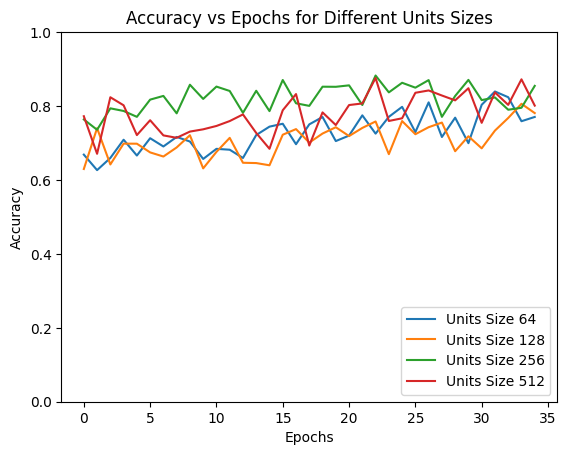

In [ ]:
i=0
for model in check_models:
  model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
  history=model.fit(train_datagen.flow(X_train,y_train,batch_size=200),
         epochs = 35,
          validation_data=(X_test,y_test),
          shuffle=1
         )

  plt.plot(history.history["val_accuracy"],label="Units Size "+str(units_size[i]))
  plt.title("Accuracy vs Epochs for Different Units Sizes")
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy")
  plt.ylim(0,1)
  plt.legend(loc="lower right")
  i+=1

By the above accuracy plot, the best units size is 256.

### Kernel Size

Since the best units size is known to be 256, let's set the units size to be 256 and test different kernel sizes to find the best one.

In [ ]:
check_models=[1]*4

for size in range(4):
  check_models[size]=Sequential()
  #first convolutional layer
  check_models[size].add(Conv2D(32,kernel_size=(size+2,size+2),
                  strides=1,padding='same',activation='relu',input_shape=(28,28,1)))
  check_models[size].add(MaxPool2D(pool_size=(3,3),padding='same'))

  #second convolutional layer
  check_models[size].add(Conv2D(32,kernel_size=(size+2,size+2),
                  strides=1,activation='relu',padding='same'))
  check_models[size].add(MaxPool2D((2,2),2,padding='same'))

  #third convolutional layer
  check_models[size].add(Conv2D(32,kernel_size=(size+2,size+2),
                  strides=1,activation='relu',padding='same'))
  check_models[size].add(MaxPool2D((2,2),padding='same'))

  #flatten
  check_models[size].add(Flatten())

  #first fully connected layer
  check_models[size].add(Dense(units=256,activation='relu'))

  #second fully connected layer
  check_models[size].add(Dense(units=256,activation='relu'))

  #output layer
  check_models[size].add(Dense(units=24,activation='softmax'))

  check_models[size].summary()


Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_60 (Conv2D)          (None, 28, 28, 32)        160       
                                                                 
 max_pooling2d_60 (MaxPooli  (None, 10, 10, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_61 (Conv2D)          (None, 10, 10, 32)        4128      
                                                                 
 max_pooling2d_61 (MaxPooli  (None, 5, 5, 32)          0         
 ng2D)                                                           
                                                                 
 conv2d_62 (Conv2D)          (None, 5, 5, 32)          4128      
                                                                 
 max_pooling2d_62 (MaxPooli  (None, 3, 3, 32)        

Epoch 1/30
138/138 [==============================] - 27s 183ms/step - loss: 3.0501 - accuracy: 0.0881 - val_loss: 422.1622 - val_accuracy: 0.0545
Epoch 2/30
138/138 [==============================] - 23s 170ms/step - loss: 2.5841 - accuracy: 0.1937 - val_loss: 480.7114 - val_accuracy: 0.0559
Epoch 3/30
138/138 [==============================] - 23s 165ms/step - loss: 2.2697 - accuracy: 0.2699 - val_loss: 317.9949 - val_accuracy: 0.1431
Epoch 4/30
138/138 [==============================] - 24s 177ms/step - loss: 2.0379 - accuracy: 0.3347 - val_loss: 328.2037 - val_accuracy: 0.1662
Epoch 5/30
138/138 [==============================] - 23s 166ms/step - loss: 1.8231 - accuracy: 0.3973 - val_loss: 436.1010 - val_accuracy: 0.1571
Epoch 6/30
138/138 [==============================] - 23s 165ms/step - loss: 1.6515 - accuracy: 0.4436 - val_loss: 420.8071 - val_accuracy: 0.2037
Epoch 7/30
138/138 [==============================] - 24s 176ms/step - loss: 1.4998 - accuracy: 0.4902 - val_loss: 269

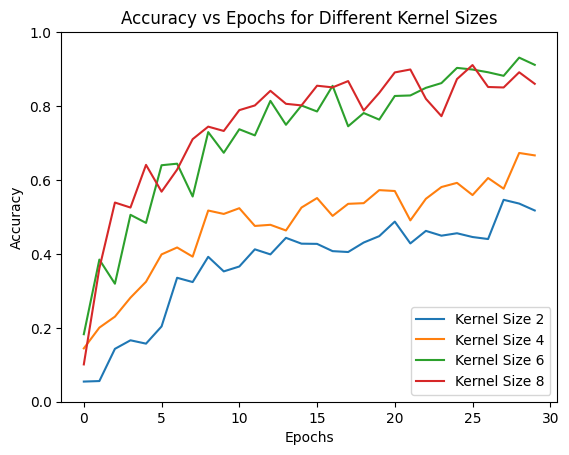

In [ ]:
kernel_size=0
for model in check_models:
  model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
  history=model.fit(train_datagen.flow(X_train,y_train,batch_size=200),
         epochs = 30,
          validation_data=(X_test,y_test),
          shuffle=1
         )
  kernel_size+=2
  plt.plot(history.history["val_accuracy"],label="Kernel Size "+str(kernel_size))
  plt.title("Accuracy vs Epochs for Different Kernel Sizes")
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy")
  plt.ylim(0,1)
  plt.legend(loc="lower right")


From the accuracy plot above, we see that the best kernel size is 6.

### Stride Size

We already know that the best units size is 256 and the best kernel size is 6. Let's now investigate further about the stride size.

In [ ]:
check_models=[1]*4

for size in range(4):
  check_models[size]=Sequential()
  #first convolutional layer
  check_models[size].add(Conv2D(32,kernel_size=(6,6),
                  strides=size+1,padding='same',activation='relu',input_shape=(28,28,1)))
  check_models[size].add(MaxPool2D(pool_size=(2,2),padding='same'))

  #second convolutional layer
  check_models[size].add(Conv2D(32,kernel_size=(6,6),
                  strides=size+1,activation='relu',padding='same'))
  check_models[size].add(MaxPool2D((2,2),2,padding='same'))

  #third convolutional layer
  check_models[size].add(Conv2D(32,kernel_size=(6,6),
                  strides=size+1,activation='relu',padding='same'))
  check_models[size].add(MaxPool2D((2,2),padding='same'))

  #flatten
  check_models[size].add(Flatten())

  #first fully connected layer
  check_models[size].add(Dense(units=256,activation='relu'))

  #second fully connected layer
  check_models[size].add(Dense(units=256,activation='relu'))

  #output layer
  check_models[size].add(Dense(units=24,activation='softmax'))

  check_models[size].summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_72 (Conv2D)          (None, 28, 28, 32)        1184      
                                                                 
 max_pooling2d_72 (MaxPooli  (None, 14, 14, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_73 (Conv2D)          (None, 14, 14, 32)        36896     
                                                                 
 max_pooling2d_73 (MaxPooli  (None, 7, 7, 32)          0         
 ng2D)                                                           
                                                                 
 conv2d_74 (Conv2D)          (None, 7, 7, 32)          36896     
                                                                 
 max_pooling2d_74 (MaxPooli  (None, 4, 4, 32)        

Epoch 1/30
138/138 [==============================] - 133s 618ms/step - loss: 0.9516 - accuracy: 0.6778 - val_loss: 71.2363 - val_accuracy: 0.7599
Epoch 2/30
138/138 [==============================] - 80s 577ms/step - loss: 0.7116 - accuracy: 0.7539 - val_loss: 86.1859 - val_accuracy: 0.7673
Epoch 3/30
138/138 [==============================] - 83s 602ms/step - loss: 0.5901 - accuracy: 0.7966 - val_loss: 69.7329 - val_accuracy: 0.8123
Epoch 4/30
138/138 [==============================] - 82s 593ms/step - loss: 0.4766 - accuracy: 0.8373 - val_loss: 54.4088 - val_accuracy: 0.8549
Epoch 5/30
138/138 [==============================] - 82s 592ms/step - loss: 0.3828 - accuracy: 0.8726 - val_loss: 52.6320 - val_accuracy: 0.8735
Epoch 6/30
138/138 [==============================] - 82s 593ms/step - loss: 0.3284 - accuracy: 0.8889 - val_loss: 68.1540 - val_accuracy: 0.8643
Epoch 7/30
138/138 [==============================] - 86s 620ms/step - loss: 0.2702 - accuracy: 0.9099 - val_loss: 25.1547 

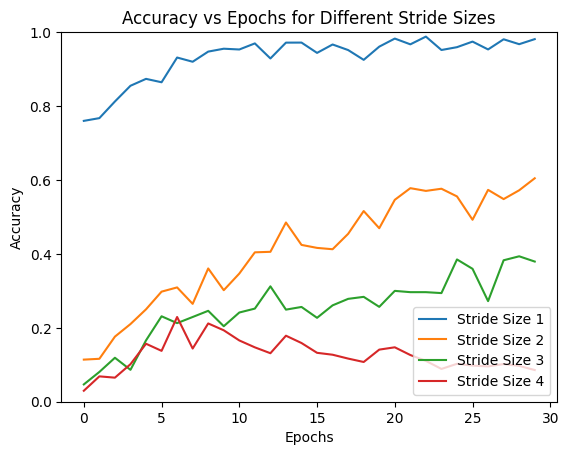

In [ ]:
stride_size=0
for model in check_models:
  model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
  history=model.fit(train_datagen.flow(X_train,y_train,batch_size=200),
         epochs = 30,
          validation_data=(X_test,y_test),
          shuffle=1
         )
  stride_size+=1
  plt.plot(history.history["val_accuracy"],label="Stride Size "+str(stride_size))
  plt.title("Accuracy vs Epochs for Different Stride Sizes")
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy")
  plt.ylim(0,1)
  plt.legend(loc="lower right")

From the accuracy plot above, we see that the best stride size is 1.

### Dropout Rate

In [ ]:
check_models=[1]*4
dropout_rates=[0,0.0625,0.125,0.25]

for size in range(4):
  check_models[size]=Sequential()
  #first convolutional layer
  check_models[size].add(Conv2D(32,kernel_size=(6,6),
                  strides=1,padding='same',activation='relu',input_shape=(28,28,1)))
  check_models[size].add(MaxPool2D(pool_size=(3,3),padding='same'))

  #second convolutional layer
  check_models[size].add(Conv2D(32,kernel_size=(6,6),
                  strides=1,activation='relu',padding='same'))
  check_models[size].add(MaxPool2D((2,2),2,padding='same'))

  #third convolutional laye2
  check_models[size].add(Conv2D(32,kernel_size=(6,6),
                  strides=1,activation='relu',padding='same'))
  check_models[size].add(MaxPool2D((2,2),padding='same'))

  #flatten
  check_models[size].add(Flatten())

  #first fully connected layer
  check_models[size].add(Dense(units=256,activation='relu'))
  check_models[size].add(Dropout(rate=dropout_rates[size]))
  #second fully connected layer
  check_models[size].add(Dense(units=256,activation='relu'))
  check_models[size].add(Dropout(rate=dropout_rates[size]))
  #output layer
  check_models[size].add(Dense(units=24,activation='softmax'))

  check_models[size].summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 28, 28, 32)        1184      
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 10, 10, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 10, 10, 32)        36896     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 5, 5, 32)          0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 5, 5, 32)          36896     
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 3, 3, 32)         

Epoch 1/30
138/138 [==============================] - 12s 73ms/step - loss: 2.9770 - accuracy: 0.1049 - val_loss: 146.0764 - val_accuracy: 0.2213
Epoch 2/30
138/138 [==============================] - 10s 73ms/step - loss: 2.2527 - accuracy: 0.2669 - val_loss: 199.8653 - val_accuracy: 0.3151
Epoch 3/30
138/138 [==============================] - 10s 70ms/step - loss: 1.6620 - accuracy: 0.4325 - val_loss: 355.7553 - val_accuracy: 0.3067
Epoch 4/30
138/138 [==============================] - 9s 63ms/step - loss: 1.2596 - accuracy: 0.5637 - val_loss: 420.2844 - val_accuracy: 0.3277
Epoch 5/30
138/138 [==============================] - 11s 78ms/step - loss: 1.0162 - accuracy: 0.6471 - val_loss: 329.0583 - val_accuracy: 0.4631
Epoch 6/30
138/138 [==============================] - 10s 71ms/step - loss: 0.8644 - accuracy: 0.6963 - val_loss: 298.6644 - val_accuracy: 0.4467
Epoch 7/30
138/138 [==============================] - 10s 73ms/step - loss: 0.7194 - accuracy: 0.7429 - val_loss: 270.1737 - 

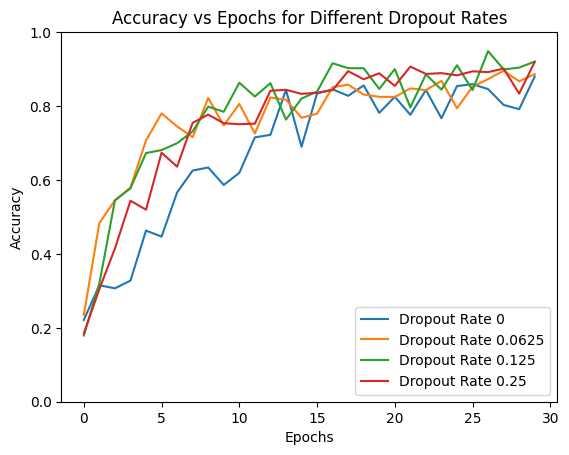

In [ ]:
dropout_rate=0
for model in check_models:
  model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
  history=model.fit(train_datagen.flow(X_train,y_train,batch_size=200),
         epochs = 30,
          validation_data=(X_test,y_test),
          shuffle=1
         )

  plt.plot(history.history["val_accuracy"],label="Dropout Rate "+str(dropout_rates[dropout_rate]))
  plt.title("Accuracy vs Epochs for Different Dropout Rates")
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy")
  plt.ylim(0,1)
  plt.legend(loc="lower right")
  dropout_rate+=1

The best dropout rate is 0.25 and 0.125.

### ConvNet with Best Hyperparameters

In [ ]:
model=Sequential()
#first convolutional layer
model.add(Conv2D(32,kernel_size=(6,6),
                 strides=1,padding='same',activation='relu',input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(3,3),strides=2,padding='same'))
#second convolutional layer
model.add(Conv2D(32,kernel_size=(6,6),
                strides=1,activation='relu',padding='same'))
model.add(MaxPool2D((2,2),2,padding='same'))
#third convolutional layer
model.add(Conv2D(32,kernel_size=(6,6),
                strides=1,activation='relu',padding='same'))
model.add(MaxPool2D((2,2),2,padding='same'))

model.add(Flatten())

#first fully connected layer
model.add(Dense(units=256,activation='relu'))
model.add(Dropout(rate=0.25))
#second fully connected layer
model.add(Dense(units=256,activation='relu'))
model.add(Dropout(rate=0.25))
#output layer
model.add(Dense(units=24,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        1184      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 32)        36896     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 7, 7, 32)          36896     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 4, 4, 32)         

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

history=model.fit(train_datagen.flow(X_train,y_train,batch_size=200),
         epochs = 15,
          validation_data=(X_test,y_test),
          shuffle=1
         )

Epoch 1/15
138/138 [==============================] - 98s 669ms/step - loss: 3.0536 - accuracy: 0.0812 - val_loss: 167.2440 - val_accuracy: 0.1739
Epoch 2/15
138/138 [==============================] - 92s 668ms/step - loss: 2.3850 - accuracy: 0.2403 - val_loss: 163.0757 - val_accuracy: 0.3574
Epoch 3/15
138/138 [==============================] - 88s 640ms/step - loss: 1.5479 - accuracy: 0.4630 - val_loss: 98.3037 - val_accuracy: 0.5750
Epoch 4/15
138/138 [==============================] - 89s 642ms/step - loss: 1.0627 - accuracy: 0.6243 - val_loss: 79.1700 - val_accuracy: 0.6973
Epoch 5/15
138/138 [==============================] - 89s 644ms/step - loss: 0.7656 - accuracy: 0.7300 - val_loss: 140.6212 - val_accuracy: 0.6514
Epoch 6/15
138/138 [==============================] - 89s 644ms/step - loss: 0.6028 - accuracy: 0.7898 - val_loss: 38.0195 - val_accuracy: 0.8795
Epoch 7/15
138/138 [==============================] - 89s 645ms/step - loss: 0.4986 - accuracy: 0.8271 - val_loss: 38.250

In [ ]:
(ls,acc)=model.evaluate(x=X_test,y=y_test)

225/225 [==============================] - 7s 32ms/step - loss: 54.5912 - accuracy: 0.8858


Test Accuracy: 88.58059048652649%
Train Accuracy: 94.30704712867737%


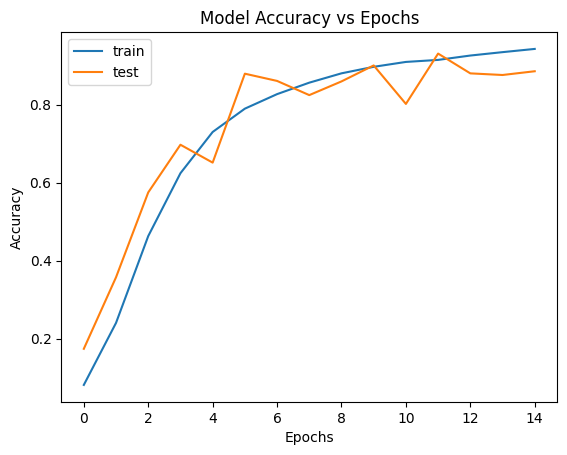

In [ ]:
print('Test Accuracy: {}%'.format(acc*100))
print('Train Accuracy: {}%'.format(history.history['accuracy'][-1]*100))
# History for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])

From the plot, we see that the test accuracy of CNN is 88.58%, which is better than our implemented MLP.

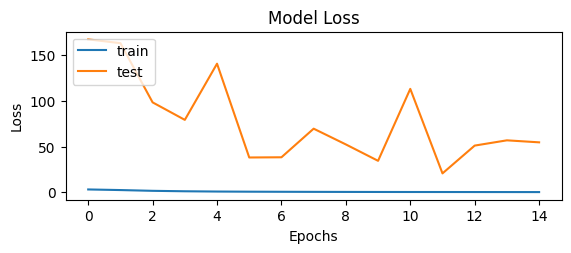

In [ ]:
# History for loss
plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()